### For the data collection I will webscrape a few pages, so I will start by importing the packages I need

In [3]:
#Import Packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 
import numpy as np

In [4]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [5]:
#First test to figure out how to get the required content

response = requests.get('https://www.procyclingstats.com/race/tour-de-france/2019/stage-2')
soup = response.content.decode('utf-8')
soup2 = BeautifulSoup(soup, 'html.parser')

In [6]:
soup

'<!DOCTYPE HTML><html><head><!-- Global site tag (gtag.js) - Google Analytics -->\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-35889790-1"></script>\n<script>\n  window.dataLayer = window.dataLayer || [];\n  function gtag(){dataLayer.push(arguments);}\n  gtag(\'js\', new Date());\n\n  gtag(\'config\', \'UA-35889790-1\');\n</script>\n<title>Tour de France 2019 | Stage 2 (TTT) | Results</title>\n<base href="https://www.procyclingstats.com/race.php" />\n<meta charset="utf-8"> \n<meta name="language" content="" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="description" content="Results of Tour de France 2019. Won by Mike Teunissen before Wout van Aert (2nd) and Steven Kruijswijk (3rd). ">\n<meta name="keywords" content=" "> \n<link rel="canonical" href="https://www.procyclingstats.com/race/tour-de-france/2019/stage-2" />\n<link rel="alternate" hreflang="en-gb" href="https://www.procyclingstats.com/race/tour-de-france/2019/st

In [7]:
#I know there is a table in the page

test = pd.read_html(soup)[0]
test

Rnk  Prev    ▼▲  BIB                                            Rider  \
0      1     1     -   87                   Teunissen MikeTeam Jumbo-Visma   
1      2    16   ▲14   88                    van Aert WoutTeam Jumbo-Visma   
2      3    56   ▲53   81                Kruijswijk StevenTeam Jumbo-Visma   
3      4    78   ▲74   86                      Martin TonyTeam Jumbo-Visma   
4      5   167  ▲162   82                   Bennett GeorgeTeam Jumbo-Visma   
5      6    80   ▲74    5                          Moscon GianniTeam INEOS   
6      7    81   ▲74    2                            Bernal EganTeam INEOS   
7      8   111  ▲103    1                         Thomas GeraintTeam INEOS   
8      9   154  ▲145    8                       van Baarle DylanTeam INEOS   
9     10     9    ▼1   28              Viviani EliaDeceuninck - Quick Step   
10    11    21   ▲10   21        Alaphilippe JulianDeceuninck - Quick Step   
11    12    33   ▲21   22            Asgreen KasperDeceuninck - Quick Step   
12    13    51   ▲38   25                 Mas EnricDeceuninck - Quick Step   
13    14    50   ▲36   24             Lampaert YvesDeceuninck - Quick Step   
14    15     6    ▼9  141                      Matthews MichaelTeam Sunweb   
15    16    41   ▲25  188                   Zabel RickTeam Katusha Alpecin   
16    17    59   ▲42  186                  Politt NilsTeam Katusha Alpecin   
17    18    73   ▲55  146                       Kelderman WilcoTeam Sunweb   
18    19    86   ▲67  145                         Kämna LennardTeam Sunweb   
19    20    98   ▲78  187           Würtz Schmidt MadsTeam Katusha Alpecin   
20    21   103   ▲82  181                Zakarin IlnurTeam Katusha Alpecin   
21    22   107   ▲85  147                  Kragh Andersen SørenTeam Sunweb   
22    23   110   ▲87  183                 Dowsett AlexTeam Katusha Alpecin   
23    24    12   ▼12   92                Bettiol AlbertoEF Education First   
24    25    75   ▲50   97             van Garderen TejayEF Education First   
25    26    82   ▲56   91                 Urán RigobertoEF Education First   
26    27    87   ▲60   98                  Woods MichaelEF Education First   
27    28   109   ▲81   94                  Kangert TanelEF Education First   
28    29   102   ▲73  184               Gonçalves JoséTeam Katusha Alpecin   
29    30    11   ▼19  111                        Van Avermaet GregCCC Team   
30    31    25    ▼6  112                            Bevin PatrickCCC Team   
31    32    27    ▼5   95            Langeveld SebastianEF Education First   
32    33   114   ▲81  116                            Rosskopf JoeyCCC Team   
33    34   115   ▲81  114                            Geschke SimonCCC Team   
34    35    65   ▲30   53                        Gaudu DavidGroupama - FDJ   
35    36    66   ▲30   56                        Molard RudyGroupama - FDJ   
36    37    76   ▲39   51                      Pinot ThibautGroupama - FDJ   
37    38   125   ▲87   54                        Küng StefanGroupama - FDJ   
38    39   137   ▲98   57              Reichenbach SébastienGroupama - FDJ   
39    40    40     -  148                         Roche NicolasTeam Sunweb   
40    41     5   ▼36   43                    Colbrelli SonnyBahrain Merida   
41    42    24   ▼18   41                    Nibali VincenzoBahrain Merida   
42    43    39    ▼4   48                        Tratnik JanBahrain Merida   
43    44   113   ▲69   42                     Caruso DamianoBahrain Merida   
44    45   151  ▲106  113                     De Marchi AlessandroCCC Team   
45    46   158  ▲112   44                       Dennis RohanBahrain Merida   
46    47   159  ▲112   46                      Mohorič MatejBahrain Merida   
47    48     2   ▼46   11                      Sagan PeterBORA - hansgrohe   
48    49     7   ▼42  107                   Trentin MatteoMitchelton-Scott   
49    50    19   ▼31  105                      Impey DarylMitchelton-Scott   
50    51    46    ▼5  101  

In [10]:
# try a loop to make sure I will hit the adresses I want, and that I undestand the page standard
for year in range(1971,1972):
  
        for i in range(1,25):
           
            try:

                response = requests.get(f"https://www.procyclingstats.com/race/tour-de-france/{year}/stage-{i}")
                status = response.status_code
                print(status)


                pagecontent = response.content.decode('utf-8')


                file=pd.read_html(pagecontent)[0]
                file['Stage']=i
                file['Year']=year

                print(f"Stage: {i}")
                #print(file)
            except: 
                 continue   


200
200
Stage: 2
200
Stage: 3
200
Stage: 4
200
Stage: 5
200
200
Stage: 7
200
Stage: 8
200
Stage: 9
200
Stage: 10
200
Stage: 11
200
Stage: 12
200
Stage: 13
200
Stage: 14
200
Stage: 15
200
200
Stage: 17
200
Stage: 18
200
Stage: 19
200
Stage: 20
200
200
200
200


In [11]:
test


Rnk  Prev    ▼▲  BIB                                            Rider  \
0      1     1     -   87                   Teunissen MikeTeam Jumbo-Visma   
1      2    16   ▲14   88                    van Aert WoutTeam Jumbo-Visma   
2      3    56   ▲53   81                Kruijswijk StevenTeam Jumbo-Visma   
3      4    78   ▲74   86                      Martin TonyTeam Jumbo-Visma   
4      5   167  ▲162   82                   Bennett GeorgeTeam Jumbo-Visma   
5      6    80   ▲74    5                          Moscon GianniTeam INEOS   
6      7    81   ▲74    2                            Bernal EganTeam INEOS   
7      8   111  ▲103    1                         Thomas GeraintTeam INEOS   
8      9   154  ▲145    8                       van Baarle DylanTeam INEOS   
9     10     9    ▼1   28              Viviani EliaDeceuninck - Quick Step   
10    11    21   ▲10   21        Alaphilippe JulianDeceuninck - Quick Step   
11    12    33   ▲21   22            Asgreen KasperDeceuninck - Quick Step   
12    13    51   ▲38   25                 Mas EnricDeceuninck - Quick Step   
13    14    50   ▲36   24             Lampaert YvesDeceuninck - Quick Step   
14    15     6    ▼9  141                      Matthews MichaelTeam Sunweb   
15    16    41   ▲25  188                   Zabel RickTeam Katusha Alpecin   
16    17    59   ▲42  186                  Politt NilsTeam Katusha Alpecin   
17    18    73   ▲55  146                       Kelderman WilcoTeam Sunweb   
18    19    86   ▲67  145                         Kämna LennardTeam Sunweb   
19    20    98   ▲78  187           Würtz Schmidt MadsTeam Katusha Alpecin   
20    21   103   ▲82  181                Zakarin IlnurTeam Katusha Alpecin   
21    22   107   ▲85  147                  Kragh Andersen SørenTeam Sunweb   
22    23   110   ▲87  183                 Dowsett AlexTeam Katusha Alpecin   
23    24    12   ▼12   92                Bettiol AlbertoEF Education First   
24    25    75   ▲50   97             van Garderen TejayEF Education First   
25    26    82   ▲56   91                 Urán RigobertoEF Education First   
26    27    87   ▲60   98                  Woods MichaelEF Education First   
27    28   109   ▲81   94                  Kangert TanelEF Education First   
28    29   102   ▲73  184               Gonçalves JoséTeam Katusha Alpecin   
29    30    11   ▼19  111                        Van Avermaet GregCCC Team   
30    31    25    ▼6  112                            Bevin PatrickCCC Team   
31    32    27    ▼5   95            Langeveld SebastianEF Education First   
32    33   114   ▲81  116                            Rosskopf JoeyCCC Team   
33    34   115   ▲81  114                            Geschke SimonCCC Team   
34    35    65   ▲30   53                        Gaudu DavidGroupama - FDJ   
35    36    66   ▲30   56                        Molard RudyGroupama - FDJ   
36    37    76   ▲39   51                      Pinot ThibautGroupama - FDJ   
37    38   125   ▲87   54                        Küng StefanGroupama - FDJ   
38    39   137   ▲98   57              Reichenbach SébastienGroupama - FDJ   
39    40    40     -  148                         Roche NicolasTeam Sunweb   
40    41     5   ▼36   43                    Colbrelli SonnyBahrain Merida   
41    42    24   ▼18   41                    Nibali VincenzoBahrain Merida   
42    43    39    ▼4   48                        Tratnik JanBahrain Merida   
43    44   113   ▲69   42                     Caruso DamianoBahrain Merida   
44    45   151  ▲106  113                     De Marchi AlessandroCCC Team   
45    46   158  ▲112   44                       Dennis RohanBahrain Merida   
46    47   159  ▲112   46                      Mohorič MatejBahrain Merida   
47    48     2   ▼46   11                      Sagan PeterBORA - hansgrohe   
48    49     7   ▼42  107                   Trentin MatteoMitchelton-Scott   
49    50    19   ▼31  105                      Impey DarylMitchelton-Scott   
50    51    46    ▼5  101  

### There is a lot of cleanning required from scrapping, so I'll try a few things on my first test to clean data as I scrape, to later combine this to the scrapping loop. 

In [13]:
# iteration to fix names by removing team name from that column

my_list2=(test['Rider'].str.len()-test['Team'].str.len()).tolist()
rlist=test['Rider'].tolist()
names=[]
for e, n in zip(rlist, my_list2):
    name=e[:n]
    
    names.append(name)
#Last columns displays test result for name iteration
test['test6']=names
test

Rnk  Prev    ▼▲  BIB                                            Rider  \
0      1     1     -   87                   Teunissen MikeTeam Jumbo-Visma   
1      2    16   ▲14   88                    van Aert WoutTeam Jumbo-Visma   
2      3    56   ▲53   81                Kruijswijk StevenTeam Jumbo-Visma   
3      4    78   ▲74   86                      Martin TonyTeam Jumbo-Visma   
4      5   167  ▲162   82                   Bennett GeorgeTeam Jumbo-Visma   
5      6    80   ▲74    5                          Moscon GianniTeam INEOS   
6      7    81   ▲74    2                            Bernal EganTeam INEOS   
7      8   111  ▲103    1                         Thomas GeraintTeam INEOS   
8      9   154  ▲145    8                       van Baarle DylanTeam INEOS   
9     10     9    ▼1   28              Viviani EliaDeceuninck - Quick Step   
10    11    21   ▲10   21        Alaphilippe JulianDeceuninck - Quick Step   
11    12    33   ▲21   22            Asgreen KasperDeceuninck - Quick Step   
12    13    51   ▲38   25                 Mas EnricDeceuninck - Quick Step   
13    14    50   ▲36   24             Lampaert YvesDeceuninck - Quick Step   
14    15     6    ▼9  141                      Matthews MichaelTeam Sunweb   
15    16    41   ▲25  188                   Zabel RickTeam Katusha Alpecin   
16    17    59   ▲42  186                  Politt NilsTeam Katusha Alpecin   
17    18    73   ▲55  146                       Kelderman WilcoTeam Sunweb   
18    19    86   ▲67  145                         Kämna LennardTeam Sunweb   
19    20    98   ▲78  187           Würtz Schmidt MadsTeam Katusha Alpecin   
20    21   103   ▲82  181                Zakarin IlnurTeam Katusha Alpecin   
21    22   107   ▲85  147                  Kragh Andersen SørenTeam Sunweb   
22    23   110   ▲87  183                 Dowsett AlexTeam Katusha Alpecin   
23    24    12   ▼12   92                Bettiol AlbertoEF Education First   
24    25    75   ▲50   97             van Garderen TejayEF Education First   
25    26    82   ▲56   91                 Urán RigobertoEF Education First   
26    27    87   ▲60   98                  Woods MichaelEF Education First   
27    28   109   ▲81   94                  Kangert TanelEF Education First   
28    29   102   ▲73  184               Gonçalves JoséTeam Katusha Alpecin   
29    30    11   ▼19  111                        Van Avermaet GregCCC Team   
30    31    25    ▼6  112                            Bevin PatrickCCC Team   
31    32    27    ▼5   95            Langeveld SebastianEF Education First   
32    33   114   ▲81  116                            Rosskopf JoeyCCC Team   
33    34   115   ▲81  114                            Geschke SimonCCC Team   
34    35    65   ▲30   53                        Gaudu DavidGroupama - FDJ   
35    36    66   ▲30   56                        Molard RudyGroupama - FDJ   
36    37    76   ▲39   51                      Pinot ThibautGroupama - FDJ   
37    38   125   ▲87   54                        Küng StefanGroupama - FDJ   
38    39   137   ▲98   57              Reichenbach SébastienGroupama - FDJ   
39    40    40     -  148                         Roche NicolasTeam Sunweb   
40    41     5   ▼36   43                    Colbrelli SonnyBahrain Merida   
41    42    24   ▼18   41                    Nibali VincenzoBahrain Merida   
42    43    39    ▼4   48                        Tratnik JanBahrain Merida   
43    44   113   ▲69   42                     Caruso DamianoBahrain Merida   
44    45   151  ▲106  113                     De Marchi AlessandroCCC Team   
45    46   158  ▲112   44                       Dennis RohanBahrain Merida   
46    47   159  ▲112   46                      Mohorič MatejBahrain Merida   
47    48     2   ▼46   11                      Sagan PeterBORA - hansgrohe   
48    49     7   ▼42  107                   Trentin MatteoMitchelton-Scott   
49    50    19   ▼31  105                      Impey DarylMitchelton-Scott   
50    51    46    ▼5  101  

In [14]:
#loop to fix the times
# 
lt=list(range(200))
time=test['Time'].tolist()
times=[]
for i,t in zip(lt,time):
    
    p=int(len(time[i])/2)
    timex=t[:p]
    times.append(timex)
#Last Column Displays Time iteration result
test['test6']=times
test['test6'] =test['test6'].str.replace(',','')
test  

Rnk  Prev    ▼▲  BIB                                            Rider  \
0      1     1     -   87                   Teunissen MikeTeam Jumbo-Visma   
1      2    16   ▲14   88                    van Aert WoutTeam Jumbo-Visma   
2      3    56   ▲53   81                Kruijswijk StevenTeam Jumbo-Visma   
3      4    78   ▲74   86                      Martin TonyTeam Jumbo-Visma   
4      5   167  ▲162   82                   Bennett GeorgeTeam Jumbo-Visma   
5      6    80   ▲74    5                          Moscon GianniTeam INEOS   
6      7    81   ▲74    2                            Bernal EganTeam INEOS   
7      8   111  ▲103    1                         Thomas GeraintTeam INEOS   
8      9   154  ▲145    8                       van Baarle DylanTeam INEOS   
9     10     9    ▼1   28              Viviani EliaDeceuninck - Quick Step   
10    11    21   ▲10   21        Alaphilippe JulianDeceuninck - Quick Step   
11    12    33   ▲21   22            Asgreen KasperDeceuninck - Quick Step   
12    13    51   ▲38   25                 Mas EnricDeceuninck - Quick Step   
13    14    50   ▲36   24             Lampaert YvesDeceuninck - Quick Step   
14    15     6    ▼9  141                      Matthews MichaelTeam Sunweb   
15    16    41   ▲25  188                   Zabel RickTeam Katusha Alpecin   
16    17    59   ▲42  186                  Politt NilsTeam Katusha Alpecin   
17    18    73   ▲55  146                       Kelderman WilcoTeam Sunweb   
18    19    86   ▲67  145                         Kämna LennardTeam Sunweb   
19    20    98   ▲78  187           Würtz Schmidt MadsTeam Katusha Alpecin   
20    21   103   ▲82  181                Zakarin IlnurTeam Katusha Alpecin   
21    22   107   ▲85  147                  Kragh Andersen SørenTeam Sunweb   
22    23   110   ▲87  183                 Dowsett AlexTeam Katusha Alpecin   
23    24    12   ▼12   92                Bettiol AlbertoEF Education First   
24    25    75   ▲50   97             van Garderen TejayEF Education First   
25    26    82   ▲56   91                 Urán RigobertoEF Education First   
26    27    87   ▲60   98                  Woods MichaelEF Education First   
27    28   109   ▲81   94                  Kangert TanelEF Education First   
28    29   102   ▲73  184               Gonçalves JoséTeam Katusha Alpecin   
29    30    11   ▼19  111                        Van Avermaet GregCCC Team   
30    31    25    ▼6  112                            Bevin PatrickCCC Team   
31    32    27    ▼5   95            Langeveld SebastianEF Education First   
32    33   114   ▲81  116                            Rosskopf JoeyCCC Team   
33    34   115   ▲81  114                            Geschke SimonCCC Team   
34    35    65   ▲30   53                        Gaudu DavidGroupama - FDJ   
35    36    66   ▲30   56                        Molard RudyGroupama - FDJ   
36    37    76   ▲39   51                      Pinot ThibautGroupama - FDJ   
37    38   125   ▲87   54                        Küng StefanGroupama - FDJ   
38    39   137   ▲98   57              Reichenbach SébastienGroupama - FDJ   
39    40    40     -  148                         Roche NicolasTeam Sunweb   
40    41     5   ▼36   43                    Colbrelli SonnyBahrain Merida   
41    42    24   ▼18   41                    Nibali VincenzoBahrain Merida   
42    43    39    ▼4   48                        Tratnik JanBahrain Merida   
43    44   113   ▲69   42                     Caruso DamianoBahrain Merida   
44    45   151  ▲106  113                     De Marchi AlessandroCCC Team   
45    46   158  ▲112   44                       Dennis RohanBahrain Merida   
46    47   159  ▲112   46                      Mohorič MatejBahrain Merida   
47    48     2   ▼46   11                      Sagan PeterBORA - hansgrohe   
48    49     7   ▼42  107                   Trentin MatteoMitchelton-Scott   
49    50    19   ▼31  105                      Impey DarylMitchelton-Scott   
50    51    46    ▼5  101  

In [15]:
# Get the winners avg. speed
temp = soup2.find(class_="res-right")
a_list = str(temp).split('>')


# get the date 
for i, val in enumerate(a_list):
    if 'Avg. speed winner:' in val:
        print(a_list[i+1].split('<')[0].strip())
        break
        

57.2 km/h


In [16]:
# get the distance

print(soup2.find(class_="red distance").text.replace('k','').replace(')','').replace('(',''))

27.6


In [17]:
#Race info
race = soup2.find( "div", class_="entry race")
race.text

'2019»106th Tour de France (2.UWT)2019 \xa0Stage 2 (TTT) \xa0»\xa0 Brussels \xa0›\xa0 Brussels \xa0 (27.6k)'

### Find Stage type

In [18]:
print(soup2.find(class_="blue").text.replace('k','').replace(')','').replace('(','')[-3:])

TTT


In [19]:
stageT=soup2.find(class_="blue").text.replace('k','').replace(')','').replace('(','')[-3:]
stageT

'TTT'

Set the profile Score

#### This is set by the website it self, I did not have to calculate it.

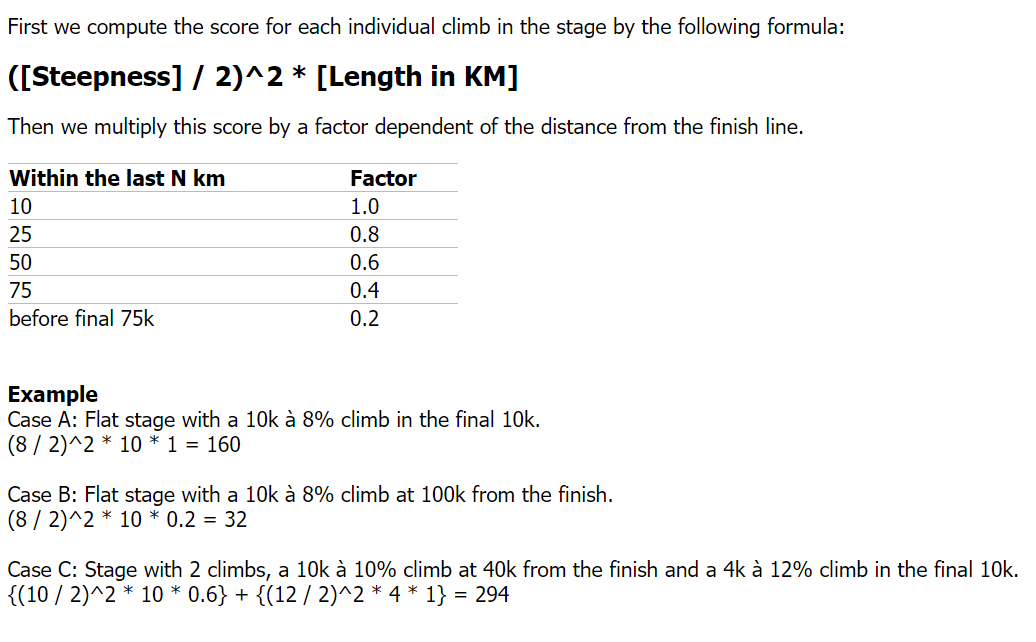

In [20]:
#get the stage profile score
soup2.find(class_='res-right').find('a').text.replace('*','')

'2'

In [152]:
# Now make it save as CSV file
import csv
for year in range(1971,1972):
    try:
        for i in range(1,25):

            response = requests.get(f"https://www.procyclingstats.com/race/tour-de-france/{year}/stage-{i}")
            status = response.status_code
            print(status)
            
            soup = response.content.decode('utf-8')
            soup2= BeautifulSoup(soup, 'html.parser')
                     
            distance = soup2.find(class_="red distance").text.replace('k','').replace(')','').replace('(','')
            
            file=pd.read_html(soup)[0]
            file['Stage']=i
            file['Year']=year
            file['Distance']=distance

            print(f"Stage:{year} - {i}")
            #print(file)
            #file.to_csv(f'C:/Users/renan/Documents/BrainStation/Data Science Boot Camp/Projects/Tour_de_france/data/TDF_{year}{i}.csv', index = False, header=True) #Don't forget to add '.csv' at the end of the path
    except: 
        continue   


200


### Still need to fix the times where time equals 0 replace with the same time as row above

### rider names need to be shuffled and add a '-' inplace of ' space. ex: Doe John should be John-Doe

In [21]:
names = file['Rider']


names = names.map(lambda s: s.split()[1] + '-' + s.split()[0])
file['Rider']=names

In [22]:
file

Rnk  GC   GC-Time  BIB                            Rider  Age  \
0     1   1     +0:00    1               EddyMolteni-Merckx   26   
1     2   5    +21:00   81          JoaquimHoover-Agostinho   28   
2     3  16    +52:50   10             RiniMolteni-Wagtmans   24   
3     4  58  +1:47:40   72          FerdinandPeugeot-Bracke   32   
4     5  35  +1:27:52    7              RogerMolteni-Swerts   28   
5     6  14    +48:20    9                     Springel-Van   27   
6     7  21  +1:08:28    8                        Schil-Van   31   
7     8   2     +9:51   20               JoopMars-Zoetemelk   24   
8     9   7    +22:58   46             CyrilleFagor-Guimard   24   
9    10  61  +1:49:46   65               NemesioKas-Jimenez   25   
10   11   4    +14:50   80          BernardPeugeot-Thévenet   23   
11   12  26  +1:14:52   44           Jean-PierreFagor-Genet   30   
12   13  48  +1:41:26   94              CharlyBic-Grosskost   27   
13   14  19  +1:03:06   29          MauroFerretti-Simonetti   23   
14   15  83  +2:29:26  109           CelestinoScic-Vercelli   24   
15   16  24  +1:10:28  128     Luis-PedroWerner-Santamarina   29   
16   17   6    +21:38   97                LeifBic-Mortensen   25   
17   18  39  +1:33:57   93             Jean-ClaudeBic-Genty   25   
18   19  18    +59:10   73  Jean-PierrePeugeot-Danguillaume   25   
19   20   3    +11:06   40                         Impe-Van   24   
20   21  28  +1:16:41   34             BernardSonolor-Guyot   25   
21   22  64  +1:52:14   25          WilmoFerretti-Francioni   22   
22   23   8    +30:07   95           BernardBic-Labourdette   24   
23   24  60  +1:49:35    2            JosephMolteni-Bruyère   22   
24   25  86  +2:37:51   52            SilvanoSalvarani-Davo   26   
25   26  55  +1:44:51   17                   EdyMars-Schutz   30   
26   27  68  +2:02:34   55           PietroSalvarani-Guerra   28   
27   28  47  +1:40:41   89                   KurtHoover-Rub   25   
28   29   9    +32:45   31              LucienSonolor-Aimar   30   
29   30  12    +47:44   57              PrimoSalvarani-Mori   27   
30   31  30  +1:17:48  119                          der-van   28   
31   32  25  +1:12:00   51        OttavioSalvarani-Crepaldi   26   
32   33  15    +49:19  129           AugustínWerner-Tamames   26   
33   34  13    +48:13  127             AntonioWerner-Martos   24   
34   35  78  +2:13:18  108                AdrianoScic-Pella   25   
35   36  27  +1:15:41    3              JosMolteni-Huysmans   29   
36   37  23  +1:10:19   48                MichelFagor-Perin   24   
37   38  42  +1:35:42   60    GeorgesSalvarani-Vandenberghe   29   
38   39  38  +1:33:08   68               GabrielKas-Mascaró   27   
39   40  50  +1:42:47  115              JanGoudsmit-Krekels   23   
40   41  88  +2:41:50   47                EddyFagor-Peelman   23   
41   42  49  +1:42:05   69                  José-Uribezubia   25   
42   43  65  +1:57:12  100                 AlainBic-Vasseur   23   
43   44  40  +1:33:59   35               BarrySonolor-Hoban   31   
44   45  54  +1:44:35   38      Jean-JacquesSonolor-Sanquer   24   
45   46  11    +41:59   63              FranciscoKas-Galdos   24   
46   47  20  +1:03:49   76               JeanPeugeot-Dumont   27   
47   48  31  +1:19:31   86           MarianoHoover-Martínez   22   
48   49  10    +36:00   66                 VicenteKas-López   28   
49   50  52  +1:43:57  126                       José-López   31   
50   51  53  +1:44:14   67              JesúsKas-Manzaneque   28   
51   52  43  +1:36:12   33              JoséSonolor-Catieau   25   
52   53  87  +2:41:37  120                      Katwijk-Van   24   
53   54  45  +1:37:15  121               LuisWerner-Balague   27   
54   55  57  +1:47:19    4            FransMolteni-Mintjens   24   
55   56  51  +1:43:37   90              JeanHoover-Vidament   27   
56   57  17    +57:53   96                 DésiréBic-Letort   28   
57   58  66  +1:58:14  101               LucianoScic-Armani 

### Here I will add everything tested earlier to the same loop

In [23]:
# Build all the issues that have been fixed into the same loop for webscrapping
#This will also save each year/stage as a csv file to later be combined into my data set
# Change range to download more data
# I already downloaded everything I need, so I changed the rang to run for only one year for demonstration resons
# This is also skipping the Time Trials stages 
import csv

for year in range(1970,1971):
    
    for i in range(1,25):
        
        try:
            response = requests.get(f"https://www.procyclingstats.com/race/tour-de-france/{year}/stage-{i}")
            status = response.status_code
            #print(status)

            soup = response.content.decode('utf-8')
            soup2= BeautifulSoup(soup, 'html.parser')
            file=pd.read_html(soup)[0]
            #print(file)
            
            ########Include the winners average speed in data frame##################
            
            temp = soup2.find(class_="res-right")
            a_list = str(temp).split('>')
            
            for e, val in enumerate(a_list):
                if 'Avg. speed winner:' in val:
                    avg_speed=(a_list[e+1].split('<')[0].strip())
                    #print(avg_speed)
                    break
                    
            ##################################################################
            ###Definining new columns to add to data frame
                           
            distance = soup2.find(class_="red distance").text.replace('k','').replace(')','').replace('(','')
            StageScore = soup2.find(class_='res-right').find('a').text.replace('*','')
            
            #############include new columns scrapped from text############
            
            file['Year']=year
            file['Stage']=i
            file['Distance']=distance
            file['StageScore']=StageScore
            file['Winnin Avg_speed'] = avg_speed
            ###############################################################
            #print(file)
            ###############redefine names to fix team issue#################
            
            e = file['Rider'].str.len()-file['Team'].str.len()            
            my_list2=(file['Rider'].str.len()-file['Team'].str.len()).tolist()
            rlist=file['Rider'].tolist()
            
            names=[]
                       
            for e, n in zip(rlist, my_list2):
                name=e[:n]

                names.append(name)
                #print(name)
            file['Rider']=names
             # THEN...#####################################################
            # Invert Names to user for getting other features for riders
            names = file['Rider']
            names = names.map(lambda s: s.split()[1] + '-' + s.split()[0])
            file['Rider']=names
            #print(names)
            ##################################################################################
            
            #####loop to fix the times#############
            
            
            lt=list(range(file.shape[0]+1))
            time=file['Time'].tolist()
            times=[]
            
            for b,t in zip(lt,time):

                p=int(len(time[b])/2)
                timex=t[:p]
                times.append(timex)
                
            file['Time']=times
            file['Time'] =file['Time'].str.replace(',','')
        
           ##################################### 
               
            #### print year and stage to keep track of evolution###########
            print(f"Stage:{year} /{i}")
            
            ####Save data frame to a file ###################
            file.to_csv(f'C:/Users/renan/Documents/BrainStation/Data Science Boot Camp/Projects/Tour_de_france/data/TDF_{year}{i}.csv', index = False, header=True) #Don't forget to add '.csv' at the end of the path
    ######Execption will let me know once there are no more stages for a given year#########
        except : 
            print('No more stages')
            continue  


Stage:1970 /1
Stage:1970 /2
No more stages
Stage:1970 /4
No more stages
Stage:1970 /6
No more stages
Stage:1970 /8
Stage:1970 /9
Stage:1970 /10
No more stages
Stage:1970 /12
Stage:1970 /13
Stage:1970 /14
Stage:1970 /15
Stage:1970 /16
Stage:1970 /17
Stage:1970 /18
Stage:1970 /19
No more stages
Stage:1970 /21
Stage:1970 /22
Stage:1970 /23
No more stages


### Please note that I ran this loop for the required years  already (1903-2019) and changed the range to a single year just for speed in demonstrating the code

For testing make sure to change the file path to save as per your own directory name

In [26]:
# Build all the issues that have been fixed into the same loop for webscrapping
#This will also save each year/stage as a csv file to later be combined into my data set
import csv

for year in range(2019,2020):
    try:
        for i in range(1,24):
            

            response = requests.get(f"https://www.procyclingstats.com/race/tour-de-france/{year}/stage-{i}")
            status = response.status_code
            #print(status)


            soup = response.content.decode('utf-8')
            soup2= BeautifulSoup(soup, 'html.parser')
            file=pd.read_html(soup)[0]
            #print(file)
            
            ########Include the winners average speed in data frame##################
            
            temp = soup2.find(class_="res-right")
            a_list = str(temp).split('>')
            
            for e, val in enumerate(a_list):
                if 'Avg. speed winner:' in val:
                    avg_speed=(a_list[e+1].split('<')[0].strip())
                    #print(avg_speed)
                    break
                    
            ##################################################################
            ###Definining new columns to add to data frame
                           
            distance = soup2.find(class_="red distance").text.replace('k','').replace(')','').replace('(','')
            StageScore = soup2.find(class_='res-right').find('a').text.replace('*','')
            
            #############include new columns scrapped from text############
            
            file['Year']=year
            file['Stage']=i
            file['Distance']=distance
            file['StageScore']=StageScore
            file['Winnin Avg_speed'] = avg_speed
            ###############################################################
            #print(file)
            ###############redefine names to fix team issue#################
            
            e = file['Rider'].str.len()-file['Team'].str.len()            
            my_list2=(file['Rider'].str.len()-file['Team'].str.len()).tolist()
            rlist=file['Rider'].tolist()
            names=[]
            
            
            for e, n in zip(rlist, my_list2):
                name=e[:n]

                names.append(name)
                #print(name)
            file['Rider']=names
             # THEN...#####################################################
            # Invert Names to user for getting other features for riders
            names = file['Rider']
            names = names.map(lambda s: s.split()[1] + '-' + s.split()[0])
            file['Rider']=names
            #print(names)
            ##################################################################################
            
            #####loop to fix the times#############
            
            
            lt=list(range(file.shape[0]+1))
            time=file['Time'].tolist()
            times=[]
            
            for b,t in zip(lt,time):

                p=int(len(time[b])/2)
                timex=t[:p]
                times.append(timex)
            file['Time']=times
            file['Time'] =file['Time'].str.replace(',','')
        
           ##################################### 
               
            #### print year and stage to keep track of evolution###########
            print(f"Stage:{year} /{i}")
            
            ####Save data frame to a file ###################
            file.to_csv(f'C:/Users/renan/Documents/BrainStation/Data Science Boot Camp/Projects/Tour_de_france/data/TDF_{year}{i}.csv', index = False, header=True) #Don't forget to add '.csv' at the end of the path
    ######Execption will let me know once there are no more stages for a given year#########
    except Exception:
        try:
        
        
            response = requests.get(f"https://www.procyclingstats.com/race/tour-de-france/{year}/stage-{i}a")
            status = response.status_code
            #print(status)


            soup = response.content.decode('utf-8')
            soup2= BeautifulSoup(soup, 'html.parser')
            file=pd.read_html(soup)[0]
            ###########################################3
            
            ##########################################
            print(f"Stage:{year} /{i}a")
            
            
            file.to_csv(f'C:/Users/renan/Documents/BrainStation/Data Science Boot Camp/Projects/Tour_de_france/data/TDF_{year}{i}a.csv', index = False, header=True) 
            
        except Exception:
            continue
            
            
      


Stage:2019 /1
Stage:2019 /2
Stage:2019 /3
Stage:2019 /4
Stage:2019 /5
Stage:2019 /6
Stage:2019 /7
Stage:2019 /8
Stage:2019 /9
Stage:2019 /10
Stage:2019 /11
Stage:2019 /12
Stage:2019 /13
Stage:2019 /14
Stage:2019 /15
Stage:2019 /16
Stage:2019 /17
Stage:2019 /18
Stage:2019 /19
Stage:2019 /20
Stage:2019 /21


### Now lets combine all my TDF csv files into one data frame for all races and stages


In [192]:
##import glob
import pandas as pd
from glob import glob


In [196]:
filenamesfull=glob('data/TDF*.csv')

In [197]:
filenames=glob('datat/TDF*.csv')

In [198]:
len(filenames)


483

In [199]:
filenames[:5]

['datat\\TDF_198010.csv',
 'datat\\TDF_198011.csv',
 'datat\\TDF_198012.csv',
 'datat\\TDF_198013.csv',
 'datat\\TDF_198014.csv']

Some Races will have extra columns due to race type. For that reason I'll just keep then, end up with a Nulls and then drop the extra columns. 

In [200]:
for f in filenames:
    print(f)
    TDFDF = pd.concat ([pd.read_csv(f) for f in filenames], axis=0 )
    

datat\TDF_198010.csv


C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


datat\TDF_198011.csv
datat\TDF_198012.csv
datat\TDF_198013.csv
datat\TDF_198014.csv
datat\TDF_198015.csv
datat\TDF_198016.csv
datat\TDF_198017.csv
datat\TDF_198018.csv
datat\TDF_198019.csv
datat\TDF_198020.csv
datat\TDF_198021.csv
datat\TDF_198022.csv
datat\TDF_198110.csv
datat\TDF_198111.csv
datat\TDF_198112a.csv
datat\TDF_198112b.csv
datat\TDF_198113.csv
datat\TDF_198114.csv
datat\TDF_198115.csv
datat\TDF_198116.csv
datat\TDF_198117.csv
datat\TDF_198118.csv
datat\TDF_198119.csv
datat\TDF_198120.csv
datat\TDF_198121.csv
datat\TDF_198122.csv
datat\TDF_198210.csv
datat\TDF_198211.csv
datat\TDF_198212.csv
datat\TDF_198213.csv
datat\TDF_198214.csv
datat\TDF_198215.csv
datat\TDF_198216.csv
datat\TDF_198217.csv
datat\TDF_198218.csv
datat\TDF_198219.csv
datat\TDF_198220.csv
datat\TDF_198221.csv
datat\TDF_198310.csv
datat\TDF_198311.csv
datat\TDF_198312.csv
datat\TDF_198313.csv
datat\TDF_198314.csv
datat\TDF_198315.csv
datat\TDF_198316.csv
datat\TDF_198317.csv
datat\TDF_198318.csv
datat\TDF_1

datat\TDF_201213.csv
datat\TDF_201214.csv
datat\TDF_201215.csv
datat\TDF_201216.csv
datat\TDF_201217.csv
datat\TDF_201218.csv
datat\TDF_201219.csv
datat\TDF_201220.csv
datat\TDF_201310.csv
datat\TDF_201311.csv
datat\TDF_201312.csv
datat\TDF_201313.csv
datat\TDF_201314.csv
datat\TDF_201315.csv
datat\TDF_201316.csv
datat\TDF_201317.csv
datat\TDF_201318.csv
datat\TDF_201319.csv
datat\TDF_201320.csv
datat\TDF_201321.csv
datat\TDF_201410.csv
datat\TDF_201411.csv
datat\TDF_201412.csv
datat\TDF_201413.csv
datat\TDF_201414.csv
datat\TDF_201415.csv
datat\TDF_201416.csv
datat\TDF_201417.csv
datat\TDF_201418.csv
datat\TDF_201419.csv
datat\TDF_201420.csv
datat\TDF_201421.csv
datat\TDF_201510.csv
datat\TDF_201511.csv
datat\TDF_201512.csv
datat\TDF_201513.csv
datat\TDF_201514.csv
datat\TDF_201515.csv
datat\TDF_201516.csv
datat\TDF_201517.csv
datat\TDF_201518.csv
datat\TDF_201519.csv
datat\TDF_201520.csv
datat\TDF_201521.csv
datat\TDF_201610.csv
datat\TDF_201611.csv
datat\TDF_201612.csv
datat\TDF_201

In [91]:
for f in filenames:
    print(f)
    TDFDFfull = pd.concat ([pd.read_csv(f) for f in filenames], axis=0 )
    

data\TDF_19031.csv


C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


data\TDF_19032.csv
data\TDF_19033.csv
data\TDF_19034.csv
data\TDF_19035.csv
data\TDF_19036.csv
data\TDF_19041.csv
data\TDF_19042.csv
data\TDF_19043.csv
data\TDF_19044.csv
data\TDF_19045.csv
data\TDF_19046.csv
data\TDF_19051.csv
data\TDF_190510.csv
data\TDF_190511.csv
data\TDF_19052.csv
data\TDF_19053.csv
data\TDF_19054.csv
data\TDF_19055.csv
data\TDF_19056.csv
data\TDF_19057.csv
data\TDF_19058.csv


KeyboardInterrupt: 

In [201]:
TDFDF

Age  Avg    BIB  Distance   GC       GC-Time    Pnt  Prev  \
0    29.0  NaN   15.0     163.0  NaN  + - 50:45:42  100.0   NaN   
1    26.0  NaN  106.0     163.0  NaN  + - 50:45:42   70.0   NaN   
2    27.0  NaN    5.0     163.0   30        +15:18   50.0   NaN   
3    27.0  NaN   17.0     163.0  NaN  + - 50:45:42   40.0   NaN   
4    23.0  NaN   50.0     163.0  NaN  + - 50:45:42   32.0   NaN   
..    ...  ...    ...       ...  ...           ...    ...   ...   
150  29.0  NaN   82.0     128.0   24      +1:04:40    NaN   NaN   
151  29.0  NaN   96.0     128.0  135      +3:56:52    NaN   NaN   
152  28.0  NaN   37.0     128.0   68      +2:16:43    NaN   NaN   
153  29.0  NaN   48.0     128.0   93      +3:00:37    NaN   NaN   
154  25.0  NaN  187.0     128.0  117      +3:29:22    NaN   NaN   

                                         Rider  Rnk Stage  StageScore  \
0                 Priem CeesTI Raleigh - Creda    1    10         0.0   
1           Osmont JacquesBoston - IFI - Mavic    2    10         0.0   
2     Bertin YvonRenault - Gitane - Campagnolo    3    10         0.0   
3                   Raas JanTI Raleigh - Creda    4    10         0.0   
4    Tackaert WilliamDaf Trucks - Lejeune - PZ    5    10         0.0   
..                                         ...  ...   ...         ...   
150                             George-Bennett  151    21         9.0   
151                                 Tom-Scully  152    21         9.0   
152                              Oliver-Naesen  153    21         9.0   
153                                Jan-Tratnik  154    21         9.0   
154                              Schmidt-Würtz  155    21         9.0   

                              Team     Time Time won/lost  UCI  UCI.1  \
0               TI Raleigh - Creda  4:42:58           NaN  NaN    NaN   
1             Boston - IFI - Mavic     0:02           NaN  NaN    NaN   
2    Renault - Gitane - Campagnolo        0           NaN  NaN    NaN   
3               TI Raleigh - Creda        0           NaN  NaN    NaN   
4        Daf Trucks - Lejeune - PZ        0           NaN  NaN    NaN   
..                             ...      ...           ...  ...    ...   
150               Team Jumbo-Visma        2           NaN  NaN    NaN   
151             EF Education First        2           NaN  NaN    NaN   
152               AG2R La Mondiale     0:00           NaN  NaN    NaN   
153                 Bahrain Merida     3:00           NaN  NaN    NaN   
154           Team Katusha Alpecin     3:33           NaN  NaN    NaN   

    Winnin Avg_speed    Year   ▼▲  
0         34.56 km/h  1980.0  NaN  
1         34.56 km/h  1980.0  NaN  
2         34.56 km/h  1980.0  NaN  
3         34.56 km/h  1980.0  NaN  
4         34.56 km/h  1980.0  NaN  
..               ...     ...  ...  
150      41.709 km/h  2019.0  NaN  
151      41.709 km/h  2019.0  NaN  
152      41.709 km/h  2019.0  NaN  
153      41.709 km/h  2019.0  NaN  
154      41.709 km/h  2019.0  NaN  

[73989 rows x 20 columns]

In [202]:
TDFDF.shape

(73989, 20)

In [203]:
TDFDF

Age  Avg    BIB  Distance   GC       GC-Time    Pnt  Prev  \
0    29.0  NaN   15.0     163.0  NaN  + - 50:45:42  100.0   NaN   
1    26.0  NaN  106.0     163.0  NaN  + - 50:45:42   70.0   NaN   
2    27.0  NaN    5.0     163.0   30        +15:18   50.0   NaN   
3    27.0  NaN   17.0     163.0  NaN  + - 50:45:42   40.0   NaN   
4    23.0  NaN   50.0     163.0  NaN  + - 50:45:42   32.0   NaN   
..    ...  ...    ...       ...  ...           ...    ...   ...   
150  29.0  NaN   82.0     128.0   24      +1:04:40    NaN   NaN   
151  29.0  NaN   96.0     128.0  135      +3:56:52    NaN   NaN   
152  28.0  NaN   37.0     128.0   68      +2:16:43    NaN   NaN   
153  29.0  NaN   48.0     128.0   93      +3:00:37    NaN   NaN   
154  25.0  NaN  187.0     128.0  117      +3:29:22    NaN   NaN   

                                         Rider  Rnk Stage  StageScore  \
0                 Priem CeesTI Raleigh - Creda    1    10         0.0   
1           Osmont JacquesBoston - IFI - Mavic    2    10         0.0   
2     Bertin YvonRenault - Gitane - Campagnolo    3    10         0.0   
3                   Raas JanTI Raleigh - Creda    4    10         0.0   
4    Tackaert WilliamDaf Trucks - Lejeune - PZ    5    10         0.0   
..                                         ...  ...   ...         ...   
150                             George-Bennett  151    21         9.0   
151                                 Tom-Scully  152    21         9.0   
152                              Oliver-Naesen  153    21         9.0   
153                                Jan-Tratnik  154    21         9.0   
154                              Schmidt-Würtz  155    21         9.0   

                              Team     Time Time won/lost  UCI  UCI.1  \
0               TI Raleigh - Creda  4:42:58           NaN  NaN    NaN   
1             Boston - IFI - Mavic     0:02           NaN  NaN    NaN   
2    Renault - Gitane - Campagnolo        0           NaN  NaN    NaN   
3               TI Raleigh - Creda        0           NaN  NaN    NaN   
4        Daf Trucks - Lejeune - PZ        0           NaN  NaN    NaN   
..                             ...      ...           ...  ...    ...   
150               Team Jumbo-Visma        2           NaN  NaN    NaN   
151             EF Education First        2           NaN  NaN    NaN   
152               AG2R La Mondiale     0:00           NaN  NaN    NaN   
153                 Bahrain Merida     3:00           NaN  NaN    NaN   
154           Team Katusha Alpecin     3:33           NaN  NaN    NaN   

    Winnin Avg_speed    Year   ▼▲  
0         34.56 km/h  1980.0  NaN  
1         34.56 km/h  1980.0  NaN  
2         34.56 km/h  1980.0  NaN  
3         34.56 km/h  1980.0  NaN  
4         34.56 km/h  1980.0  NaN  
..               ...     ...  ...  
150      41.709 km/h  2019.0  NaN  
151      41.709 km/h  2019.0  NaN  
152      41.709 km/h  2019.0  NaN  
153      41.709 km/h  2019.0  NaN  
154      41.709 km/h  2019.0  NaN  

[73989 rows x 20 columns]

Due to Stages that are "Individual Time Trial" or "Team Time Trial" we end up with some extra columns. 
These type of stages are not interesting to our model, so I will drop the columns related to these stages. 
This will also set some null values that I will have to handle later. 

In addition some other columns such as GC-Time and BIB have no relevance to the model. I'll drop those too


In [204]:
TDFDF.columns

Index(['Age', 'Avg', 'BIB', 'Distance', 'GC', 'GC-Time', 'Pnt', 'Prev',
       'Rider', 'Rnk', 'Stage', 'StageScore', 'Team', 'Time', 'Time won/lost',
       'UCI', 'UCI.1', 'Winnin Avg_speed', 'Year', '▼▲'],
      dtype='object')

In [211]:
TDF=TDFDF.drop(['Pnt','BIB', 'GC-Time', 'Pnt', 'Prev', 'Time won/lost', 'UCI', 'UCI.1', '▼▲','Avg'], axis=1)

In [212]:
TDF.shape

(73989, 11)

In [213]:
TDF.tail(20)

Age  Distance   GC                    Rider  Rnk Stage  StageScore  \
135  25.0     128.0   37               Marc-Soler  136    21         9.0   
136  35.0     128.0   45            Nicolas-Roche  137    21         9.0   
137  38.0     128.0  129           Steve-Cummings  138    21         9.0   
138  26.0     128.0  104              Magnus-Cort  139    21         9.0   
139  32.0     128.0   28            Bauke-Mollema  140    21         9.0   
140  27.0     128.0  146          Michael-Hepburn  141    21         9.0   
141  28.0     128.0  109           Luke-Durbridge  142    21         9.0   
142  30.0     128.0  112  Christopher-Juul-Jensen  143    21         9.0   
143  28.0     128.0   94              Tim-Wellens  144    21         9.0   
144  36.0     128.0   97           Dries-Devenyns  145    21         9.0   
145  32.0     128.0  154            Yoann-Offredo  146    21         9.0   
146  27.0     128.0   35           Patrick-Konrad  147    21         9.0   
147  30.0     128.0   98          Jens-Keukeleire  148    21         9.0   
148  31.0     128.0   56            Tony-Gallopin  149    21         9.0   
149  29.0     128.0   83       Michał-Kwiatkowski  150    21         9.0   
150  29.0     128.0   24           George-Bennett  151    21         9.0   
151  29.0     128.0  135               Tom-Scully  152    21         9.0   
152  28.0     128.0   68            Oliver-Naesen  153    21         9.0   
153  29.0     128.0   93              Jan-Tratnik  154    21         9.0   
154  25.0     128.0  117            Schmidt-Würtz  155    21         9.0   

                            Team  Time Winnin Avg_speed    Year  
135                Movistar Team     1      41.709 km/h  2019.0  
136                  Team Sunweb     1      41.709 km/h  2019.0  
137          Team Dimension Data     1      41.709 km/h  2019.0  
138              Astana Pro Team     1      41.709 km/h  2019.0  
139             Trek - Segafredo     1      41.709 km/h  2019.0  
140             Mitchelton-Scott  1:46      41.709 km/h  2019.0  
141             Mitchelton-Scott     1      41.709 km/h  2019.0  
142             Mitchelton-Scott     1      41.709 km/h  2019.0  
143                 Lotto Soudal  1:48      41.709 km/h  2019.0  
144      Deceuninck - Quick Step  1:52      41.709 km/h  2019.0  
145  Wanty - Gobert Cycling Team  1:53      41.709 km/h  2019.0  
146             BORA - hansgrohe     1      41.709 km/h  2019.0  
147                 Lotto Soudal  2:18      41.709 km/h  2019.0  
148             AG2R La Mondiale  2:21      41.709 km/h  2019.0  
149                   Team INEOS  2:30      41.709 km/h  2019.0  
150             Team Jumbo-Visma     2      41.709 km/h  2019.0  
151           EF Education First     2      41.709 km/h  2019.0  
152             AG2R La Mondiale  0:00      41.709 km/h  2019.0  
153               Bahrain Merida  3:00      41.709 km/h  2019.0  
154         Team Katusha Alpecin  3:33      41.709 km/h  2019.0

### I'm only using races from 1980 onward to model, also these are the races with roughly the same characteristics as modern races and from wich I can gather rider information. 

In [237]:
TDF2=pd.read_csv('TDF2.csv')

C:\Users\renan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [238]:
TDF2


Unnamed: 0   index  Unnamed: 0.1  Avg  Distance                Rider  \
0                0       0             0  NaN     467.0        Garin Maurice   
1                1       1             1  NaN     467.0          Pagie Émile   
2                2       2             2  NaN     467.0         Georget Léon   
3                3       3             3  NaN     467.0     Augereau Fernand   
4                4       4             4  NaN     467.0         Fischer Jean   
...            ...     ...           ...  ...       ...                  ...   
236169      236169  241766        241766  NaN     170.5  Maximiliano-Richeze   
236170      236170  241767        241767  NaN     170.5       Maxime-Monfort   
236171      236171  241768        241768  NaN     170.5          Roger-Kluge   
236172      236172  241769        241769  NaN     170.5           Caleb-Ewan   
236173      236173  241770        241770  NaN     170.5          Peter-Sagan   

        Rnk Stage  StageScore                     Team      Time  \
0         1     1         100                      NaN  17:45:13   
1         2     1         100                      NaN      0:55   
2         3     1         100                      NaN     34:59   
3         4     1         100                      NaN   1:02:48   
4         5     1         100                      NaN   1:04:53   
...     ...   ...         ...                      ...       ...   
236169  167     9         107  Deceuninck - Quick Step         2   
236170  168     9         107             Lotto Soudal         2   
236171  169     9         107             Lotto Soudal         2   
236172  170     9         107             Lotto Soudal         2   
236173  171     9         107         BORA - hansgrohe         2   

        Winnin Avg_speed  Year  
0                 26.300  1903  
1                 26.300  1903  
2                 26.300  1903  
3                 26.300  1903  
4                 26.300  1903  
...                  ...   ...  
236169            42.064  2019  
236170            42.064  2019  
236171            42.064  2019  
236172            42.064  2019  
236173            42.064  2019  

[236174 rows x 13 columns]

I want to make sure my races data set has everything I need.

In [242]:
#Again I'll set a copy in case I mess up anything
#TDFcp=TDF.copy()
TDF=TDFcp.copy()
#TDF=TDF2.copy()

In [243]:
TDF.dtypes

Age                 float64
Avg                 float64
Distance            float64
GC                   object
Rider                object
Rnk                  object
Stage                object
StageScore          float64
Team                 object
Time                 object
Winnin Avg_speed     object
Year                float64
dtype: object

In [244]:
#I will first fix the speed to have only numbers
TDF['Winnin Avg_speed']=TDF['Winnin Avg_speed'].str.replace('km/h','')

In [245]:
#Converting to numeric
TDF[['Winnin Avg_speed']]=TDF[['Winnin Avg_speed']].apply(pd.to_numeric)

In [246]:
#Also the General Classification GC at each stage is not of interest to my modeling purposes
TDF.drop(['GC'],axis=1,inplace=True)

In [247]:
#The individual Average speed is not usefull to my modeling purposes, so I can drop that too. 
#I only need the winners average speed, that I already have.
TDF.drop(['Avg'],axis=1, inplace=True)

In [248]:
#Check if there are other NAs I can easily fix 
TDF.isna().sum()

Age                   5
Distance            145
Rider                 0
Rnk                 413
Stage               145
StageScore          145
Team                345
Time                957
Winnin Avg_speed    145
Year                145
dtype: int64

I expected Some riders ranking to have rank ="-" - These are riders that for different reasons had their names, even titles stripped from them for cheatting or dopping. 

For example Lance Armstrong is in this list. 
Or back the old days Maurice Garin - Who had his title stripped for cheatting in 1904. https://en.wikipedia.org/wiki/Maurice_Garin




In [222]:
#Garin had all 6 stages from the 1904 Tour stripped from record...
TDF[TDF['Rider']=='Lance-Armstrong']

Age  Distance            Rider  Rnk Stage  StageScore  \
55   23.0     159.0  Lance-Armstrong   56    10       100.0   
58   23.0     198.0  Lance-Armstrong   59    11         0.0   
38   23.0     223.0  Lance-Armstrong   39    12       100.0   
1    23.0     223.0  Lance-Armstrong    2    13         0.0   
116  23.0     159.0  Lance-Armstrong  117    14       100.0   
63   23.0     207.0  Lance-Armstrong   64    15       100.0   
76   23.0     210.0  Lance-Armstrong   77    17         0.0   
0    23.0     154.0  Lance-Armstrong    1    18       100.0   
42   23.0      46.0  Lance-Armstrong   43    19         0.0   
79   23.0     150.0  Lance-Armstrong   80    20         0.0   
4    27.0     218.0  Lance-Armstrong  NaN    10       100.0   
30   27.0     199.0  Lance-Armstrong  NaN    11         0.0   
18   27.0     197.0  Lance-Armstrong  NaN    12       100.0   
35   27.0     237.0  Lance-Armstrong  NaN    13         0.0   
59   27.0     189.0  Lance-Armstrong  NaN    14         0.0   
3    27.0     174.0  Lance-Armstrong  NaN    15       100.0   
10   27.0     192.0  Lance-Armstrong  NaN    16         0.0   
50   27.0     184.0  Lance-Armstrong  NaN    17         0.0   
30   27.0     182.0  Lance-Armstrong  NaN    18         0.0   
0    27.0      57.0  Lance-Armstrong  NaN    19         0.0   
85   27.0     160.0  Lance-Armstrong  NaN    20         0.0   
1    28.0     205.0  Lance-Armstrong  NaN    10       100.0   
23   28.0     218.5  Lance-Armstrong  NaN    11         0.0   
1    28.0     149.0  Lance-Armstrong  NaN    12       100.0   
26   28.0     185.5  Lance-Armstrong  NaN    13         0.0   
6    28.0     249.0  Lance-Armstrong  NaN    14       100.0   
3    28.0     173.5  Lance-Armstrong  NaN    15       100.0   
7    28.0     196.0  Lance-Armstrong  NaN    16       100.0   
34   28.0     155.0  Lance-Armstrong  NaN    17         0.0   
33   28.0     246.5  Lance-Armstrong  NaN    18         0.0   
0    28.0      58.5  Lance-Armstrong  NaN    19         0.0   
26   28.0     254.5  Lance-Armstrong  NaN    20         0.0   
74   28.0     138.0  Lance-Armstrong  NaN    21         0.0   
0    29.0     209.0  Lance-Armstrong  NaN    10       100.0   
0    29.0      32.0  Lance-Armstrong  NaN    11         0.0   
2    29.0     166.0  Lance-Armstrong  NaN    12       100.0   
0    29.0     194.0  Lance-Armstrong  NaN    13       100.0   
3    29.0     141.5  Lance-Armstrong  NaN    14       100.0   
38   29.0     232.5  Lance-Armstrong  NaN    15         0.0   
15   29.0     227.5  Lance-Armstrong  NaN    16         0.0   
31   29.0     194.0  Lance-Armstrong  NaN    17         0.0   
0    29.0      61.0  Lance-Armstrong  NaN    18         0.0   
29   29.0     149.5  Lance-Armstrong  NaN    19         0.0   
69   29.0     160.5  Lance-Armstrong  NaN    20         0.0   
0    30.0     199.5  Lance-Armstrong  NaN    12       100.0   
43   31.0     219.5  Lance-Armstrong  NaN    10         0.0   
28   31.0     153.5  Lance-Armstrong  NaN    11         0.0   
1    31.0      47.0  Lance-Armstrong  NaN    12         0.0   
3    31.0     197.5  Lance-Armstrong  NaN    13       100.0   
10   31.0     191.5  Lance-Armstrong  NaN    14       100.0   
0    31.0     159.5  Lance-Armstrong  NaN    15       100.0   
23   31.0     197.5  Lance-Armstrong  NaN    16         0.0   
27   31.0     181.0  Lance-Armstrong  NaN    17         0.0   
43   31.0     203.5  Lance-Armstrong  NaN    18         0.0   
2    31.0      49.0  Lance-Armstrong  NaN    19         0.0   
110  31.0     152.0  Lance-Armstrong  NaN    20         0.0   
5    32.0     237.0  Lance-Armstrong  NaN    10         0.0   
8    32.0     164.0  Lance-Armstrong  NaN    11         0.0   
1    32.0     197.5  Lance-Armstrong  NaN    12       100.0   
0    32.0     205.5  Lance-Armstrong  NaN    13       100.0   
38   32.0     192.5  Lance-Armstrong  NaN    14         0.0   
0    32.0     180.5  Lance-Armstrong  NaN    15       100.0   
0    32.0      15.5  Lance-Armstrong 

In [223]:
##Roll down and a name stands out...Sorry Lance
TDF[TDF['Rnk'].isna()]

Age  Distance                             Rider  Rnk Stage  StageScore  \
4    27.0     218.0                   Lance-Armstrong  NaN    10       100.0   
30   27.0     199.0                   Lance-Armstrong  NaN    11         0.0   
18   27.0     197.0                   Lance-Armstrong  NaN    12       100.0   
35   27.0     237.0                   Lance-Armstrong  NaN    13         0.0   
59   27.0     189.0                   Lance-Armstrong  NaN    14         0.0   
3    27.0     174.0                   Lance-Armstrong  NaN    15       100.0   
10   27.0     192.0                   Lance-Armstrong  NaN    16         0.0   
50   27.0     184.0                   Lance-Armstrong  NaN    17         0.0   
30   27.0     182.0                   Lance-Armstrong  NaN    18         0.0   
0    27.0      57.0                   Lance-Armstrong  NaN    19         0.0   
85   27.0     160.0                   Lance-Armstrong  NaN    20         0.0   
1    28.0     205.0                   Lance-Armstrong  NaN    10       100.0   
23   28.0     218.5                   Lance-Armstrong  NaN    11         0.0   
1    28.0     149.0                   Lance-Armstrong  NaN    12       100.0   
26   28.0     185.5                   Lance-Armstrong  NaN    13         0.0   
6    28.0     249.0                   Lance-Armstrong  NaN    14       100.0   
3    28.0     173.5                   Lance-Armstrong  NaN    15       100.0   
7    28.0     196.0                   Lance-Armstrong  NaN    16       100.0   
34   28.0     155.0                   Lance-Armstrong  NaN    17         0.0   
33   28.0     246.5                   Lance-Armstrong  NaN    18         0.0   
0    28.0      58.5                   Lance-Armstrong  NaN    19         0.0   
26   28.0     254.5                   Lance-Armstrong  NaN    20         0.0   
74   28.0     138.0                   Lance-Armstrong  NaN    21         0.0   
0    29.0     209.0                   Lance-Armstrong  NaN    10       100.0   
0    29.0      32.0                   Lance-Armstrong  NaN    11         0.0   
2    29.0     166.0                   Lance-Armstrong  NaN    12       100.0   
0    29.0     194.0                   Lance-Armstrong  NaN    13       100.0   
3    29.0     141.5                   Lance-Armstrong  NaN    14       100.0   
38   29.0     232.5                   Lance-Armstrong  NaN    15         0.0   
15   29.0     227.5                   Lance-Armstrong  NaN    16         0.0   
31   29.0     194.0                   Lance-Armstrong  NaN    17         0.0   
0    29.0      61.0                   Lance-Armstrong  NaN    18         0.0   
29   29.0     149.5                   Lance-Armstrong  NaN    19         0.0   
69   29.0     160.5                   Lance-Armstrong  NaN    20         0.0   
39   30.0     147.0  Armstrong LanceUS Postal Service  NaN    10         0.0   
40   28.0     147.0   Leipheimer LeviRabobank ProTeam  NaN    10         0.0   
0    30.0     158.0  Armstrong LanceUS Postal Service  NaN    11       100.0   
23   28.0     158.0   Leipheimer LeviRabobank ProTeam  NaN    11       100.0   
0    30.0     199.5                   Lance-Armstrong  NaN    12       100.0   
12   28.0     199.5                   Levi-Leipheimer  NaN    12       100.0   
29   30.0     171.0  Armstrong LanceUS Postal Service  NaN    13         0.0   
46   28.0     171.0   Leipheimer LeviRabobank ProTeam  NaN    13         0.0   
2    30.0     221.0  Armstrong LanceUS Postal Service  NaN    14       100.0   
10   28.0     221.0   Leipheimer LeviRabobank ProTeam  NaN    14       100.0   
8    30.0     226.5  Armstrong LanceUS Postal Service  NaN    15       100.0   
12   28.0     226.5   Leipheimer LeviRabobank ProTeam  NaN    15       100.0   
2    30.0     179.5  Armstrong LanceUS Postal Service  NaN    16       100.0   
5    28.0     179.5   Leipheimer LeviRabobank ProTeam  NaN    16       100.0   
14   28.0     142.0   Leipheimer LeviRabobank ProTeam  NaN    17       100.0   
23   3

Since I'm working with winners Let's get rid of the cheatters

In [224]:
#instead of dropping I can just keep what is not NA
TDF= TDF[pd.notnull(TDF['Rnk'])]

In [225]:
#Just Double Checking
TDF[TDF['Rnk'].isna()]

Empty DataFrame
Columns: [Age, Distance, Rider, Rnk, Stage, StageScore, Team, Time, Winnin Avg_speed, Year]
Index: []

Also I know the RNK has a few values for DNF,DNS, etc. I don't need that as it will cause trouble.
Plus... we are looking for winners...
DNF are riders who did not start the stage or did not finish for a number of reasons. 
Since I'm interested in measuring finishers I'll drop those

In [226]:
TDF = TDF.drop(TDF[TDF['Rnk']=='DNF'].index)
TDF = TDF.drop(TDF[TDF['Rnk']=='DNS'].index)
TDF = TDF.drop(TDF[TDF['Rnk']=='OTL'].index)
TDF = TDF.drop(TDF[TDF['Rnk']=='DSQ'].index)

Now, the thing with time duration is I can't really use it in this format. I will need to convert it to Hour as I am already using distance im KM and avg speed in KM/hour
The Duration of the race only matter to the modeling. 

In [227]:
#I found a way to work with this tipe of time here https://stackoverflow.com/questions/4628122/how-to-construct-a-timedelta-object-from-a-simple-string
from datetime import datetime, timedelta


Here I ran into some issues as when a stage did not happen the web scrapping reurned to total time for all stages combined. 
For example in 1995 stage 16 :

As a tribute to the passing of Fabio Casartelli the riders rode in closed formation and allowed the teammates from Motorola to lead the peloton and finish collectively. The results: 1. Andrea Peron (Ita) Lance Armstrong (VS) Stephen Swart (Nzl) Frankie Andreu (VS) Steve Bauer (Can) Alvaro Mejia (Col)

So I need to drop this stage from my dataframe

In [228]:
#Dropping the Stage that was cancelled
TDF=TDF.drop(TDF[(TDF.Year==1995) & (TDF.Stage==16)].index)

In [229]:
#Dropping a stage that was cancelled
TDF=TDF.drop(TDF[(TDF.Year==2015) & (TDF.Stage==9)].index)

In [230]:
#Dropping a stage that was cancelled
TDF=TDF.drop(TDF[(TDF.Year==1980) & (TDF.Stage=='7a')].index)

#Dropping a stage that was cancelled
TDF=TDF.drop(TDF[(TDF.Year==1982) & (TDF.Stage=='9a')].index)

TDF.reset_index(inplace=True)

In [231]:

from datetime import timedelta
import time
from datetime import datetime

In [249]:
TDF2

Unnamed: 0   index  Unnamed: 0.1  Avg  Distance                Rider  \
0                0       0             0  NaN     467.0        Garin Maurice   
1                1       1             1  NaN     467.0          Pagie Émile   
2                2       2             2  NaN     467.0         Georget Léon   
3                3       3             3  NaN     467.0     Augereau Fernand   
4                4       4             4  NaN     467.0         Fischer Jean   
...            ...     ...           ...  ...       ...                  ...   
236169      236169  241766        241766  NaN     170.5  Maximiliano-Richeze   
236170      236170  241767        241767  NaN     170.5       Maxime-Monfort   
236171      236171  241768        241768  NaN     170.5          Roger-Kluge   
236172      236172  241769        241769  NaN     170.5           Caleb-Ewan   
236173      236173  241770        241770  NaN     170.5          Peter-Sagan   

        Rnk Stage  StageScore                     Team      Time  \
0         1     1         100                      NaN  17:45:13   
1         2     1         100                      NaN      0:55   
2         3     1         100                      NaN     34:59   
3         4     1         100                      NaN   1:02:48   
4         5     1         100                      NaN   1:04:53   
...     ...   ...         ...                      ...       ...   
236169  167     9         107  Deceuninck - Quick Step         2   
236170  168     9         107             Lotto Soudal         2   
236171  169     9         107             Lotto Soudal         2   
236172  170     9         107             Lotto Soudal         2   
236173  171     9         107         BORA - hansgrohe         2   

        Winnin Avg_speed  Year  
0                 26.300  1903  
1                 26.300  1903  
2                 26.300  1903  
3                 26.300  1903  
4                 26.300  1903  
...                  ...   ...  
236169            42.064  2019  
236170            42.064  2019  
236171            42.064  2019  
236172            42.064  2019  
236173            42.064  2019  

[236174 rows x 13 columns]

In [252]:
TDFm=TDF2[TDF2['Year']>1979]

In [309]:
#Make sure the list is the same lenght as my column
TDFm.shape

(134450, 13)

In [318]:
TDFm.drop(TDFm.index[[105703]],inplace=True)

C:\Users\renan\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [324]:
TDFm=TDFm[TDFm['Distance']>49]

In [325]:
fixtimelist=[]


mytimelist=TDFm['Time']

for a in mytimelist:
    a.replace(' ','')
    a.replace(',','')

for i in mytimelist:
    
    #As I lopped this step I found a few typping errors from the web site
    #The first 2 Ifs arfor ie just to fix that
    if i==1:
        i='00:00:01'
        
    if i=='00:00:00':
        i=i
       
    if i=='0':
        i='00:00:00'
    
    if i[0]=='-':
        i=i.replace('-','')
    if i[-1]=='-':
        i='00:00:00'
  
           
    if i[:2]==',,':
        i=i[3:]
    #if i[-3]==' ':
     #   i='00:00:00'     
    
    #Originally " means same time as above, this was imported as "somenumber:"
    if i[-1]==':':
        i='00:00:00' 
    #8Digits is the right format    
    if len(i)==8:
        i=i    
    #For each digit less then 8 I need to add zeros    
    if len(i)==7:
        i='0'+i
    
    if len(i)==5:
        i='00:'+i
    
    if len(i)==4:
        i='00:0'+i
        
    if len(i)==3:
        i='00:00'+i
    
    if len(i)==2:
        i='00:00:'+i
    
    if len(i)==1:
        i='00:00:0'+i
        
    #now make it the right format    
    t = datetime.strptime(i,"%H:%M:%S")
    
    # ...and use datetime's hour, min and sec properties to build a timedelta
    delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second) 
    
    print(delta)    
   
   
    fixtimelist.append(delta)
    

4:42:58
0:00:02
0:00:00
0:00:00
0:00:00
0:00:00
0:00:02
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:06
0:00:26
0:00:32
0:00:44
0:00:00
1:10:24
0:00:46
0:01:09
0:01:12
0:01:39
0:01:44
0:01:56
0:01:58
0:01:59
0:02:04


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:02:05
0:03:26
3:22:31
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:12
0:02:54
0:00:02
0:03:07
0:00:03
0:00:03
0:00:03
0:00:03


0:02:24
0:00:02
0:00:02
0:00:02
0:00:02
0:02:45
0:02:59
3:49:38
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:16:12
0:00:01
0:16:22
0:16:26
0:17:19
0:17:34
0:18:09
0:00:01
0:18:26
0:18:42
0:19:01
0:19:03
0:19:15
0:20:38
0:20:56
0:21:26
0:22:29
0:22:42
0:24:06
0:27:32
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:28:06
0:28:30
0:28:32
0:28:35
0:28:38
0:00:02
0:29:05
0:29:14
0:29:16
0:29:37
0:30:25
0:00:03
0:30:29
0:30:35
0:30:57
0:30:58
0:31:05
0:31:18
0:31:36
0:31:45
0:32:02
0:36:22
0:37:32
0:38:35
0:38:41
0:39:53
0:43:54
0:44:54
0:00:04
0:00:04
0:45:04
0:45:50
0:00:04
0:46:06
0:46:43
0:59:43
2:39:46
0:00:00
0:00:00
0:00:00
0:00:00
0:00:08
0:00:12
0:00:14
0:00:56
0:00:57
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:14:11
5:06:27
0:00:00
0:00:02
0:00:00
0:00:41
0:00:47
0:01:00
0:01:18
0:01:27
0:01:30
0:00:01
0:00:01
0:00:01
0:00:01
0:01:33
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:01:56
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:02:07
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:02:17
0:00:02
0:02:33
0:02:43
0:00:02
0:00:02
0:00:02
0:00:02
0:02:46
0:00:02
0:00:02
0:02:56
0:03:02
0:00:03
0:00:03
0:00:03
0:00:03
0:03:18
0:00:03
0:03:21
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:03:38
0:03:47
0:00:03
0:00:03
0:00:03
0:04:07
0:00:04
0:04:11
0:04:15
0:04:30
0:00:04
0:04:40
0:00:04
0:04:52
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:05:47
0:00:05
0:00:05
0:00:05


0:00:00
0:01:01
0:01:07
0:01:09
0:01:12
0:00:01
0:00:01
0:01:25
0:00:01
0:01:38
0:00:01
0:00:01
0:00:01
0:02:12
0:02:45
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:03:58
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:05:55
0:15:53
0:15:55
1:34:55
0:02:20
0:02:26
0:02:34
0:02:42
0:02:52
0:00:02
0:03:10
0:03:14
0:00:03
0:03:56
0:04:07
0:04:15
0:04:16
0:04:17
0:04:18
0:04:24
0:04:25
0:04:27
0:04:32
0:00:04
0:04:35
0:00:04
0:04:40
0:04:45
0:04:46
0:04:51
0:04:56
0:05:02
0:00:05
0:05:11
0:05:17
0:00:05
0:05:19
0:05:32
0:05:36
0:05:38
0:05:42
0:05:50
0:05:58
0:06:00
0:06:07
0:06:13
0:06:14
0:06:23
0:06:25
0:06:32
0:00:06
0:00:06
0:06:36
0:06:38
0:00:06
0:06:48
0:06:53
0:06:57
0:06:58
0:07:07
0:07:11
0:07:14
0:07:22
0:07:23
0:07:25
0:07:28
0:00:07
0:07:29
0:07:30
0:00:07
0:07:35
0:07:48
0:07:51
0:08:01
0:08:17
0:08:20
0:08:22
0:08:24
0:08:33
0:08:37
0:08:38
0:08:43
0:08:44
0:00:08
0:08:50
0:08:56
0:09:15
0:09:23
0:09:42
0:09:43
0:09:46


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:52
0:07:44
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:21:08
6:57:05
0:00:02
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:26:14
0:26:54
0:31:16
0:31:55
0:34:03
0:34:05
5:52:11
0:01:32
0:02:12
0:03:00
0:03:19
0:03:25
0:03:44
0:00:03
0:04:23
0:04:43
0:05:10
0:05:18
0:05:21
0:05:26
0:05:28
0:00:05
0:05:44
0:06:10
0:00:06
0:06:31
0:06:34
0:00:06
0:06:58
0:07:08
0:07:17
0:08:03
0:08:27
0:08:50
0:08:51
0:09:02
0:00:09
0:09:39
0:09:41
0:00:09
0:00:09
0:10:01
0:10:32
0:10:35
0:00:01
0:00:01
0:10:47
0:11:02
0:11:08
0:11:11
0:11:33
0:11:55
0:12:00
0:12:25
0:12:45
0:13:00
0:13:02
0:13:44
0:14:04
0:14:10
0:14:23
0:14:35
0:14:37
0:14:40
0:14:44
0:14:54
0:14:59
0:15:04
0:15:08
0:00:01
0:15:11
0:16:14
0:00:01
0:17:12
0:17:43
0:18:34
0:00:01
0:00:01
0:00:01
0:18:45
0:00:01
0:00:01
0:18:49
0:00:01
0:19:01
0:19:49
0:20:04
0:00:02
0:20:26
0:20:45
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:21:02
0:21:14
0:21:38
0:21:59
0:00:02
0:00:02
0:22:35
0:22:40
0:23:04
0:00:02
0:23:58
0:24:03
0:24:12
0:00:02
0:00:02
0:24:21
0:24:23
0:24:27
0:25:06
0:25:18
0:00:02
0:25:21


0:00:01
0:13:02
0:00:01
0:13:19
0:00:01
0:13:31
0:00:01
0:00:01
0:13:49
0:13:54
0:13:59
0:14:13
0:14:17
0:14:27
0:14:49
0:15:11
0:15:29
0:15:38
0:15:49
0:15:59
0:00:01
0:00:01
0:16:10
0:16:44
0:16:51
0:00:01
0:00:01
0:00:01
0:00:01
0:17:04
0:00:01
0:17:09
0:17:21
0:17:32
0:17:46
0:00:01
0:00:01
0:18:03
0:18:07
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:18:29
0:18:33
0:18:44
0:18:46
0:18:58
0:19:20
0:19:38
0:19:40
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:20:00
0:20:02
0:20:17
0:20:29
0:00:02
0:20:51
0:00:02
0:20:53
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:21:11
0:00:02
0:21:17
0:21:44
0:22:12
0:22:19
0:22:28
0:00:02
0:22:46
0:00:02
0:23:04
0:23:06
0:23:09
0:23:35
0:00:02
0:00:02
0:23:46
0:24:48
0:24:54
0:00:02
0:00:02
0:25:00
0:25:14
0:25:36
0:26:09
0:26:21
0:27:21
0:27:27
0:29:19
0:00:02
0:00:02
0:29:55
0:32:21
6:20:44
0:05:59
0:06:02
0:06:31
0:06:40
0:00:06
0:00:06
0:00:06
0:00:06


0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:05:41
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:09:30
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:11:39
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:15:39
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:37
0:00:00
0:01:30
0:00:01
0:02:42
0:00:02
0:00:02
0:03:10
0:06:15
0:00:06
0:00:06
0:00:06
0:08:56
0:09:20
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:24:17
3:51:26
0:00:04
0:00:00
0:00:06
0:00:08
0:00:00
0:00:18
0:00:20
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:05:28
0:06:54
0:08:05
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:09:21
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09


0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:10:43
0:11:13
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:11:55
0:12:17
0:00:01
0:00:01
0:00:01
0:13:26
0:13:27
0:00:01
0:13:54
0:00:01
0:15:43
0:00:01
4:12:52
0:00:07
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:20
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:01:26
0:03:06
0:03:18
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:05:03
0:00:05
0:07:09
0:00:07
0:00:07
0:07:46
0:00:07
0:00:07
0:00:07
0:00:07
0:07:48
0:10:54
0:12:20
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:12:44
0:00:01
0:15:13
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:16:28
0:17:08
0:00:01
0:18:20
5:52:14
0:00:46
0:00:50
0:00:51
0:00:00


0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:21:37
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:22:13
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:22:34
0:00:02
0:00:02
0:00:02
0:22:51
0:22:57
0:00:02
0:23:23
0:00:02
0:00:02
0:23:41
0:25:01
4:13:10
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:10
0:00:14
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:52
0:03:37
0:03:45
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:06:10
0:00:06
0:00:06
0:07:27
0:00:07
0:22:26
0:00:02
0:00:02
0:00:02
0:27:01
5:11:04


0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:09:53
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:10:06
0:10:48
0:00:01
0:00:01
0:11:02
0:14:29
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:18:16
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:20:33
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
5:19:05
0:00:29
0:00:42
0:00:48
0:01:30
0:05:41
0:00:05
0:00:05
0:05:58
0:06:18
0:00:06
0:00:06
0:00:06
0:06:30
0:00:06
0:00:06
0:00:06
0:00:06
0:06:46
0:00:06
0:07:01
0:07:09
0:07:11
0:00:07
0:00:07
0:07:24
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07


0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:11:16
0:27:28
0:00:02
0:00:02
0:00:02
0:00:02
0:35:31
5:09:12
0:00:01
0:00:00
0:00:00
0:00:00
0:00:00
0:00:05
0:00:00
0:02:51
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:52
0:01:06
0:00:01
0:01:29
0:00:01
0:00:01
0:00:01
0:00:01
0:01:56
0:00:01
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:03:15
0:04:17
0:04:25
0:06:18
0:17:10
0:00:01


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:48
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:31
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:05:38
0:00:05
0:00:05
0:00:05
4:11:15
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:53
0:00:00
0:01:16
5:36:28
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:22
0:00:00
0:00:25
0:00:31
0:01:02
0:01:07
0:01:19
0:01:21
0:02:30
0:02:43
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:03:33
0:03:35
0:00:03
0:04:46
0:06:34
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
3:12:36
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:26:37
0:00:02
0:26:42
0:26:44
0:00:02
0:27:17
0:38:35
4:13:36
0:00:00
0:00:05
0:00:13
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:06
0:00:06
0:00:06
0:06:46
0:07:20
0:07:23
0:07:30
0:07:35
0:07:42
0:00:07
0:00:07
0:08:06
0:08:22
0:08:53
0:00:08
0:00:08
0:09:01
0:09:29
0:09:45
0:10:26
0:10:39
0:10:52
0:11:12
0:11:24
0:12:23
0:00:01
0:13:18
0:13:49
0:13:57
0:14:46
0:15:17
0:17:43
0:20:19
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:21:35
0:22:26
0:23:31
0:26:46
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:27:07
0:27:12
0:27:15
0:27:21
0:00:02
0:27:26
0:00:02
0:27:39
0:28:03
0:28:09
0:28:16
0:28:38
0:28:54
0:29:53
0:00:02
0:30:25
0:33:38
0:35:30
0:40:09


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:27
0:00:00
0:00:00
0:00:00
0:00:32
0:00:37
0:00:41
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:51
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:59
0:00:00
0:00:00
0:00:00
0:01:12
0:00:01
0:00:01
0:00:01
0:01:26
0:00:01
0:01:29
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:01:40
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:23
0:00:38
0:01:00
0:00:01
0:01:12
0:01:17
0:01:39
0:00:01
0:00:01
0:02:20
0:02:33
0:00:02
0:00:02
0:03:10
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:05:20
0:07:08
0:00:07
0:07:29
0:08:47
0:10:35
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
6:06:03
0:02:29
0:03:45
0:04:03
0:04:06
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:19
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:24
0:00:26
0:00:29
0:00:00
0:00:00
0:00:32
0:00:34
0:00:00
0:00:00
0:00:38
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:53
0:01:05
0:01:09
0:02:32
4:36:45
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:05
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:53
0:03:14
0:00:03
0:00:03
0:00:03
0:00:03
0:04:09
0:00:04
0:00:04
0:00:04
0:22:28
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:22:48
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:23:14
0:00:02
0:23:27
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:23:29
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:24:20
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:24:44
0:24:57
0:25:13
0:00:02
0:00:02
0:25:54
0:00:02
0:00:02
0:00:02


0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:04:56
0:00:04
0:00:04
0:00:04
0:05:02
0:05:05
0:00:05
0:00:05
0:05:12
0:05:13
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:05:23
0:05:31
0:06:05
0:06:48
0:12:04
0:12:07
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
5:24:36
0:00:00
0:00:40
0:00:00
0:06:24
0:29:57
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:06:45
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:07:04
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:08:53
0:09:04
0:09:36
0:00:09
0:11:15
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:12:14
0:14:06
0:00:01
0:00:01
0:00:01
0:00:01
0:18:32
0:18:48
0:23:11
0:44:04
5:20:59
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:03:35
0:04:05
0:00:04
0:00:04
0:00:04
0:00:04
0:04:52
0:00:04
0:00:04
0:07:18
0:00:07
1:03:50
0:00:21
0:01:01
0:01:05
0:01:37
0:01:55
0:02:05
0:02:19
0:06:11
0:02:28
0:02:29
0:02:34
0:02:36
0:02:54
0:02:58
0:03:00
0:03:04
0:03:07
0:03:10
0:03:13
0:03:14
0:03:19
0:03:21
0:03:27
0:03:31
0:03:34
0:03:36
0:03:50
0:03:58
0:04:02
0:04:05
0:04:10
0:04:12
0:00:04
0:04:13
0:04:25
0:04:27
0:04:32
0:04:35
0:04:37
0:04:45
0:04:49
0:00:04
0:04:54
0:04:58
0:05:01
0:05:02
0:05:16
0:05:22
0:05:28
0:05:32
0:05:33
0:05:36
0:05:38
0:05:39
0:05:41
0:05:43
0:05:47
0:05:51
0:05:52
0:00:05
0:05:57
0:06:01
0:06:03
0:06:06
0:00:06
0:06:07
0:06:09
0:06:19
0:06:27
0:06:29
0:06:31
0:06:32
0:00:06
0:06:33
0:06:36
0:06:42
0:06:43
0:00:06
0:06:47
0:06:53
0:00:06
0:07:01
0:07:09
0:07:13
0:07:14
0:07:17
0:07:21
0:00:07
0:07:24
0:07:25
0:07:28
0:07:29
0:00:07
0:07:34
0:07:37
0:07:38
0:00:07
0:07:44
0:07:46
0:07:47
0:07:49
0:07:51
0:07:54
0:08:00
0:08:02
0:08:03
0:08:05
0:08:08
0:00:08
0:08:10
0:08:12
0:08:15
0:08:19


0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:18:24
0:00:01
0:00:01
0:20:04
0:33:32
0:00:03
0:45:43
4:14:20
0:00:06
0:00:00
0:00:00
0:00:00
0:00:00
0:00:11
0:00:00
0:00:59
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:14
0:03:16
0:00:03
0:03:55
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:10:28
0:10:42
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:12:31
0:15:25
0:16:40
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:20:39
0:00:02
0:00:02
0:00:02
0:24:15
0:00:02
0:00:02


0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:16:15
0:16:27
0:16:47
0:16:53
0:00:01
0:00:01
4:42:29
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:34
0:00:35
0:00:00
0:00:49
0:01:16
0:01:18
0:01:41
0:01:44
0:01:51
0:00:01
0:02:27
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:03:31
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:04:19
0:05:23
0:00:05
0:00:05
0:06:06
0:00:06
5:37:42
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:03
0:00:00


0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:14:35
0:20:38
6:07:56
0:02:07
0:02:15
0:02:18
0:02:21
0:02:27
0:02:33
0:03:22
0:03:25
0:03:31
0:03:35
0:03:38
0:03:44
0:03:50
0:00:03
0:03:55
0:04:07
0:04:42
0:04:58
0:05:07
0:05:35
0:00:05
0:06:53
0:07:01
0:07:25
0:07:31
0:00:07
0:07:44
0:09:17
0:00:09
0:10:33
0:11:17
0:12:21
0:13:37
0:14:06
0:14:20
0:14:45
0:15:53
0:17:23
0:17:32
0:18:18
0:18:25
0:19:12
0:20:08
0:20:29
0:00:02
0:20:43
0:00:02
0:21:27
0:21:51
0:22:29
0:26:21
0:27:39
0:28:18
0:28:33
0:28:38
0:31:02
0:31:10
0:31:17
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03


0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:33:35
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:33:44
0:34:08
0:34:11
0:34:15
0:00:03
0:34:26
0:34:51
0:34:55
0:36:35
5:42:46
0:00:00
0:00:05
0:00:00
0:00:00
0:07:53
0:00:07
0:07:54
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:08:01
0:00:08
0:08:17
0:00:08
0:00:08
0:00:08
0:08:31
0:00:08
0:00:08
0:00:08
0:08:39
0:00:08
0:00:08
0:00:08
0:08:54
0:00:08
0:08:55
0:00:08
0:00:08
0:00:08
0:00:08
0:08:57
0:09:08
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:09:38
0:09:43
0:09:49
0:00:09
0:00:09
0:00:09
0:10:15
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01


0:00:01
0:00:01
0:02:21
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:04:58
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:07:25
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:09:07
0:10:17
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:12:19
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:13:57
0:00:01
0:00:01
0:16:30
0:00:01
0:00:01
0:16:41
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:36:12
0:58:08
1:20:27


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:17
0:02:29
0:00:02
0:03:40
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:05:02
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:00:05
0:06:13
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:00:06
0:08:26
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:09:15
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:16:44
0:00:01
5:31:51
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:24:39
0:00:02
0:00:02
0:00:02
0:26:29
0:00:02
0:27:26
0:28:14
0:28:41
0:00:02
0:00:02
0:29:19
0:30:57
0:31:01
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:31:09
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:31:28
0:32:03
0:00:03
0:32:04
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:32:14
0:00:03
0:00:03
4:04:17
4:43:41
0:00:07
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:06
0:00:07
0:00:00
0:00:00


0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:00:07
0:08:00
0:00:08
0:00:08
0:08:06
0:08:15
0:08:19
0:08:40
0:09:13
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:10:19
0:00:01
0:00:01
0:00:01
0:10:41
0:13:49
0:18:56
0:19:24
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:21:38
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:17
0:00:18
0:00:20
0:00:23
0:00:00
0:00:00
0:00:43
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:56
0:00:00
0:01:05
0:01:18
0:00:01
0:00:01
0:00:01
0:01:24
0:00:01
0:02:17
0:02:28
0:00:02
0:00:02
0:02:46
0:00:02
0:03:07
0:04:07
0:08:29
0:10:14
0:10:15
0:10:20
0:12:23
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:14:15
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
4:53:46
0:00:02
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:00:08
0:09:47
0:13:39
0:00:01
0:16:23
4:06:45
0:00:19
0:00:42
0:00:49
0:01:43
0:01:44
0:00:49
0:03:24
0:04:12
0:00:04
0:00:04
0:04:14
0:00:04
0:00:04
0:04:17
0:04:18
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:00:04
0:04:44
0:04:51
0:05:42
0:06:46
0:06:55
0:00:06
0:07:03
0:07:09
0:07:40
0:08:04
0:08:49
0:09:10
0:00:09
0:09:49
0:10:21
0:10:40
0:10:58
0:11:27
0:11:59
0:12:17
0:00:01
0:00:01
0:12:23
0:12:51
0:00:01
0:13:17
0:14:18
0:14:33
0:15:15
0:16:06
0:17:25
0:17:38
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:18:03
0:18:08
0:00:01
0:00:01
0:19:57
0:00:01
0:00:01
0:00:01
0:00:01
0:20:53
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:21:08
0:22:09
0:22:35
0:00:02
0:22:59
0:23:58
0:26:31
0:00:02
0:26:56
0:00:02
0:27:22
0:27:57
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:28:17
0:29:34
0:29:37
0:29:40
0:29:42
0:29:52
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02


0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:15:56
0:00:01
0:00:01
0:00:01
0:00:01
0:19:24
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:19:43
0:21:05
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:27:10
4:21:56
0:00:00
0:00:01
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:05
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:12
0:00:00
0:00:00
0:00:15
0:00:00
0:00:20
0:00:00
0:00:22
0:00:00
0:00:00
0:00:25
0:00:00


0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:10
0:01:14
0:00:01
0:01:22
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:01:45
0:00:01
0:00:01
0:00:01
0:01:54
0:00:01
0:00:01
0:00:01
0:02:00
0:02:13
0:02:26
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:00:02
0:03:00
0:03:07
0:00:03
0:03:15
0:03:51
0:04:03
0:04:57
5:03:18
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00


0:02:07
0:02:16
0:03:19
0:03:21
0:03:23
0:04:04
0:04:06
0:04:08
0:04:10
0:04:11
0:04:18
0:00:04
0:04:44
0:00:04
4:25:01
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:22
0:00:30
0:00:00
0:00:32
0:00:34


0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:00:03
0:33:30
0:33:41
0:00:03
0:00:03
0:00:03
0:00:03
0:33:46
0:34:46
0:00:03
0:00:03
0:00:03
0:34:51
0:35:24
0:35:47
0:36:36
0:00:03
0:00:03
0:00:03
0:42:02
2:40:31
0:00:13
0:00:40
0:00:58
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:01:20
0:00:01
0:01:49
0:00:01
0:00:01
0:02:07
0:02:29
0:02:45
0:00:02
0:00:02
0:03:30
0:04:09
0:00:04
0:00:04
0:04:34
0:05:12
0:06:15
0:08:15
0:00:08
0:00:08
0:09:36
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:00:09
0:10:32
0:00:01
0:11:02
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:11:08
0:11:10
0:00:01
0:00:01
0:12:25
0:13:28
0:00:01
0:13:38
0:13:56
0:14:29
0:15:05
0:17:00
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:00:01
0:17:14
0:18:30
0:00:01
0:18:34
0:19:31
0:20:34
0:20:36
0:20:45


In [326]:
len(fixtimelist)

126291

In [327]:
TDFm.shape

(126291, 13)

In [329]:
TDFm['Time']=fixtimelist

In [330]:
TDFm.head()

Unnamed: 0   index  Unnamed: 0.1  Avg  Distance  \
101724      101724  105495        105495  NaN     163.0   
101725      101725  105496        105496  NaN     163.0   
101726      101726  105497        105497  NaN     163.0   
101727      101727  105498        105498  NaN     163.0   
101728      101728  105499        105499  NaN     163.0   

                                            Rider Rnk Stage  StageScore  \
101724               Priem CeesTI Raleigh - Creda   1    10           0   
101725         Osmont JacquesBoston - IFI - Mavic   2    10           0   
101726   Bertin YvonRenault - Gitane - Campagnolo   3    10           0   
101727                 Raas JanTI Raleigh - Creda   4    10           0   
101728  Tackaert WilliamDaf Trucks - Lejeune - PZ   5    10           0   

                                 Team     Time  Winnin Avg_speed  Year  
101724             TI Raleigh - Creda 04:42:58             34.56  1980  
101725           Boston - IFI - Mavic 00:00:02             34.56  1980  
101726  Renault - Gitane - Campagnolo 00:00:00             34.56  1980  
101727             TI Raleigh - Creda 00:00:00             34.56  1980  
101728      Daf Trucks - Lejeune - PZ 00:00:00             34.56  1980

Now I should be able to check for nulls in the new dataframe that I'm shapping for modeling

In [331]:
TDFm.isna().sum()

Unnamed: 0               0
index                    0
Unnamed: 0.1             0
Avg                 119894
Distance                 0
Rider                    0
Rnk                    717
Stage                    0
StageScore               0
Team                   617
Time                     0
Winnin Avg_speed         0
Year                     0
dtype: int64

In [332]:
TDFm.drop(columns=['Avg','Unnamed: 0.1','Unnamed: 0','index'],axis=1,inplace=True)

In [334]:
TDFm

Distance                                      Rider  Rnk Stage  \
101724     163.0               Priem CeesTI Raleigh - Creda    1    10   
101725     163.0         Osmont JacquesBoston - IFI - Mavic    2    10   
101726     163.0   Bertin YvonRenault - Gitane - Campagnolo    3    10   
101727     163.0                 Raas JanTI Raleigh - Creda    4    10   
101728     163.0  Tackaert WilliamDaf Trucks - Lejeune - PZ    5    10   
...          ...                                        ...  ...   ...   
236169     170.5                        Maximiliano-Richeze  167     9   
236170     170.5                             Maxime-Monfort  168     9   
236171     170.5                                Roger-Kluge  169     9   
236172     170.5                                 Caleb-Ewan  170     9   
236173     170.5                                Peter-Sagan  171     9   

        StageScore                           Team     Time  Winnin Avg_speed  \
101724           0             TI Raleigh - Creda 04:42:58            34.560   
101725           0           Boston - IFI - Mavic 00:00:02            34.560   
101726           0  Renault - Gitane - Campagnolo 00:00:00            34.560   
101727           0             TI Raleigh - Creda 00:00:00            34.560   
101728           0      Daf Trucks - Lejeune - PZ 00:00:00            34.560   
...            ...                            ...      ...               ...   
236169         107        Deceuninck - Quick Step 00:00:02            42.064   
236170         107                   Lotto Soudal 00:00:02            42.064   
236171         107                   Lotto Soudal 00:00:02            42.064   
236172         107                   Lotto Soudal 00:00:02            42.064   
236173         107               BORA - hansgrohe 00:00:02            42.064   

        Year  
101724  1980  
101725  1980  
101726  1980  
101727  1980  
101728  1980  
...      ...  
236169  2019  
236170  2019  
236171  2019  
236172  2019  
236173  2019  

[126291 rows x 9 columns]

In [333]:
TDFm.to_csv('TDF_M1980.csv')

### From here I'm working on getting each rider information in a new scraping loop that will generate a separate dataframe, that later will be combined with race data frame to create new features.

In [1984]:
#get individual rider names
riders=TDF_M.Rider.unique()

In [1985]:
riders

array(['Priem CeesTI Raleigh - Creda',
       'Osmont JacquesBoston - IFI - Mavic',
       'Bertin YvonRenault - Gitane - Campagnolo', ..., 'Carlos-Verona',
       'Łukasz-Wiśniowski', 'Benoît-Cosnefroy'], dtype=object)

In [1986]:
#reset the Riders DataFrame
RiderDF=pd.DataFrame(columns=['Rider','R_TT','R_onedayrace','R_climb','R_Sprint','R_GC','R_height','R_weight'])
RiderDF

Empty DataFrame
Columns: [Rider, R_TT, R_onedayrace, R_climb, R_Sprint, R_GC, R_height, R_weight]
Index: []

### Now I can get the riders features by webscrapping the same web site.¶
For that I need each individual rider name in a list

During webscrapping the names have already been fixed to match the website standard



In [2004]:
### Loop to scrape the riders names, 
### I need an except as I already know some of the early century riders names just don't have all the information
### as for special character they will not be a problem, I tested and the website accepts and corrects most of them
import csv

for i in riders:
    try:
        
        responseR = requests.get(f'https://www.procyclingstats.com/rider/{i}')
        soupR = responseR.content.decode('utf-8')
        soup2R = BeautifulSoup(soupR, 'html.parser')
        #print(responseR)
                
        #print(file)
        
        #Let's check what info I can get from riders

        tempR=soup2R.find(class_='rdr-info').text
        
        
        #Time Trial
         
        R_TT= str(tempR).split('Time trial')[0]
        R_TT=R_TT.replace(' ','')[-4:]
        #print(R_TT)
        
        #will reqire some cleaning to remos the "c"
        
        #One day races
        R_onedayrace = str(tempR).split('One day races')[0]
        R_onedayrace=R_onedayrace.replace(' ','')[-4:]
        #print(f'oneday: {R_onedayrace}')
        
        
        #Climbing
        R_climb = str(tempR).split('Climber')[0]
        R_climb=R_climb.replace(' ','')[-4:]
        #print(f'climb: {R_climb}')
        #will reqire some cleaning to remos the "nt"
            
        #Sprint

        R_Sprint = str(tempR).split('Sprint')[0]
        R_Sprint=R_Sprint.replace(' ','')[-4:]
        #R_Sprint = R_Sprint.strip('s')
        #print(f'Sprint: {R_Sprint}')
        
        # General classification races

        R_GC = str(tempR).split('GC')[0]
        R_GC=R_GC.replace(' ','')[-4:]
        #print(f'GC: {R_GC}')
        
        #will reqire some cleaning to remos the "s"
        
        #Rider Height
        try:
            Rheight = str(tempR).split('Height:')[1]
            Rheight=Rheight.replace(' ','')
            Rheight=Rheight[:6]
        except IndexError:
            Rheight=''
            pass
        #print(f'Height: {Rheight}')        
        ##Rider weight
        try:
            Rweight = str(tempR).split('kg')[0]
            Rweight=Rweight.replace(' ','')[-2:]
        except IndexError:
            Rweight=''
            pass
        #print(f'Weight: {Rweight}')      
              

        # Pass the row elements as key value pairs to append() function 
    
        RiderDF = RiderDF.append({'Rider' : i , 'R_TT' : R_TT,'R_onedayrace' : R_onedayrace, 'R_climb': R_climb, 'R_Sprint': R_Sprint, 'R_GC': R_GC, 'R_height': Rheight, 'R_weight' : Rweight },ignore_index=True)
        print(f"rider: {i}")        
    except Exception: 
        
        continue
        
        
        

rider: Jan-Raas
rider: William-Tackaert
rider: Sean-Kelly
rider: Dietrich-Thurau
rider: Jos-Jacobs
rider: Joël-Gallopin
rider: Patrick-Bonnet
rider: Paul-Sherwen
rider: Cees-Priem
rider: Yvon-Bertin
rider: Jacques-Osmont
rider: Mariano-Martínez
rider: Pol-Verschuere
rider: Benny-Vermeulen
rider: Klaus-Peter-Thaler
rider: Roger-Legeay
rider: Didier-Vanoverschelde
rider: Dirk-Heirweg
rider: Jacques-Bossis
rider: Hubert-Linard
rider: Rudy-Pevenage
rider: Jostein-Wilmann
rider: Marc-Renier
rider: Frank-Hoste
rider: Jean-René-Bernaudeau
rider: Dirk-Wayenberg
rider: Bernard-Bourreau
rider: Patrick-Friou
rider: Henk-Lubberding
rider: Gilbert-Duclos-Lassalle
rider: Bernard-Hinault
rider: Andrés-Oliva
rider: Alain-Desaever
rider: Ludwig-Wijnants
rider: Bernardo-Alfonsel
rider: Patrice-Thévenard
rider: René-Bittinger
rider: Graham-Jones
rider: Ludo-Delcroix
rider: Michel-Pollentier
rider: Gery-Verlinden
rider: Hans-peter-Jakst
rider: Jean-Luc-Vandenbroucke
rider: Pierre-Bazzo
rider: Hennie-Kuipe

rider: Carlo-Bomans
rider: Alexi-Grewal
rider: Patrice-Esnault
rider: Alessandro-Pozzi
rider: Paul-Kimmage
rider: Francisco-Rodriguez
rider: Sergio-Jaramillo
rider: Guido-Winterberg
rider: Nico-Verhoeven
rider: Patrick-Verschueren
rider: Lech-Piasecki
rider: Michel-Vermote
rider: Bruno-Wojtinek
rider: Johan-Capiot
rider: Roberto-Amadio
rider: Malcolm-Elliott
rider: Jean-claude-Colotti
rider: Gilles-Sanders
rider: Milan-Jurčo
rider: John-Bogers
rider: Giuseppe-Saronni
rider: Ruben-Gorospe
rider: Steve-Swart
rider: Kvetoslav-Palov
rider: Claudio-Corti
rider: Bernard-Chesneau
rider: Peter-Roes
rider: Gert-Jan-Theunisse
rider: Jesper-Skibby
rider: Vittorio-Algeri
rider: Jeff-Bradley
rider: Alfred-Achermann
rider: Gerhard-Zadrobilek
rider: Dario-Montani
rider: Patrick-Jacobs
rider: Massimo-Ghirotto
rider: Rolf-Gölz
rider: Shane-Sutton
rider: Martial-Gayant
rider: Maurizio-Piovani
rider: Gert-Jakobs
rider: Adrian-Timmis
rider: Peter-Hilse
rider: Arsenio-Chaparro
rider: Julio-cesar-Cadena
rid

rider: Giuseppe-Guerini
rider: Christophe-Moreau
rider: Michael-Boogerd
rider: Manuel-Fernández
rider: Cyril-Saugrain
rider: Servais-Knaven
rider: Laurent-Roux
rider: Stefano-Zanini
rider: Frédéric-Guesdon
rider: Felix-García
rider: Marek-Lesniewski
rider: Marco-Saligari
rider: Omar-Pumar
rider: Leonardo-Piepoli
rider: Michele-Bartoli
rider: Simone-Biasci
rider: Thomas-Fleischer
rider: Marco-Lietti
rider: Roberto-Pistore
rider: Stefano-Cattai
rider: Laurent-Genty
rider: Paolo-Fornaciari
rider: Cédric-Vasseur
rider: Daisuke-Imanaka
rider: Scott-Sunderland
rider: Iñigo-Cuesta
rider: Franck-Bouyer
rider: Cristiano-Frattini
rider: Cristian-Salvato
rider: Alessandro-Baronti
rider: Oleg-Kozlitine
rider: Francisque-Teyssier
rider: Carlo-Finco
rider: José-González
rider: Marco-Dellavedova
rider: Frederic-Pontier
rider: Jean-Luc-Masdupuy
rider: Tobias-Steinhauser
rider: Luca-Gelfi
rider: Sergio-Previtali
rider: Tom-Steels
rider: Robbie-McEwen
rider: Nicolas-Jalabert
rider: Gordon-Fraser
rider: 

rider: Fabian-Wegmann
rider: Aitor-Osa
rider: Anthony-Charteau
rider: Tom-Boonen
rider: Sebastian-Lang
rider: Bernhard-Eisel
rider: Ronny-Scholz
rider: David-Loosli
rider: Kim-Kirchen
rider: Michael-Rasmussen
rider: Santiago-Pérez
rider: Ludovic-Martin
rider: Dmitriy-Fofonov
rider: Wim-Vansevenant
rider: Mirko-Celestino
rider: Sébastien-Joly
rider: Yaroslav-Popovych
rider: Luke-Roberts
rider: Luis-Sánchez
rider: Cadel-Evans
rider: Lorenzo-Bernucci
rider: Alberto-Contador
rider: Mauro-Facci
rider: Chris-Horner
rider: Thomas-Löfkvist
rider: Joost-Posthuma
rider: Andrey-Kashechkin
rider: Bram-Tankink
rider: Michael-Albasini
rider: Robert-Förster
rider: Alejandro-Valverde
rider: Manuel-Quinziato
rider: Stephan-Schreck
rider: Gorazd-Štangelj
rider: Patrik-Sinkewitz
rider: Alexandre-Moos
rider: Wilfried-Cretskens
rider: Matthew-White
rider: Kevin-Hulsmans
rider: Francis-Mourey
rider: Mauro-Gerosa
rider: Johan-Vansummeren
rider: Matthieu-Sprick
rider: Daniele-Righi
rider: Kjell-Carlström
ride

rider: Elia-Favilli
rider: Manuele-Mori
rider: Jérôme-Cousin
rider: Egoitz-García
rider: Edward-King
rider: Bryan-Coquard
rider: Paul-Voss
rider: Tiago-Machado
rider: Leopold-König
rider: Armindo-Fonseca
rider: Tanel-Kangert
rider: Tom-Jelte-Slagter
rider: Jan-Bárta
rider: Bartosz-Huzarski
rider: Mathias-Frank
rider: Arnaud-Démare
rider: Simon-Yates
rider: Nelson-Oliveira
rider: Darwin-Atapuma
rider: Ben-Gastauer
rider: Peter-Stetina
rider: Alexander-Porsev
rider: Sébastien-Reichenbach
rider: Matthew-Busche
rider: Dmitriy-Gruzdev
rider: Florian-Guillou
rider: Reto-Hollenstein
rider: Matteo-Montaguti
rider: Alex-Howes
rider: Giovanni-Visconti
rider: José-Mendes
rider: Christian-Meier
rider: Florian-Vachon
rider: Benoît-Jarrier
rider: Andreas-Schillinger
rider: Marcel-Wyss
rider: Mathew-Hayman
rider: Luke-Durbridge
rider: Elia-Viviani
rider: Jens-Keukeleire
rider: Adrien-Petit
rider: Cheng-Ji
rider: Sacha-Modolo
rider: Matthias-Brändle
rider: Wilco-Kelderman
rider: Alex-Dowsett
rider: Bo

In [2005]:
RiderDF.shape

(2862, 8)

In [2110]:
RiderDF.head(20)

Rider  R_TT R_onedayrace R_climb R_Sprint  R_GC  \
0              Fabio-Baldato   156         3951     185     7078   818   
1           Laurent-Jalabert  6223         7477    2654     4221  8232   
2   Djamolidine-Abduzhaparov   252         1359     112     7993   555   
3           Andrea-Ferrigato    12         3523     390     3402   515   
4          Giovanni-Lombardi     4         1308      94     6598   474   
5              Tony-Rominger   213         3420    2024     5316  8618   
6              Johan-Museeuw  1405         2354     593     9902  1939   
7              Bruno-Thibout   268          426      96      532   315   
8                Bjarne-Riis  2065         1908    1320     1946  2374   
9             François-Simon   536          766     143     4085  1791   
10           Miguel-Indurain   247         2224    2522     4294  9867   
11          Laurent-Brochard  3452         3249    1014     5341  4552   
12              Alvaro-Mejia   764          285     460      754  2334   
13          Jean-Cyril-Robin   228         1147     501     1676  2408   
14            Yewgeni-Berzin  3378          941     708     1323  3023   
15             Andrei-Tchmil   565         9118     639     7583  1998   
16                Erik-Zabel    16         9347     855     3152  1454   
17            Dirk-Baldinger    30          114      53      106    96   
18             Melchor-Mauri  5477          570     355     1336  3889   
19           Lance-Armstrong  3586         3704    1653     2634  3585   

   R_height R_weight  
0       NaN      NaN  
1       176       66  
2       NaN      NaN  
3       NaN      NaN  
4       NaN      NaN  
5       175       65  
6       184       71  
7       NaN      NaN  
8       184       71  
9       NaN      NaN  
10      186      NaN  
11      NaN      NaN  
12      NaN      NaN  
13       18       63  
14       17       64  
15      NaN      NaN  
16      178       69  
17      NaN      NaN  
18      NaN      NaN  
19      177      NaN

The scrapping methop left some characters where I expect only numbers.. so let's clean that up

In [2261]:
# First I'll make a copy, just in case, so I don't have to scrappe again if I make a mistake
#RiderDFcp=RiderDF.copy()
RiderDF=RiderDFcp.copy()

In [2262]:
RiderDF.shape

(2862, 8)

In [2263]:
RiderDF.dtypes

Rider           object
R_TT            object
R_onedayrace    object
R_climb         object
R_Sprint        object
R_GC            object
R_height        object
R_weight        object
dtype: object

In [2264]:
#Make into a string type so that I can use regex to clean data

RiderDF[['Rider', 'R_TT', 'R_onedayrace','R_climb','R_Sprint','R_GC','R_height','R_weight']] = RiderDF[['Rider', 'R_TT', 'R_onedayrace','R_climb','R_Sprint','R_GC','R_height','R_weight']].astype(str)

In [2265]:
RiderDF.head(10)

Rider  R_TT R_onedayrace R_climb R_Sprint  R_GC  \
0             Fabio-Baldato   156         3951     185     7078   818   
1          Laurent-Jalabert  6223         7477    2654     4221  8232   
2  Djamolidine-Abduzhaparov   252         1359     112     7993   555   
3          Andrea-Ferrigato    12         3523     390     3402   515   
4         Giovanni-Lombardi     4         1308      94     6598   474   
5             Tony-Rominger   213         3420    2024     5316  8618   
6             Johan-Museeuw  1405         2354     593     9902  1939   
7             Bruno-Thibout   268          426      96      532   315   
8               Bjarne-Riis  2065         1908    1320     1946  2374   
9            François-Simon   536          766     143     4085  1791   

  R_height R_weight  
0      nan      nan  
1    176.0     66.0  
2      nan      nan  
3      nan      nan  
4      nan      nan  
5    175.0     65.0  
6    184.0     71.0  
7      nan      nan  
8    184.0     71.0  
9      nan      nan

In [2266]:
# I cannot just multiply for 100 as the method to remove letters ends up removing anything after the . in that case.
#remove "." from the string
RiderDF['R_height']=RiderDF['R_height'].str.replace('.','')

In [2267]:
#get just the numeric part of it
RiderDF['R_height'] = RiderDF['R_height'].str.extract('(\d+)', expand=False)

In [2268]:
#Keep only the numeric part and ignore text for riders attributes
RiderDF['R_TT'] = RiderDF['R_TT'].str.extract('(\d+)', expand=False)

RiderDF['R_onedayrace'] = RiderDF['R_onedayrace'].str.extract('(\d+)', expand=False)
RiderDF['R_climb'] = RiderDF['R_climb'].str.extract('(\d+)', expand=False)
RiderDF['R_Sprint'] = RiderDF['R_Sprint'].str.extract('(\d+)', expand=False)
RiderDF['R_GC'] = RiderDF['R_GC'].str.extract('(\d+)', expand=False)
RiderDF['R_weight'] = RiderDF['R_weight'].str.extract('(\d+)', expand=False)

In [2295]:
RiderDF

Rider  R_TT R_onedayrace R_climb R_Sprint  R_GC  \
0                Fabio-Baldato   156         3951     185     7078   818   
1             Laurent-Jalabert  6223         7477    2654     4221  8232   
2     Djamolidine-Abduzhaparov   252         1359     112     7993   555   
3             Andrea-Ferrigato    12         3523     390     3402   515   
4            Giovanni-Lombardi     4         1308      94     6598   474   
...                        ...   ...          ...     ...      ...   ...   
2857                 Jack-Haig   181          495     982      228  1354   
2858             Matej-Mohorič   186          833     664      562   820   
2859         Stéphane-Rossetto   529          154     386      232   642   
2860             Carlos-Verona    17          361     464       60   600   
2861          Benoît-Cosnefroy   107          972     150      497   258   

     R_height R_weight  
0         nan      NaN  
1         176       66  
2         nan      NaN  
3         nan      NaN  
4         nan      NaN  
...       ...      ...  
2857      190       67  
2858      185       72  
2859      180       68  
2860      186       68  
2861      179       64  

[2862 rows x 8 columns]

The string treatment caused the height to miss a 0. with height was 1.7m now its 17, I must fix that

In [2270]:
hlist=RiderDF['R_height'].astype(str)

In [2287]:
newlist=[]
for i in hlist:
    if i[-1]=='0':
        i=i[:-1]
    else:
        i=i
        
    newlist.append(i)

In [2288]:
RiderDF['R_height']=newlist

In [2290]:
# and now add a 0 where it should not have been cut out
hlist=RiderDF['R_height'].astype(str)

In [2291]:
newlist=[]
for i in hlist:
    if len(i)==2:
        i=i+'0'
    else:
        i=i
        
    newlist.append(i)

In [2294]:
RiderDF['R_height']=newlist

In [2256]:
RiderDF['R_height']=RiderDF['R_height'].str.replace('nan','')

In [2301]:
RiderDF

Rider  R_TT R_onedayrace R_climb R_Sprint  R_GC  \
0                Fabio-Baldato   156         3951     185     7078   818   
1             Laurent-Jalabert  6223         7477    2654     4221  8232   
2     Djamolidine-Abduzhaparov   252         1359     112     7993   555   
3             Andrea-Ferrigato    12         3523     390     3402   515   
4            Giovanni-Lombardi     4         1308      94     6598   474   
...                        ...   ...          ...     ...      ...   ...   
2857                 Jack-Haig   181          495     982      228  1354   
2858             Matej-Mohorič   186          833     664      562   820   
2859         Stéphane-Rossetto   529          154     386      232   642   
2860             Carlos-Verona    17          361     464       60   600   
2861          Benoît-Cosnefroy   107          972     150      497   258   

     R_height R_weight  
0                  NaN  
1         176       66  
2                  NaN  
3                  NaN  
4                  NaN  
...       ...      ...  
2857      190       67  
2858      185       72  
2859      180       68  
2860      186       68  
2861      179       64  

[2862 rows x 8 columns]

In [ ]:
# Finally I must fix the nan string value ang make it a null

In [2298]:
hlist=RiderDF['R_height'].astype(str)

In [2299]:
newlist=[]
for i in hlist:
    if i=='nan':
        i=''
    else:
        i=i
        
    newlist.append(i)

In [2300]:
RiderDF['R_height']=newlist

In [2302]:
#Converting to numeric
RiderDF[['R_TT','R_onedayrace','R_climb','R_Sprint','R_GC','R_weight','R_height']]=RiderDF[['R_TT','R_onedayrace','R_climb','R_Sprint','R_GC','R_weight','R_height']].apply(pd.to_numeric)

In [2303]:
#Fill Nulls in R_weight
RiderDF['R_weight'].fillna(round(np.mean(RiderDF['R_weight'])), inplace=True)

In [2305]:
#Fill Nulls in R_height
RiderDF['R_height'].fillna(round(np.mean(RiderDF['R_height'])), inplace=True)

In [2306]:
RiderDF

Rider  R_TT  R_onedayrace  R_climb  R_Sprint  R_GC  \
0                Fabio-Baldato   156          3951      185      7078   818   
1             Laurent-Jalabert  6223          7477     2654      4221  8232   
2     Djamolidine-Abduzhaparov   252          1359      112      7993   555   
3             Andrea-Ferrigato    12          3523      390      3402   515   
4            Giovanni-Lombardi     4          1308       94      6598   474   
...                        ...   ...           ...      ...       ...   ...   
2857                 Jack-Haig   181           495      982       228  1354   
2858             Matej-Mohorič   186           833      664       562   820   
2859         Stéphane-Rossetto   529           154      386       232   642   
2860             Carlos-Verona    17           361      464        60   600   
2861          Benoît-Cosnefroy   107           972      150       497   258   

      R_height  R_weight  
0        180.0      68.0  
1        176.0      66.0  
2        180.0      68.0  
3        180.0      68.0  
4        180.0      68.0  
...        ...       ...  
2857     190.0      67.0  
2858     185.0      72.0  
2859     180.0      68.0  
2860     186.0      68.0  
2861     179.0      64.0  

[2862 rows x 8 columns]

In [2494]:
RiderDF.to_csv('data/riderdf.csv')

Now I can fix the null values, foir that I will just include the average for each column in place of nulls

In [2307]:
#I only have a few NAN, I will fill it with the average height
RiderDF.isnull().sum()/len(RiderDF)

Rider           0.0
R_TT            0.0
R_onedayrace    0.0
R_climb         0.0
R_Sprint        0.0
R_GC            0.0
R_height        0.0
R_weight        0.0
dtype: float64

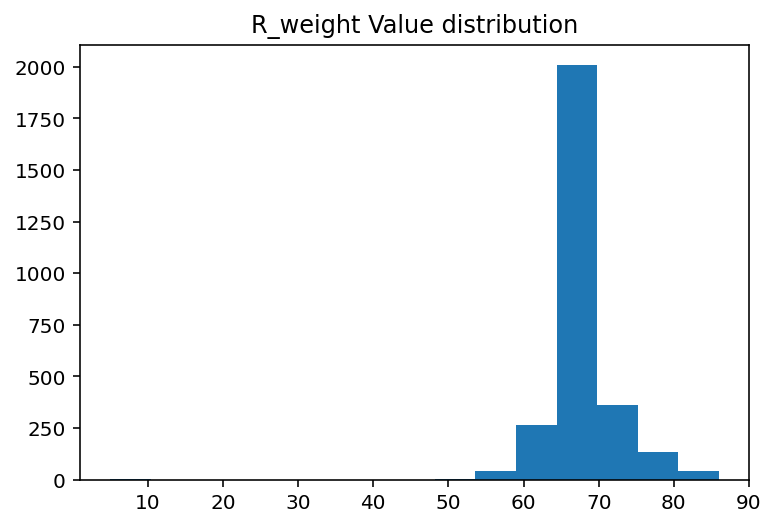

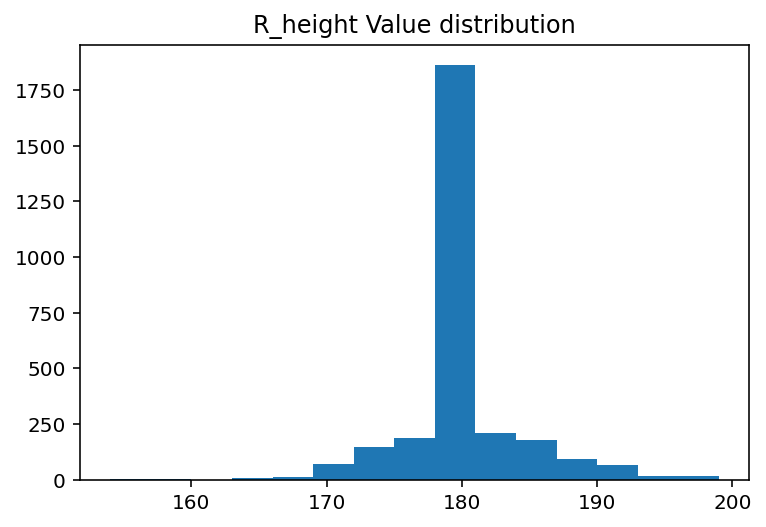

In [2308]:
# loop through numerical columns to explore and clean if necessary

num_columns = ['R_weight','R_height']

for col_name in num_columns:
    #plot their distribution
    plt.figure()
    plt.hist(RiderDF[col_name], bins=15)
    plt.title(col_name + ' Value distribution')
    plt.show()

In [2309]:
RiderDF.dtypes

Rider            object
R_TT              int64
R_onedayrace      int64
R_climb           int64
R_Sprint          int64
R_GC              int64
R_height        float64
R_weight        float64
dtype: object

In [2311]:
Hlist.value_counts()

180.0    595
178.0     42
181.0     37
179.0     36
183.0     36
175.0     35
185.0     32
182.0     32
184.0     30
177.0     30
173.0     30
176.0     28
174.0     27
186.0     27
190.0     20
189.0     18
188.0     17
172.0     16
171.0     15
170.0     12
187.0     12
191.0      8
169.0      6
192.0      5
194.0      4
168.0      3
197.0      3
164.0      2
193.0      2
195.0      2
165.0      2
198.0      2
167.0      2
196.0      1
199.0      1
159.0      1
Name: R_height, dtype: int64

The only issue here is the Team with no name.. That will not affect modelling so I'm leaving it like this.
I will deal the

### I will now combine this with the Riders data frame to add some more features

In [2322]:
modelDF=TDF_M.merge(RiderDF,on='Rider',how='left')

In [2323]:
modelDF.columns

Index(['index', 'Age', 'Distance', 'Rider', 'Rnk', 'Stage', 'StageScore',
       'Team', 'Time', 'Winnin Avg_speed', 'Year', 'R_TT', 'R_onedayrace',
       'R_climb', 'R_Sprint', 'R_GC', 'R_height', 'R_weight'],
      dtype='object')

In [2324]:
# Not all riders have data, so we need to fill these values with the average
modelDF.isnull().sum()/len(modelDF)

index               0.000000
Age                 0.000057
Distance            0.000000
Rider               0.000000
Rnk                 0.000000
Stage               0.000000
StageScore          0.000000
Team                0.003049
Time                0.000000
Winnin Avg_speed    0.000000
Year                0.000000
R_TT                0.205246
R_onedayrace        0.205246
R_climb             0.205246
R_Sprint            0.205246
R_GC                0.205246
R_height            0.205246
R_weight            0.205246
dtype: float64

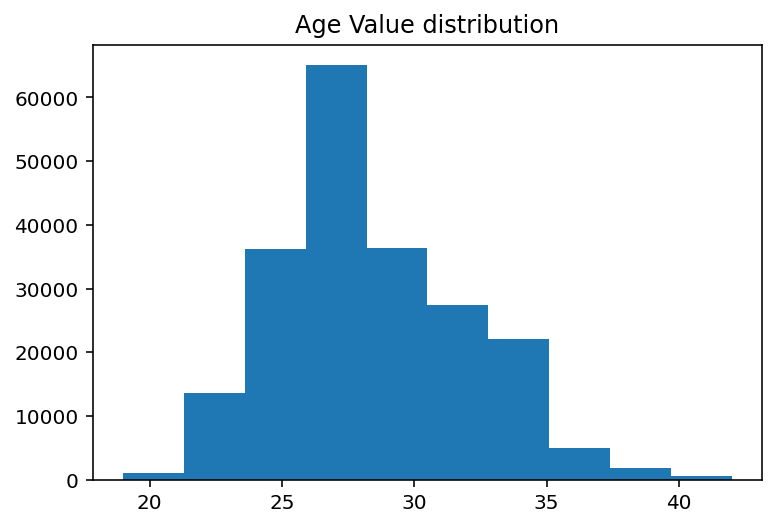

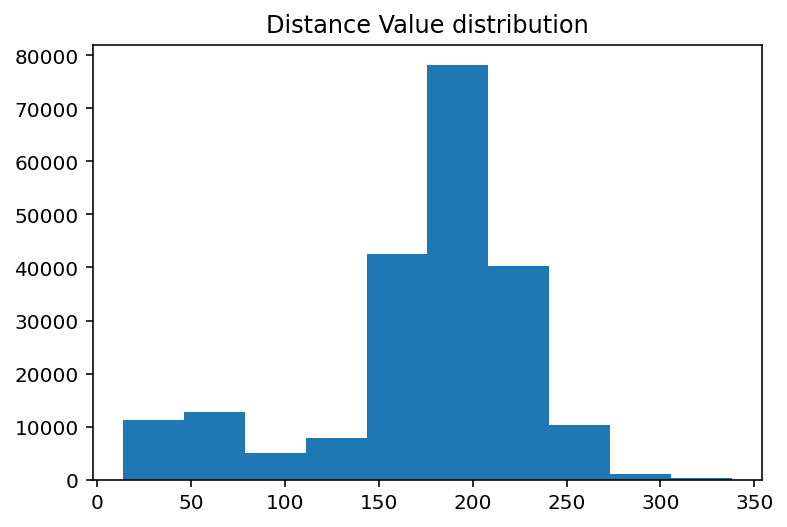

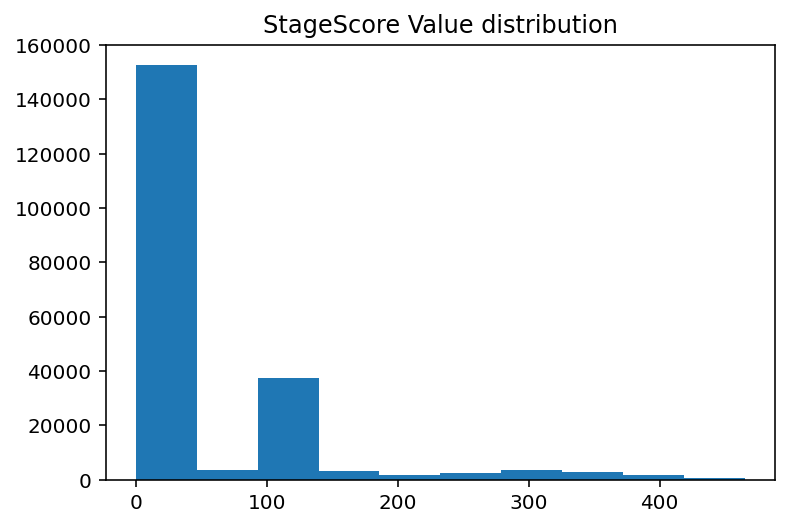

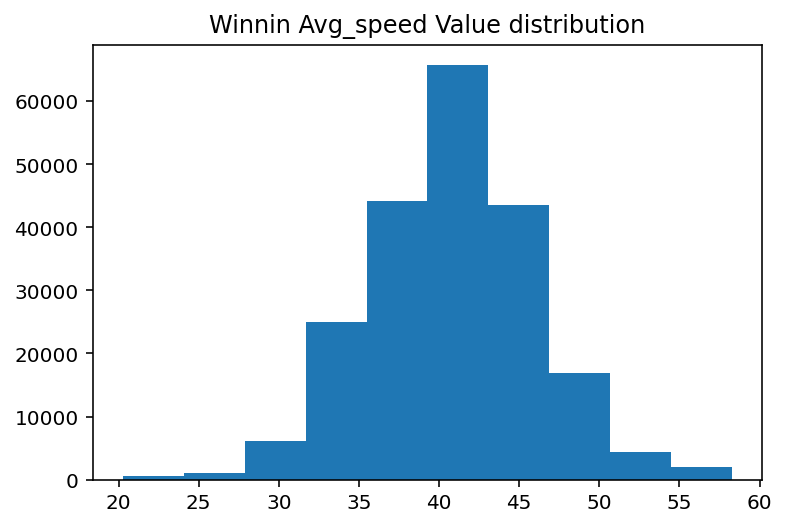

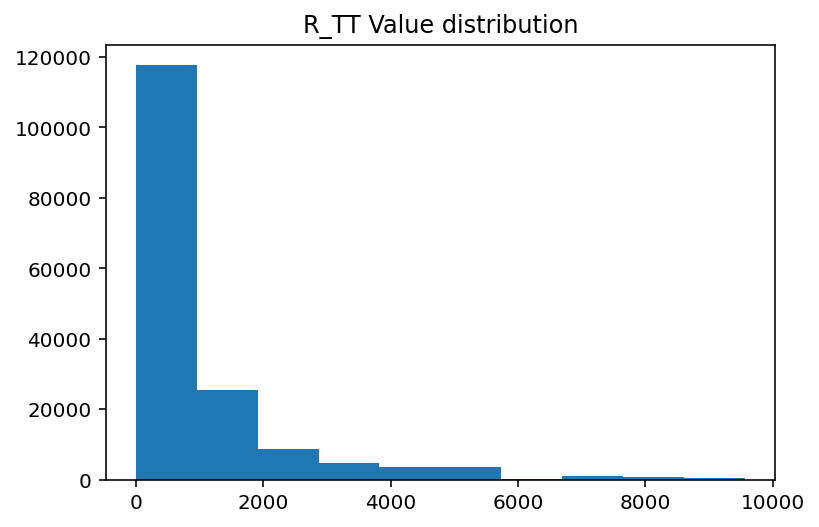

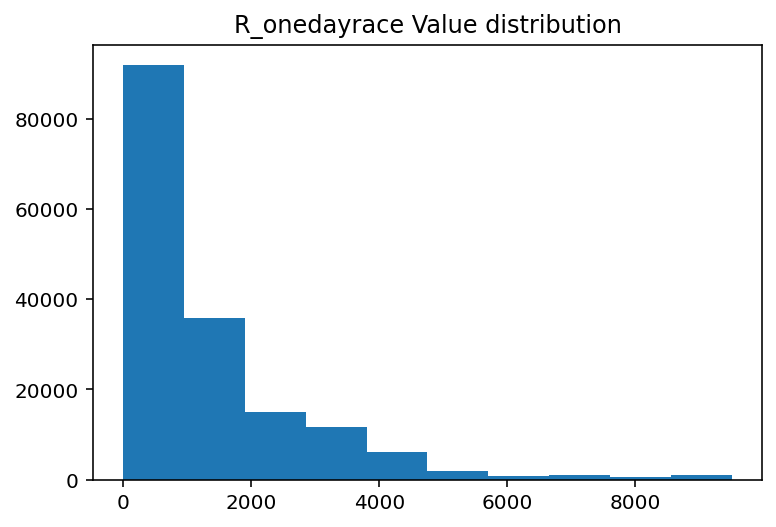

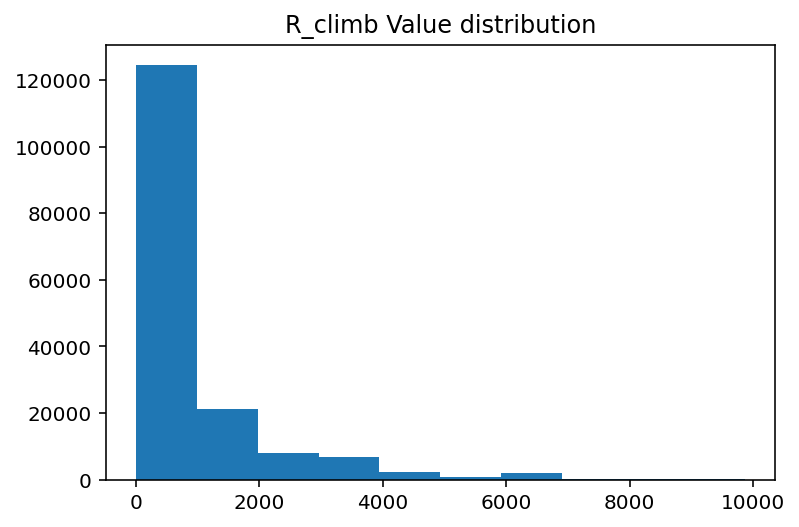

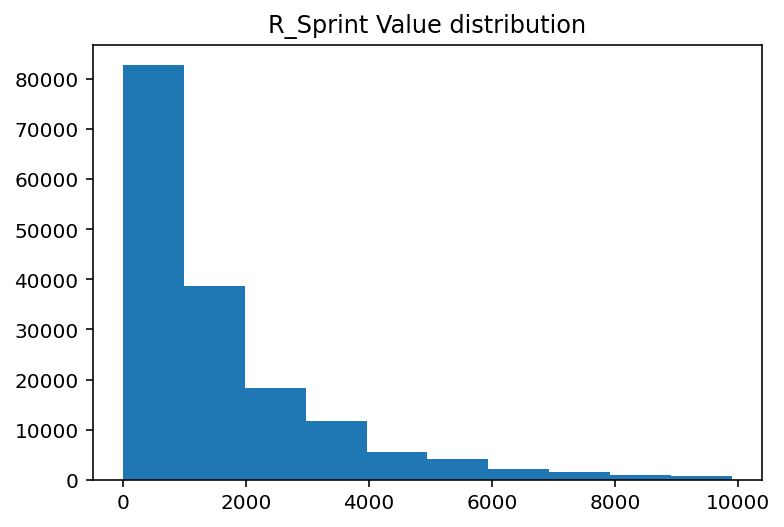

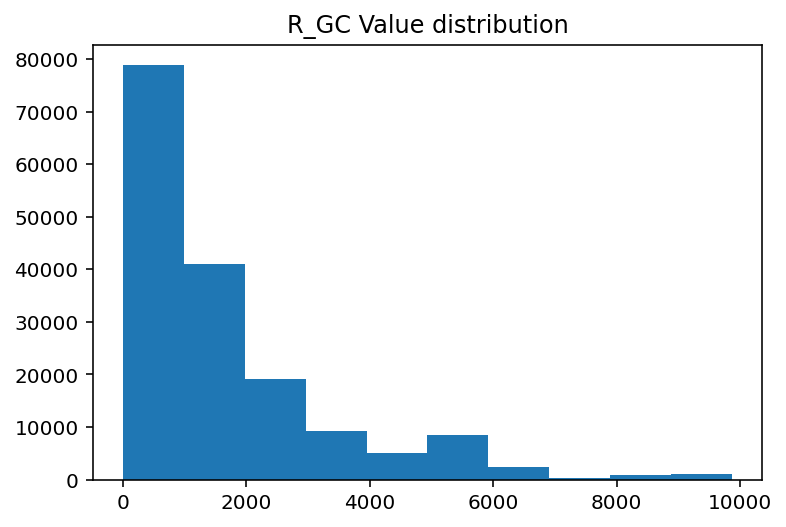

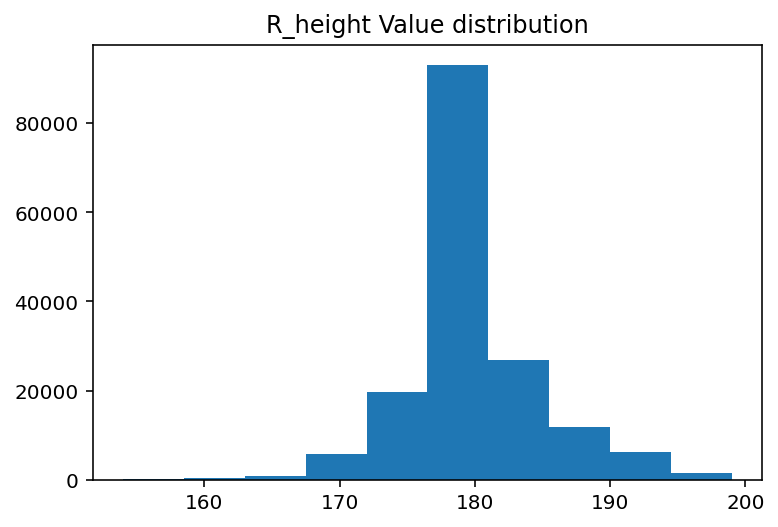

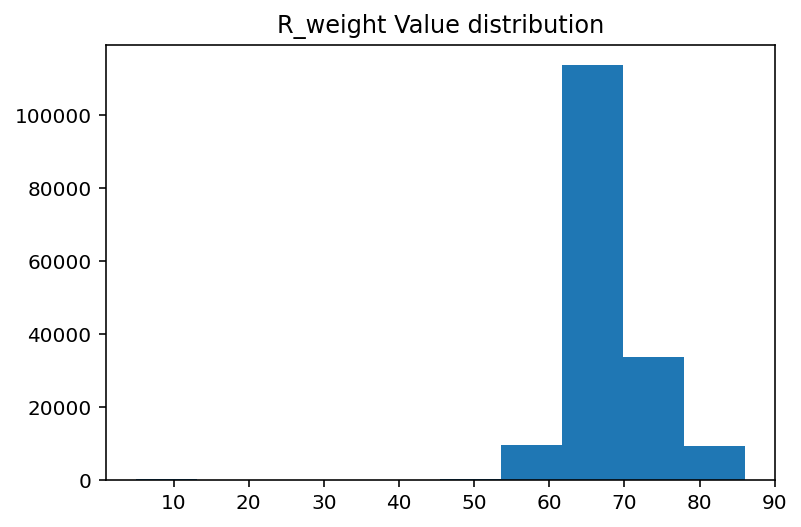

In [2325]:
# loop through numerical columns to explore and clean if necessary

num_columns = ['Age', 'Distance', 'StageScore','Winnin Avg_speed','R_TT','R_onedayrace','R_climb', 'R_Sprint', 'R_GC', 'R_height','R_weight']

for col_name in num_columns:
    #plot their distribution
    plt.figure()
    plt.hist(modelDF[col_name])
    plt.title(col_name + ' Value distribution')
    plt.show()

In [ ]:
# I wanto to first try to fix the heights that are too low


In [2327]:
modelDF.tail()

index   Age  Distance        Rider  Rnk Stage  StageScore  \
209222  241768  33.0     170.5  Roger-Kluge  169     9         107   
209223  241769  25.0     170.5   Caleb-Ewan  170     9         107   
209224  241769  25.0     170.5   Caleb-Ewan  170     9         107   
209225  241770  29.0     170.5  Peter-Sagan  171     9         107   
209226  241770  29.0     170.5  Peter-Sagan  171     9         107   

                    Team     Time  Winnin Avg_speed  Year    R_TT  \
209222      Lotto Soudal 00:00:02            42.064  2019   466.0   
209223      Lotto Soudal 00:00:02            42.064  2019   148.0   
209224      Lotto Soudal 00:00:02            42.064  2019   148.0   
209225  BORA - hansgrohe 00:00:02            42.064  2019  1280.0   
209226  BORA - hansgrohe 00:00:02            42.064  2019  1280.0   

        R_onedayrace  R_climb  R_Sprint    R_GC  R_height  R_weight  
209222         401.0     41.0    1409.0   351.0     192.0      83.0  
209223        1224.0    201.0    4592.0   201.0     165.0      67.0  
209224        1224.0    201.0    4592.0   201.0     165.0      67.0  
209225        8791.0   3038.0    3505.0  1496.0     184.0      78.0  
209226        8791.0   3038.0    3505.0  1496.0     184.0      78.0

As expected not every rider has all features avaiable, I will fill these Nulls with the average

In [2328]:
modelDF['R_height'].fillna((modelDF['R_height'].mean()), inplace=True)

In [2335]:
modelDF['R_TT'].fillna((modelDF['R_TT'].mean()), inplace=True)
modelDF['R_onedayrace'].fillna((modelDF['R_onedayrace'].mean()), inplace=True)
modelDF['R_climb'].fillna((modelDF['R_climb'].mean()), inplace=True)
modelDF['R_Sprint'].fillna((modelDF['R_Sprint'].mean()), inplace=True)
modelDF['R_GC'].fillna((modelDF['R_GC'].mean()), inplace=True)
modelDF['R_weight'].fillna((modelDF['R_weight'].mean()), inplace=True)
modelDF['Age'].fillna((modelDF['Age'].mean()), inplace=True)

In [2336]:
modelDF.isna().sum()/len(modelDF)

index               0.000000
Age                 0.000000
Distance            0.000000
Rider               0.000000
Rnk                 0.000000
Stage               0.000000
StageScore          0.000000
Team                0.003049
Time                0.000000
Winnin Avg_speed    0.000000
Year                0.000000
R_TT                0.000000
R_onedayrace        0.000000
R_climb             0.000000
R_Sprint            0.000000
R_GC                0.000000
R_height            0.000000
R_weight            0.000000
dtype: float64

In [2337]:
modelDF.head()

index   Age  Distance                                      Rider Rnk  \
0  105495  29.0     163.0               Priem CeesTI Raleigh - Creda   1   
1  105496  26.0     163.0         Osmont JacquesBoston - IFI - Mavic   2   
2  105497  27.0     163.0   Bertin YvonRenault - Gitane - Campagnolo   3   
3  105498  27.0     163.0                 Raas JanTI Raleigh - Creda   4   
4  105499  23.0     163.0  Tackaert WilliamDaf Trucks - Lejeune - PZ   5   

  Stage  StageScore                           Team     Time  Winnin Avg_speed  \
0    10           0             TI Raleigh - Creda 04:42:58             34.56   
1    10           0           Boston - IFI - Mavic 00:00:02             34.56   
2    10           0  Renault - Gitane - Campagnolo 00:00:00             34.56   
3    10           0             TI Raleigh - Creda 00:00:00             34.56   
4    10           0      Daf Trucks - Lejeune - PZ 00:00:00             34.56   

   Year        R_TT  R_onedayrace     R_climb     R_Sprint         R_GC  \
0  1980  919.123169   1353.840893  836.477839  1588.126867  1646.832588   
1  1980  919.123169   1353.840893  836.477839  1588.126867  1646.832588   
2  1980  919.123169   1353.840893  836.477839  1588.126867  1646.832588   
3  1980  919.123169   1353.840893  836.477839  1588.126867  1646.832588   
4  1980  919.123169   1353.840893  836.477839  1588.126867  1646.832588   

     R_height   R_weight  
0  180.216822  68.489139  
1  180.216822  68.489139  
2  180.216822  68.489139  
3  180.216822  68.489139  
4  180.216822  68.489139

In [2338]:
for col in ['Age','R_TT', 'R_onedayrace', 'R_onedayrace', 'R_Sprint','R_weight','Distance','R_GC','R_climb','R_height']:
    modelDF[col] = modelDF[col].astype(int)

In [2339]:
modelDF = modelDF.drop('index', 1)

In [2340]:
modelDF.head(5)

Age  Distance                                      Rider Rnk Stage  \
0   29       163               Priem CeesTI Raleigh - Creda   1    10   
1   26       163         Osmont JacquesBoston - IFI - Mavic   2    10   
2   27       163   Bertin YvonRenault - Gitane - Campagnolo   3    10   
3   27       163                 Raas JanTI Raleigh - Creda   4    10   
4   23       163  Tackaert WilliamDaf Trucks - Lejeune - PZ   5    10   

   StageScore                           Team     Time  Winnin Avg_speed  Year  \
0           0             TI Raleigh - Creda 04:42:58             34.56  1980   
1           0           Boston - IFI - Mavic 00:00:02             34.56  1980   
2           0  Renault - Gitane - Campagnolo 00:00:00             34.56  1980   
3           0             TI Raleigh - Creda 00:00:00             34.56  1980   
4           0      Daf Trucks - Lejeune - PZ 00:00:00             34.56  1980   

   R_TT  R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  
0   919          1353      836      1588  1646       180        68  
1   919          1353      836      1588  1646       180        68  
2   919          1353      836      1588  1646       180        68  
3   919          1353      836      1588  1646       180        68  
4   919          1353      836      1588  1646       180        68

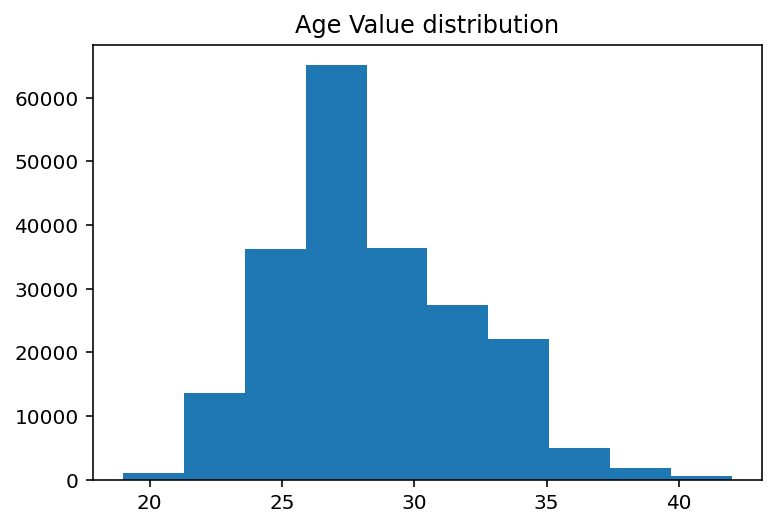

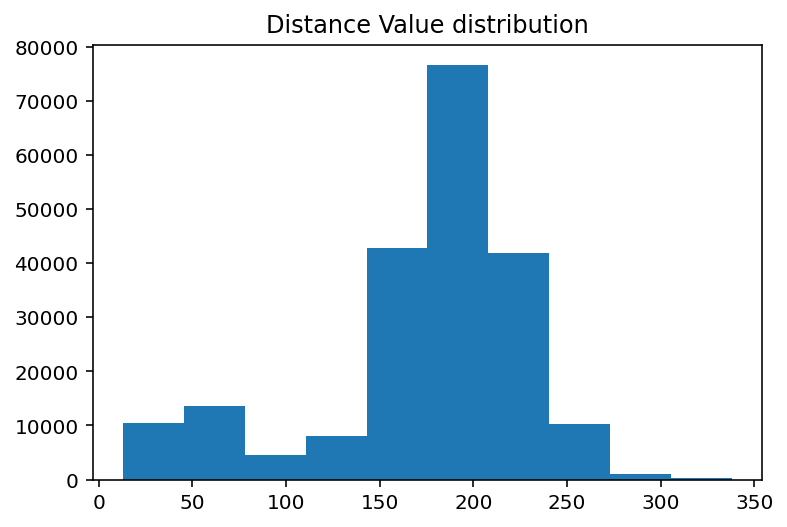

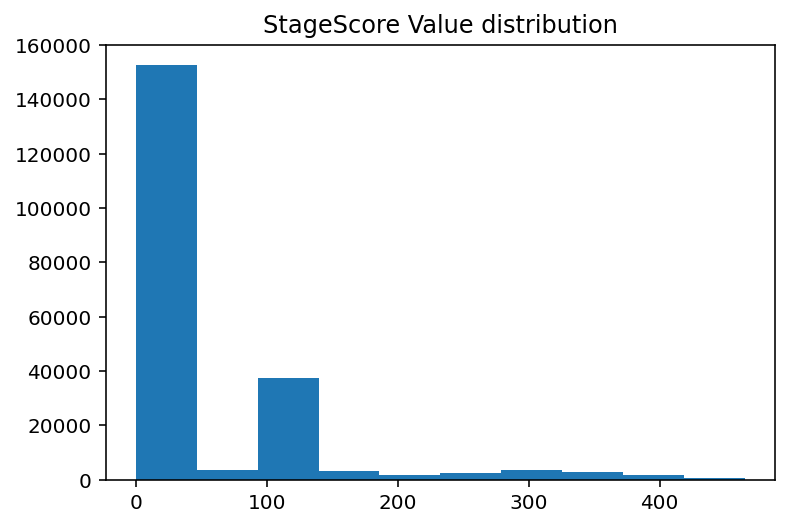

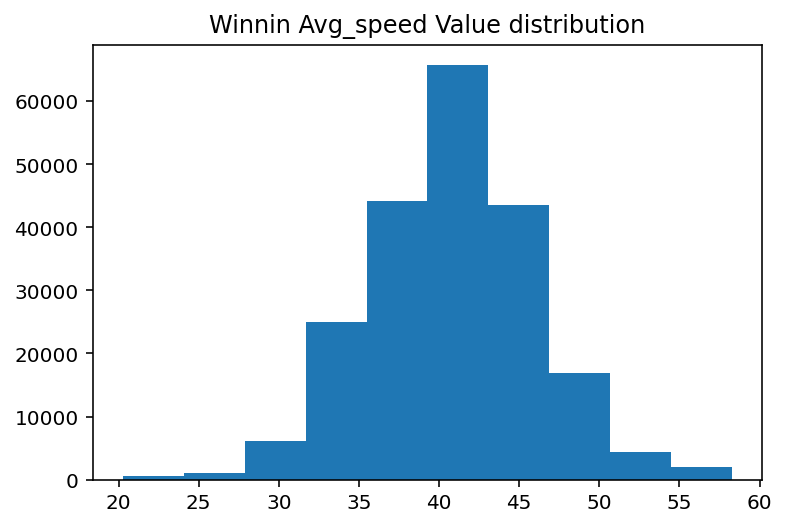

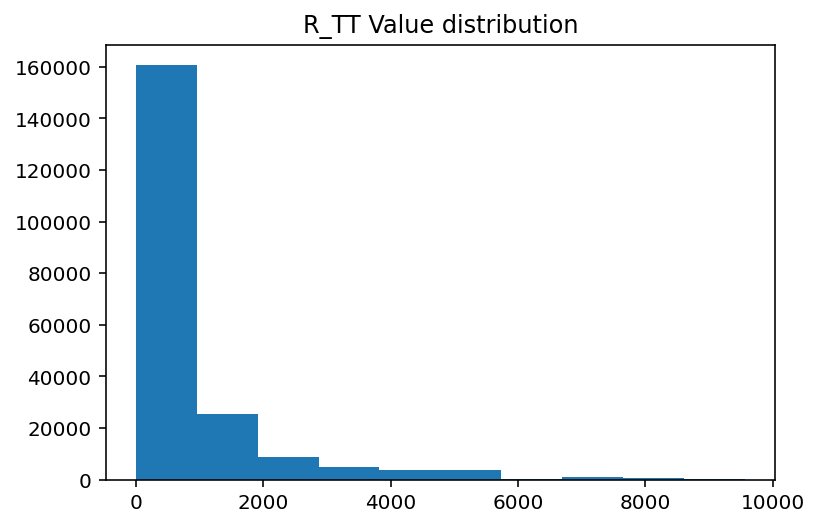

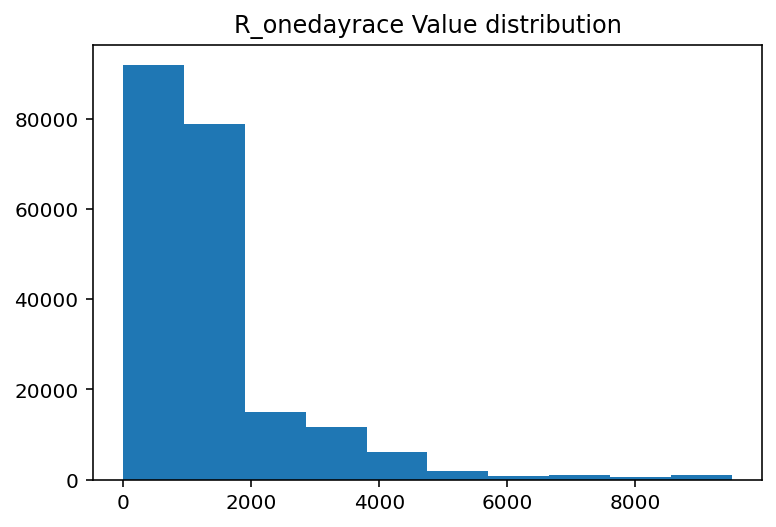

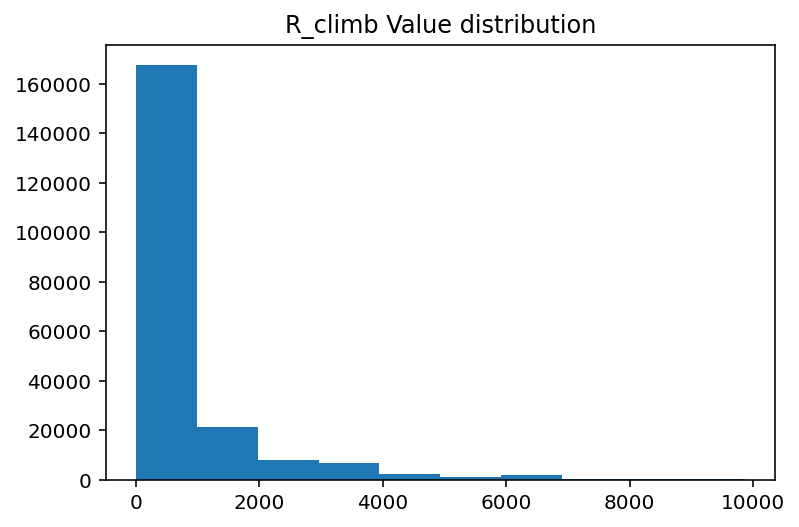

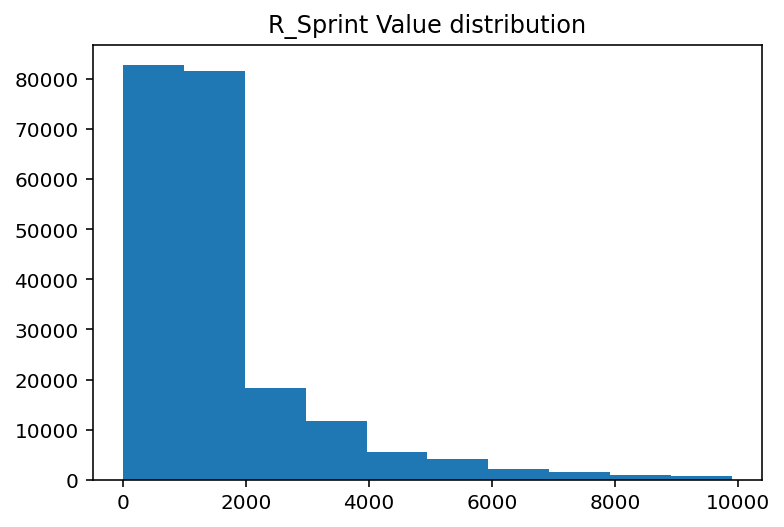

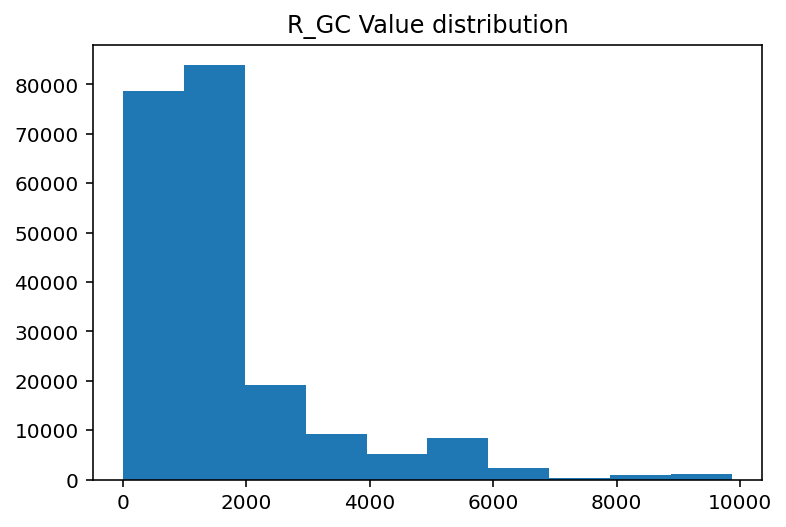

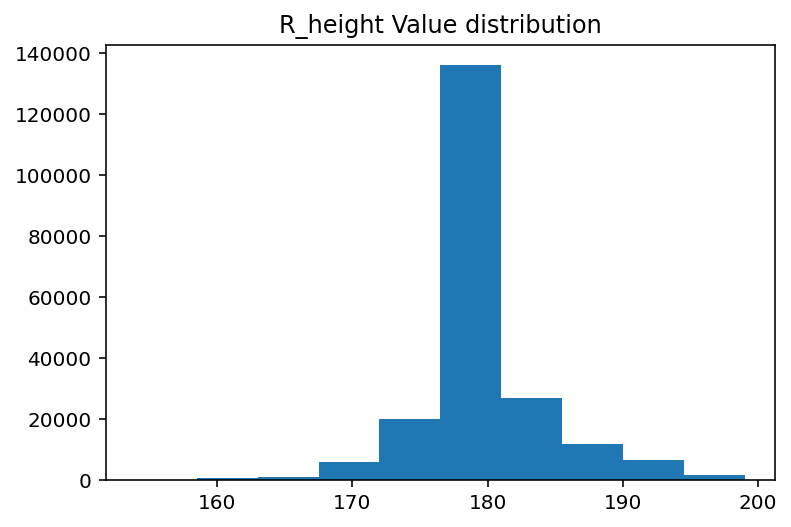

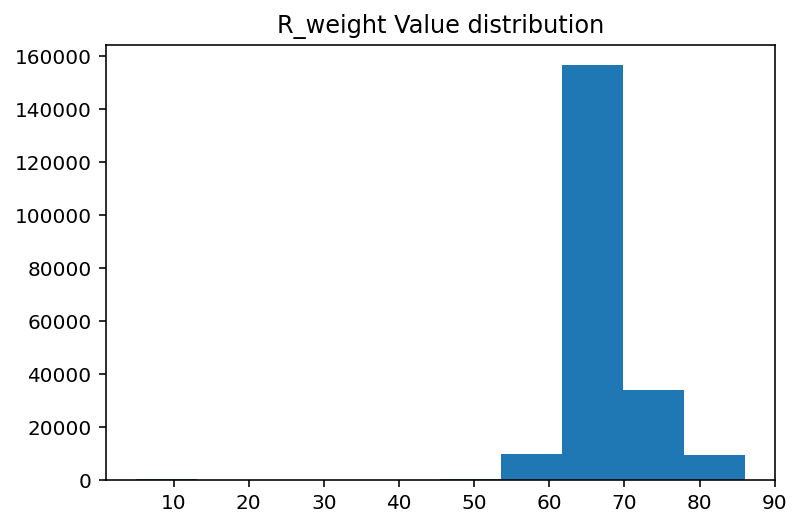

In [2341]:
# loop through numerical columns to explore and clean if necessary

num_columns = ['Age', 'Distance', 'StageScore','Winnin Avg_speed','R_TT','R_onedayrace','R_climb', 'R_Sprint', 'R_GC', 'R_height','R_weight']

for col_name in num_columns:
    #plot their distribution
    plt.figure()
    plt.hist(modelDF[col_name])
    plt.title(col_name + ' Value distribution')
    plt.show()

In [2342]:
#Making a copy of progress
#modelDFcopy=modelDF.copy()

In [2351]:
modelDF.head()

Age  Distance                                      Rider Rnk Stage  \
0   29       163               Priem CeesTI Raleigh - Creda   1    10   
1   26       163         Osmont JacquesBoston - IFI - Mavic   2    10   
2   27       163   Bertin YvonRenault - Gitane - Campagnolo   3    10   
3   27       163                 Raas JanTI Raleigh - Creda   4    10   
4   23       163  Tackaert WilliamDaf Trucks - Lejeune - PZ   5    10   

   StageScore                           Team     Time  Winnin Avg_speed  Year  \
0           0             TI Raleigh - Creda 04:42:58             34.56  1980   
1           0           Boston - IFI - Mavic 00:00:02             34.56  1980   
2           0  Renault - Gitane - Campagnolo 00:00:00             34.56  1980   
3           0             TI Raleigh - Creda 00:00:00             34.56  1980   
4           0      Daf Trucks - Lejeune - PZ 00:00:00             34.56  1980   

   R_TT  R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  Winner  
0   919          1353      836      1588  1646       180        68       0  
1   919          1353      836      1588  1646       180        68       0  
2   919          1353      836      1588  1646       180        68       0  
3   919          1353      836      1588  1646       180        68       0  
4   919          1353      836      1588  1646       180        68       0

### I now need to include my target columns, so a boolean column for winner/not winner

In [2355]:
Rnklist=modelDF['Rnk']

In [2361]:
modelDFlist=[]

for i in Rnklist:
    if i=='1':
        i=1 
    else:
        i=0
    modelDFlist.append(i)    

In [2362]:
modelDF['Winner']=modelDFlist

### Now the tricky part, define if the winner was in a break away or not, I will use the times to determine if the winner had a gap of more them 5 seconds to second place


In [2364]:
modelDF.head()

Age  Distance                                      Rider Rnk Stage  \
0   29       163               Priem CeesTI Raleigh - Creda   1    10   
1   26       163         Osmont JacquesBoston - IFI - Mavic   2    10   
2   27       163   Bertin YvonRenault - Gitane - Campagnolo   3    10   
3   27       163                 Raas JanTI Raleigh - Creda   4    10   
4   23       163  Tackaert WilliamDaf Trucks - Lejeune - PZ   5    10   

   StageScore                           Team     Time  Winnin Avg_speed  Year  \
0           0             TI Raleigh - Creda 04:42:58             34.56  1980   
1           0           Boston - IFI - Mavic 00:00:02             34.56  1980   
2           0  Renault - Gitane - Campagnolo 00:00:00             34.56  1980   
3           0             TI Raleigh - Creda 00:00:00             34.56  1980   
4           0      Daf Trucks - Lejeune - PZ 00:00:00             34.56  1980   

   R_TT  R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  Winner  
0   919          1353      836      1588  1646       180        68       1  
1   919          1353      836      1588  1646       180        68       0  
2   919          1353      836      1588  1646       180        68       0  
3   919          1353      836      1588  1646       180        68       0  
4   919          1353      836      1588  1646       180        68       0

In [2365]:
timelist=modelDF['Time']

In [2366]:
timelist[1]

Timedelta('0 days 00:00:02')

In [2367]:
import time
from datetime import datetime, date, time, timedelta


In [2369]:
#I'm checking if the time diference is greater than 5 seconds in relation to previous time.
#Except for winners the times are already set as the difference to row above
#So I only need to now if the difference is greater than 5 seconds
#When I get the winners that

breaklist=[]
for a in timelist:
    if a.total_seconds()>5:
        breaklist.append(1)
    else:
        breaklist.append(0)

#This list has the value fpr each line... I now need delete the first value.
In practice what I'm doing is sliding the values up. So if the second value is not higher than 5 I need to show on the row above in the dataframe

In [2370]:
#This list has the value fpr each line... I now need delete the first value. 
breaklist=breaklist[1:]

In [2371]:
#The last values is 0, as the last value is not a stage winner, most likely it is a last place
breaklist.append(0)

In [2372]:
modelDF['Breakaway']=breaklist

In [2373]:
modelDF

Age  Distance                                      Rider  Rnk Stage  \
0        29       163               Priem CeesTI Raleigh - Creda    1    10   
1        26       163         Osmont JacquesBoston - IFI - Mavic    2    10   
2        27       163   Bertin YvonRenault - Gitane - Campagnolo    3    10   
3        27       163                 Raas JanTI Raleigh - Creda    4    10   
4        23       163  Tackaert WilliamDaf Trucks - Lejeune - PZ    5    10   
...     ...       ...                                        ...  ...   ...   
209222   33       170                                Roger-Kluge  169     9   
209223   25       170                                 Caleb-Ewan  170     9   
209224   25       170                                 Caleb-Ewan  170     9   
209225   29       170                                Peter-Sagan  171     9   
209226   29       170                                Peter-Sagan  171     9   

        StageScore                           Team     Time  Winnin Avg_speed  \
0                0             TI Raleigh - Creda 04:42:58            34.560   
1                0           Boston - IFI - Mavic 00:00:02            34.560   
2                0  Renault - Gitane - Campagnolo 00:00:00            34.560   
3                0             TI Raleigh - Creda 00:00:00            34.560   
4                0      Daf Trucks - Lejeune - PZ 00:00:00            34.560   
...            ...                            ...      ...               ...   
209222         107                   Lotto Soudal 00:00:02            42.064   
209223         107                   Lotto Soudal 00:00:02            42.064   
209224         107                   Lotto Soudal 00:00:02            42.064   
209225         107               BORA - hansgrohe 00:00:02            42.064   
209226         107               BORA - hansgrohe 00:00:02            42.064   

        Year  R_TT  R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  \
0       1980   919          1353      836      1588  1646       180        68   
1       1980   919          1353      836      1588  1646       180        68   
2       1980   919          1353      836      1588  1646       180        68   
3       1980   919          1353      836      1588  1646       180        68   
4       1980   919          1353      836      1588  1646       180        68   
...      ...   ...           ...      ...       ...   ...       ...       ...   
209222  2019   466           401       41      1409   351       192        83   
209223  2019   148          1224      201      4592   201       165        67   
209224  2019   148          1224      201      4592   201       165        67   
209225  2019  1280          8791     3038      3505  1496       184        78   
209226  2019  1280          8791     3038      3505  1496       184        78   

        Winner  Breakaway  
0            1          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  
...        ...        ...  
209222       0          0  
209223       0          0  
209224       0          0  
209225       0          0  
209226       0          0  

[209227 rows x 19 columns]

In [2374]:
#Let me make this dataframe a easyer read
modeldf=modelDF[['Year','Stage','Distance','StageScore','Rnk','Rider','Age','Team','Time','Winnin Avg_speed','R_TT','R_onedayrace','R_climb','R_Sprint','R_GC','R_height','R_weight','Winner','Breakaway']]

I know can Identify the winners that had at least a 5 second gap. 
But I still have some riders that are not winners marked as 1 on the breakaway column. 
I need to fix that before modeling.

In [2375]:
modeldf[modeldf['Breakaway']== 1]

Year Stage  Distance  StageScore  Rnk  \
109     1980    10       163           0  110   
110     1980    10       163           0  111   
111     1980    10       163           0  112   
112     1980    10       163           0  113   
114     1980    10       163           0  115   
...      ...   ...       ...         ...  ...   
209053  2019     9       170         107   74   
209058  2019     9       170         107   76   
209059  2019     9       170         107   77   
209165  2019     9       170         107  136   
209166  2019     9       170         107  137   

                                           Rider  Age  \
109           De Keyser PaulBoston - IFI - Mavic   23   
110     Jourdan ChristianLa Redoute - Motobecane   25   
111          Vermeulen BennyBoston - IFI - Mavic   22   
112                        Sanders DominiqueTeka   22   
114             Maas JoDaf Trucks - Lejeune - PZ   25   
...                                          ...  ...   
209053                              Anthony-Roux   32   
209058                         Frederik-Backaert   29   
209059                        Matthieu-Ladagnous   34   
209165                           Jens-Keukeleire   30   
209166                              Nikias-Arndt   27   

                               Team     Time  Winnin Avg_speed  R_TT  \
109            Boston - IFI - Mavic 00:00:00            34.560   919   
110         La Redoute - Motobecane 00:00:06            34.560   919   
111            Boston - IFI - Mavic 00:00:26            34.560   919   
112                            Teka 00:00:32            34.560   919   
114       Daf Trucks - Lejeune - PZ 00:00:00            34.560   919   
...                             ...      ...               ...   ...   
209053               Groupama - FDJ 00:17:52            42.064  1091   
209058  Wanty - Gobert Cycling Team 00:00:01            42.064    10   
209059               Groupama - FDJ 00:19:03            42.064   232   
209165                 Lotto Soudal 00:00:01            42.064   163   
209166                  Team Sunweb 00:21:22            42.064   655   

        R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  Winner  \
109             1353      836      1588  1646       180        68       0   
110             1353      836      1588  1646       180        68       0   
111             1353      836      1588  1646       180        68       0   
112             1353      836      1588  1646       180        68       0   
114             1353      836      1588  1646       180        68       0   
...              ...      ...       ...   ...       ...       ...     ...   
209053          1307      530      1732  1163       188        73       0   
209058           498      104       480   398       188        75       0   
209059          1364      288      1721  1379       181        73       0   
209165          1868      306      1922  1038       185        69       0   
209166           638      342      1511   489       188         5       0   

        Breakaway  
109             1  
110             1  
111             1  
112             1  
114             1  
...           ...  
209053          1  
209058          1  
209059          1  
209165          1  
209166          1  

[58947 rows x 19 columns]

In [2376]:
modeldf[(modeldf.Rnk== 1) & (modeldf.Breakaway == 1)]

Year Stage  Distance  StageScore Rnk  \
1114    1980    1b        45           0   1   
1269    1980    20        34           0   1   
1646    1980     4        33           0   1   
2125    1980     8       164           0   1   
3832    1981    1b        45           0   1   
3995    1981    20        46           0   1   
5572    1982    11        57           0   1   
6031    1982    14        32           0   1   
7596    1982     6       233           0   1   
8915    1983    15        15           0   1   
9304    1983    19        15           0   1   
9511    1983    21        50           0   1   
10089   1983     6        58           0   1   
10484   1983     9       207           0   1   
11671   1984    16        22           0   1   
12883   1984     4        83           0   1   
13549   1984     8       192           0   1   
14215   1985    11       195         100   1   
14534   1985    13        31           0   1   
15291   1985   18a        52           0   1   
16356   1985     3        75           0   1   
19203   1986    19       179           0   1   
19349   1986     2        56           0   1   
19655   1986    22       196           0   1   
19797   1986    23       246           0   1   
21191   1986     9        61           0   1   
21625   1987    10        87           0   1   
23214   1987    18        36           0   1   
23215   1987    18        36           0   1   
23567   1987     2        40           0   1   
24603   1987     4        79           0   1   
24604   1987     4        79           0   1   
24827   1987     5       112           0   1   
24828   1987     5       112           0   1   
25929   1988     1        91           0   1   
25930   1988     1        91           0   1   
26770   1988    13        38           0   1   
28068   1988     2        48           0   1   
30122   1989     1       135           0   1   
31485   1989    16       175         100   1   
31486   1989    16       175         100   1   
32156   1989     2        46           0   1   
32195   1989    20       130           0   1   
32358   1989    21        24           0   1   
32752   1989     4       255           0   1   
34108   1990     1       138           0   1   
36141   1990    18       202           0   1   
36560   1990     2        44           0   1   
36561   1990     2        44           0   1   
36574   1990    20        45           0   1   
36575   1990    20        45           0   1   
36783   1990    21       182           0   1   
37250   1990     4       203           0   1   
40470   1991     2        36           0   1   
40484   1991    20       160           0   1   
40642   1991    21        57           0   1   
41938   1991     8        73           0   1   
43919   1992    17       189           0   1   
43920   1992    17       189           0   1   
44107   1992    18       212           0   1   
44295   1992    19        64           0   1   
44296   1992    19        64           0   1   
44950   1992    21       141           0   1   
45173   1992     4        63           0   1   
45174   1992     4        63           0   1   
46259   1992     9        65           0   1   
46260   1992     9        65           0   1   
47998   1993    19        48           0   1   
48311   1993    20       196           0   1   
48707   1993     4        81           0   1   
48708   1993     4        81           0   1   
49416   1993     9        59           0   1   
49776   1994    10       160           0   1   
51175   1994    19        47           0   1   
51714   1994     3        66           0   1   
51715   1994     3        66           0   1   
51732   1994     4       204           0   1   
52651   1995     1       228           0   1   
54046   1995    14       159         100   1   
54047   1995    14       159         100   1   
54957   1995    19        46           0   1   
54958   1995    19        46           0   1   
55529   1995    20      

I realized that if the rider is both a winner and had a 5 seconnd gap, the sum of the columns will be 2, that will be a quick fix for this purpose.

In [2377]:
summ=modeldf['Winner'] + modeldf['Breakaway']


In [2378]:
modeldf['Gap'] = summ


C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2379]:
modeldf[modeldf['Gap']==2]

Year Stage  Distance  StageScore Rnk  \
115     1980    11        51           0   1   
342     1980    13       200         100   1   
443     1980    14       189           0   1   
723     1980    17       242         100   1   
813     1980    18       198         100   1   
1524    1980     3       282           0   1   
3067    1981    14        38           0   1   
3333    1981    16       199           0   1   
3460    1981    17       230         100   1   
3585    1981    18       131         100   1   
3847    1981     2       254           0   1   
4523    1981     5       117         100   1   
5251    1982     1       207           0   1   
5879    1982    13       122         100   1   
6183    1982    15       208         100   1   
6333    1982    16       123         100   1   
6480    1982    17       251         100   1   
6610    1982    18       233           0   1   
6737    1982    19        48           0   1   
8069    1982    9b       138           0   1   
8364    1983    10       201         100   1   
8704    1983    13       210           0   1   
8812    1983    14       149           0   1   
9215    1983    18       247         100   1   
9423    1983    20       291           0   1   
9824    1983     4       299           0   1   
9957    1983     5       257           0   1   
10945   1984    11       226         100   1   
11389   1984    14       227           0   1   
11531   1984    15       241           0   1   
11811   1984    17       223         100   1   
11945   1984    18       185         100   1   
12074   1984    19       186         100   1   
12371   1984    20       140         100   1   
13385   1984     7        67           0   1   
14692   1985    14       179           0   1   
14849   1985    15       237           0   1   
15000   1985    16       247           0   1   
15146   1985    17       209         100   1   
15924   1985    20       225           0   1   
16546   1985     5       224           0   1   
17056   1985     8        75           0   1   
17222   1985     9       173           0   1   
18211   1986    13       186         100   1   
18389   1986    14       154           0   1   
18736   1986    16       246           0   1   
18737   1986    16       246           0   1   
18901   1986    17       190         100   1   
19369   1986    20        58           0   1   
19513   1986    21       190         100   1   
20573   1986     6       200           0   1   
21844   1987    11       255         100   1   
22267   1987    13       219           0   1   
22268   1987    13       219           0   1   
22465   1987    14       166         100   1   
22844   1987    16       216         100   1   
23605   1987    20       201         100   1   
23606   1987    20       201         100   1   
23924   1987    22       186         100   1   
24229   1987    24        38           0   1   
24230   1987    24        38           0   1   
25051   1987     6       169           0   1   
26362   1988    11       232           0   1   
26571   1988    12       227         100   1   
27165   1988    15       187         100   1   
27166   1988    15       187         100   1   
27720   1988    18        93           0   1   
27897   1988    19       188         100   1   
28104   1988    20       223           0   1   
29049   1988     5       147           0   1   
29050   1988     5       147           0   1   
29266   1988     6        52           0   1   
29267   1988     6        52           0   1   
29481   1988     7       225           0   1   
29909   1988     9       160           0   1   
30945   1989    13       179           0   1   
31129   1989    14       240           0   1   
31309   1989    15        39           0   1   
31661   1989    17       165         100   1   
31829   1989    18        91         100   1   
32983   1989     5        73           0   1   
33212   1989     6       259           0   1   
33887   1989     9      

Now I can get rid of Breakaway column and just adjust the gap column.

In [2380]:
modeldf=modeldf.drop(['Breakaway'],axis=1)

In [2381]:
modeldf.loc[modeldf['Gap'] ==1, 'Gap'] = 0

In [2382]:
modeldf.loc[modeldf['Gap'] ==2, 'Gap'] = 1

In [2383]:
modeldf[modeldf['Gap']==1]

Year Stage  Distance  StageScore Rnk  \
115     1980    11        51           0   1   
342     1980    13       200         100   1   
443     1980    14       189           0   1   
723     1980    17       242         100   1   
813     1980    18       198         100   1   
1524    1980     3       282           0   1   
3067    1981    14        38           0   1   
3333    1981    16       199           0   1   
3460    1981    17       230         100   1   
3585    1981    18       131         100   1   
3847    1981     2       254           0   1   
4523    1981     5       117         100   1   
5251    1982     1       207           0   1   
5879    1982    13       122         100   1   
6183    1982    15       208         100   1   
6333    1982    16       123         100   1   
6480    1982    17       251         100   1   
6610    1982    18       233           0   1   
6737    1982    19        48           0   1   
8069    1982    9b       138           0   1   
8364    1983    10       201         100   1   
8704    1983    13       210           0   1   
8812    1983    14       149           0   1   
9215    1983    18       247         100   1   
9423    1983    20       291           0   1   
9824    1983     4       299           0   1   
9957    1983     5       257           0   1   
10945   1984    11       226         100   1   
11389   1984    14       227           0   1   
11531   1984    15       241           0   1   
11811   1984    17       223         100   1   
11945   1984    18       185         100   1   
12074   1984    19       186         100   1   
12371   1984    20       140         100   1   
13385   1984     7        67           0   1   
14692   1985    14       179           0   1   
14849   1985    15       237           0   1   
15000   1985    16       247           0   1   
15146   1985    17       209         100   1   
15924   1985    20       225           0   1   
16546   1985     5       224           0   1   
17056   1985     8        75           0   1   
17222   1985     9       173           0   1   
18211   1986    13       186         100   1   
18389   1986    14       154           0   1   
18736   1986    16       246           0   1   
18737   1986    16       246           0   1   
18901   1986    17       190         100   1   
19369   1986    20        58           0   1   
19513   1986    21       190         100   1   
20573   1986     6       200           0   1   
21844   1987    11       255         100   1   
22267   1987    13       219           0   1   
22268   1987    13       219           0   1   
22465   1987    14       166         100   1   
22844   1987    16       216         100   1   
23605   1987    20       201         100   1   
23606   1987    20       201         100   1   
23924   1987    22       186         100   1   
24229   1987    24        38           0   1   
24230   1987    24        38           0   1   
25051   1987     6       169           0   1   
26362   1988    11       232           0   1   
26571   1988    12       227         100   1   
27165   1988    15       187         100   1   
27166   1988    15       187         100   1   
27720   1988    18        93           0   1   
27897   1988    19       188         100   1   
28104   1988    20       223           0   1   
29049   1988     5       147           0   1   
29050   1988     5       147           0   1   
29266   1988     6        52           0   1   
29267   1988     6        52           0   1   
29481   1988     7       225           0   1   
29909   1988     9       160           0   1   
30945   1989    13       179           0   1   
31129   1989    14       240           0   1   
31309   1989    15        39           0   1   
31661   1989    17       165         100   1   
31829   1989    18        91         100   1   
32983   1989     5        73           0   1   
33212   1989     6       259           0   1   
33887   1989     9      

In [2385]:
modeldf.head()

Year Stage  Distance  StageScore Rnk  \
0  1980    10       163           0   1   
1  1980    10       163           0   2   
2  1980    10       163           0   3   
3  1980    10       163           0   4   
4  1980    10       163           0   5   

                                       Rider  Age  \
0               Priem CeesTI Raleigh - Creda   29   
1         Osmont JacquesBoston - IFI - Mavic   26   
2   Bertin YvonRenault - Gitane - Campagnolo   27   
3                 Raas JanTI Raleigh - Creda   27   
4  Tackaert WilliamDaf Trucks - Lejeune - PZ   23   

                            Team     Time  Winnin Avg_speed  R_TT  \
0             TI Raleigh - Creda 04:42:58             34.56   919   
1           Boston - IFI - Mavic 00:00:02             34.56   919   
2  Renault - Gitane - Campagnolo 00:00:00             34.56   919   
3             TI Raleigh - Creda 00:00:00             34.56   919   
4      Daf Trucks - Lejeune - PZ 00:00:00             34.56   919   

   R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  Winner  Gap  
0          1353      836      1588  1646       180        68       1    0  
1          1353      836      1588  1646       180        68       0    0  
2          1353      836      1588  1646       180        68       0    0  
3          1353      836      1588  1646       180        68       0    0  
4          1353      836      1588  1646       180        68       0    0

### Ok, seems that now I finnally have a usefull dataset to model with.

I'll start by appling a Logistic regression just to test it out

In [2386]:
import statsmodels.api as sm
import seaborn as sns

Let me first take a look at correlations 

In [2387]:
modeldf.columns

Index(['Year', 'Stage', 'Distance', 'StageScore', 'Rnk', 'Rider', 'Age',
       'Team', 'Time', 'Winnin Avg_speed', 'R_TT', 'R_onedayrace', 'R_climb',
       'R_Sprint', 'R_GC', 'R_height', 'R_weight', 'Winner', 'Gap'],
      dtype='object')

In [2493]:
modeldf.to_csv('data/TDF_modeltf.csv')

In [2388]:
# First define the features I'm analyzing
feat=modeldf.drop(columns=['Year','Stage','Rider','Team','Winner']).copy()

In [2389]:
featcorr=feat.corr()

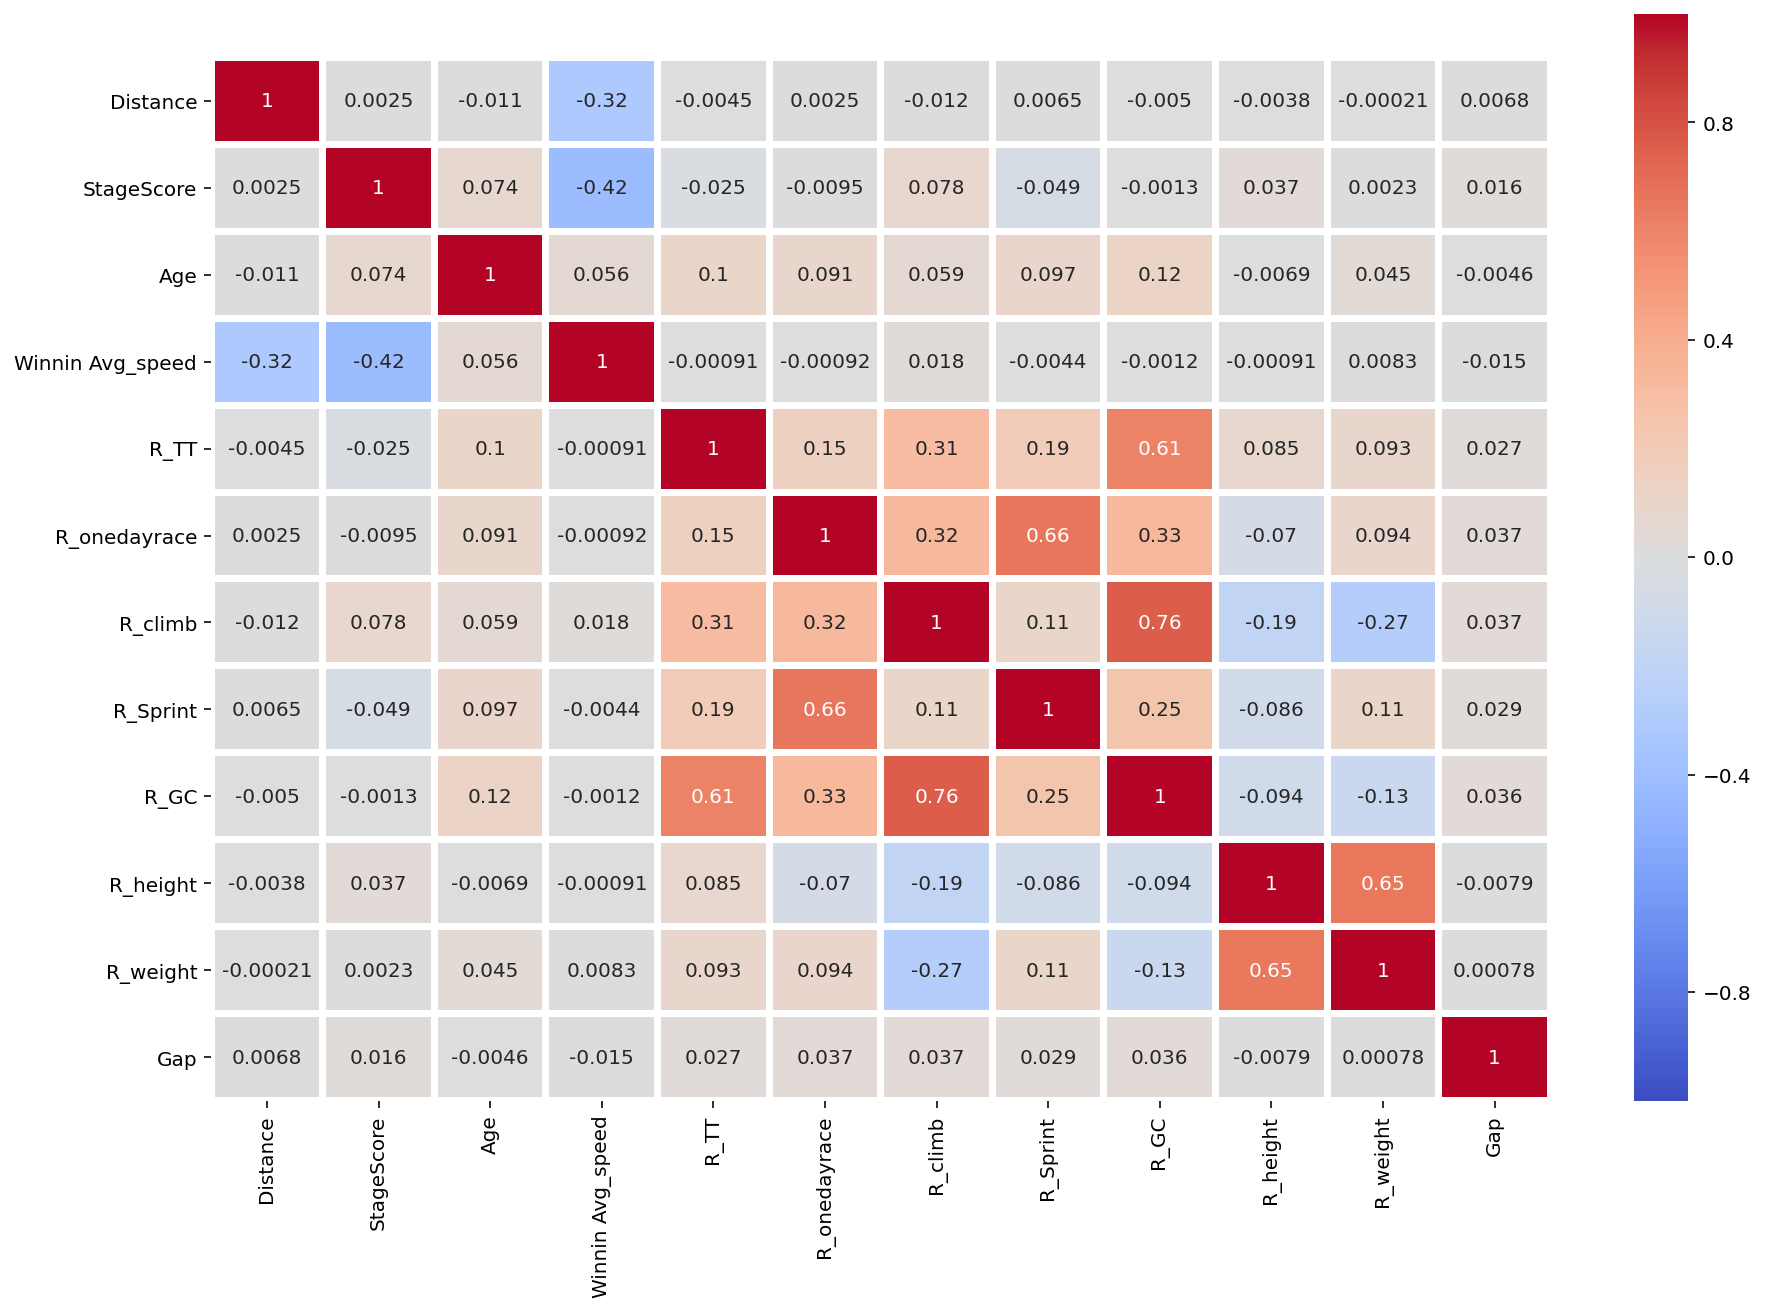

In [2390]:
plt.figure(figsize=(15,10))
sns.heatmap(featcorr,cmap='coolwarm', center=0,annot=True, linewidths=3, vmin=-1, vmax=1)
# Don't worry about this, work-around for matplotlib issue where top
plt.ylim(len(featcorr.columns),-0.5, -0.5)
plt.show()

I expected the riders features to be correlated, but I can't just get rid of the riders profile scores. I can clean this a little. 

Height and weight have a correlation of 0.65, as a cyclist I know that what really matters is how in shape a rider is. So I will set a new feature that is the relation from both

In [2391]:
feat['R_fit']=feat['R_weight']/feat['R_height']

In [2392]:
feat.head(20)

Distance  StageScore Rnk  Age     Time  Winnin Avg_speed  R_TT  \
0        163           0   1   29 04:42:58             34.56   919   
1        163           0   2   26 00:00:02             34.56   919   
2        163           0   3   27 00:00:00             34.56   919   
3        163           0   4   27 00:00:00             34.56   919   
4        163           0   5   23 00:00:00             34.56   919   
5        163           0   6   30 00:00:00             34.56   919   
6        163           0   7   24 00:00:02             34.56   919   
7        163           0   8   25 00:00:00             34.56   919   
8        163           0   9   31 00:00:00             34.56   919   
9        163           0  10   27 00:00:00             34.56   919   
10       163           0  11   22 00:00:00             34.56   919   
11       163           0  12   27 00:00:00             34.56   919   
12       163           0  13   23 00:00:00             34.56   919   
13       163           0  14   23 00:00:00             34.56   919   
14       163           0  15   24 00:00:00             34.56   919   
15       163           0  16   24 00:00:00             34.56   919   
16       163           0  17   31 00:00:00             34.56   919   
17       163           0  18   31 00:00:00             34.56   919   
18       163           0  19   23 00:00:00             34.56   919   
19       163           0  20   30 00:00:00             34.56   919   

    R_onedayrace  R_climb  R_Sprint  R_GC  R_height  R_weight  Gap     R_fit  
0           1353      836      1588  1646       180        68    0  0.377778  
1           1353      836      1588  1646       180        68    0  0.377778  
2           1353      836      1588  1646       180        68    0  0.377778  
3           1353      836      1588  1646       180        68    0  0.377778  
4           1353      836      1588  1646       180        68    0  0.377778  
5           1353      836      1588  1646       180        68    0  0.377778  
6           1353      836      1588  1646       180        68    0  0.377778  
7           1353      836      1588  1646       180        68    0  0.377778  
8           1353      836      1588  1646       180        68    0  0.377778  
9           1353      836      1588  1646       180        68    0  0.377778  
10          1353      836      1588  1646       180        68    0  0.377778  
11          1353      836      1588  1646       180        68    0  0.377778  
12          1353      836      1588  1646       180        68    0  0.377778  
13          1353      836      1588  1646       180        68    0  0.377778  
14          1353      836      1588  1646       180        68    0  0.377778  
15          1353      836      1588  1646       180        68    0  0.377778  
16          1353      836      1588  1646       180        68    0  0.377778  
17          1353      836      1588  1646       180        68    0  0.377778  
18          1353      836      1588  1646       180        68    0  0.377778  
19          1353      836      1588  1646       180        68    0  0.377778

In [2396]:
# And let's check that again
# First define the features I'm analyzing
feat=feat.drop(columns=['R_height','R_weight'])

In [2397]:
feat.to_timedelta()

Distance  StageScore  Rnk  Age     Time  Winnin Avg_speed  R_TT  \
0            163           0    1   29 04:42:58            34.560   919   
1            163           0    2   26 00:00:02            34.560   919   
2            163           0    3   27 00:00:00            34.560   919   
3            163           0    4   27 00:00:00            34.560   919   
4            163           0    5   23 00:00:00            34.560   919   
...          ...         ...  ...  ...      ...               ...   ...   
209222       170         107  169   33 00:00:02            42.064   466   
209223       170         107  170   25 00:00:02            42.064   148   
209224       170         107  170   25 00:00:02            42.064   148   
209225       170         107  171   29 00:00:02            42.064  1280   
209226       170         107  171   29 00:00:02            42.064  1280   

        R_onedayrace  R_climb  R_Sprint  R_GC  Gap     R_fit  
0               1353      836      1588  1646    0  0.377778  
1               1353      836      1588  1646    0  0.377778  
2               1353      836      1588  1646    0  0.377778  
3               1353      836      1588  1646    0  0.377778  
4               1353      836      1588  1646    0  0.377778  
...              ...      ...       ...   ...  ...       ...  
209222           401       41      1409   351    0  0.432292  
209223          1224      201      4592   201    0  0.406061  
209224          1224      201      4592   201    0  0.406061  
209225          8791     3038      3505  1496    0  0.423913  
209226          8791     3038      3505  1496    0  0.423913  

[209227 rows x 13 columns]

In [2398]:
featcorr=feat.corr()

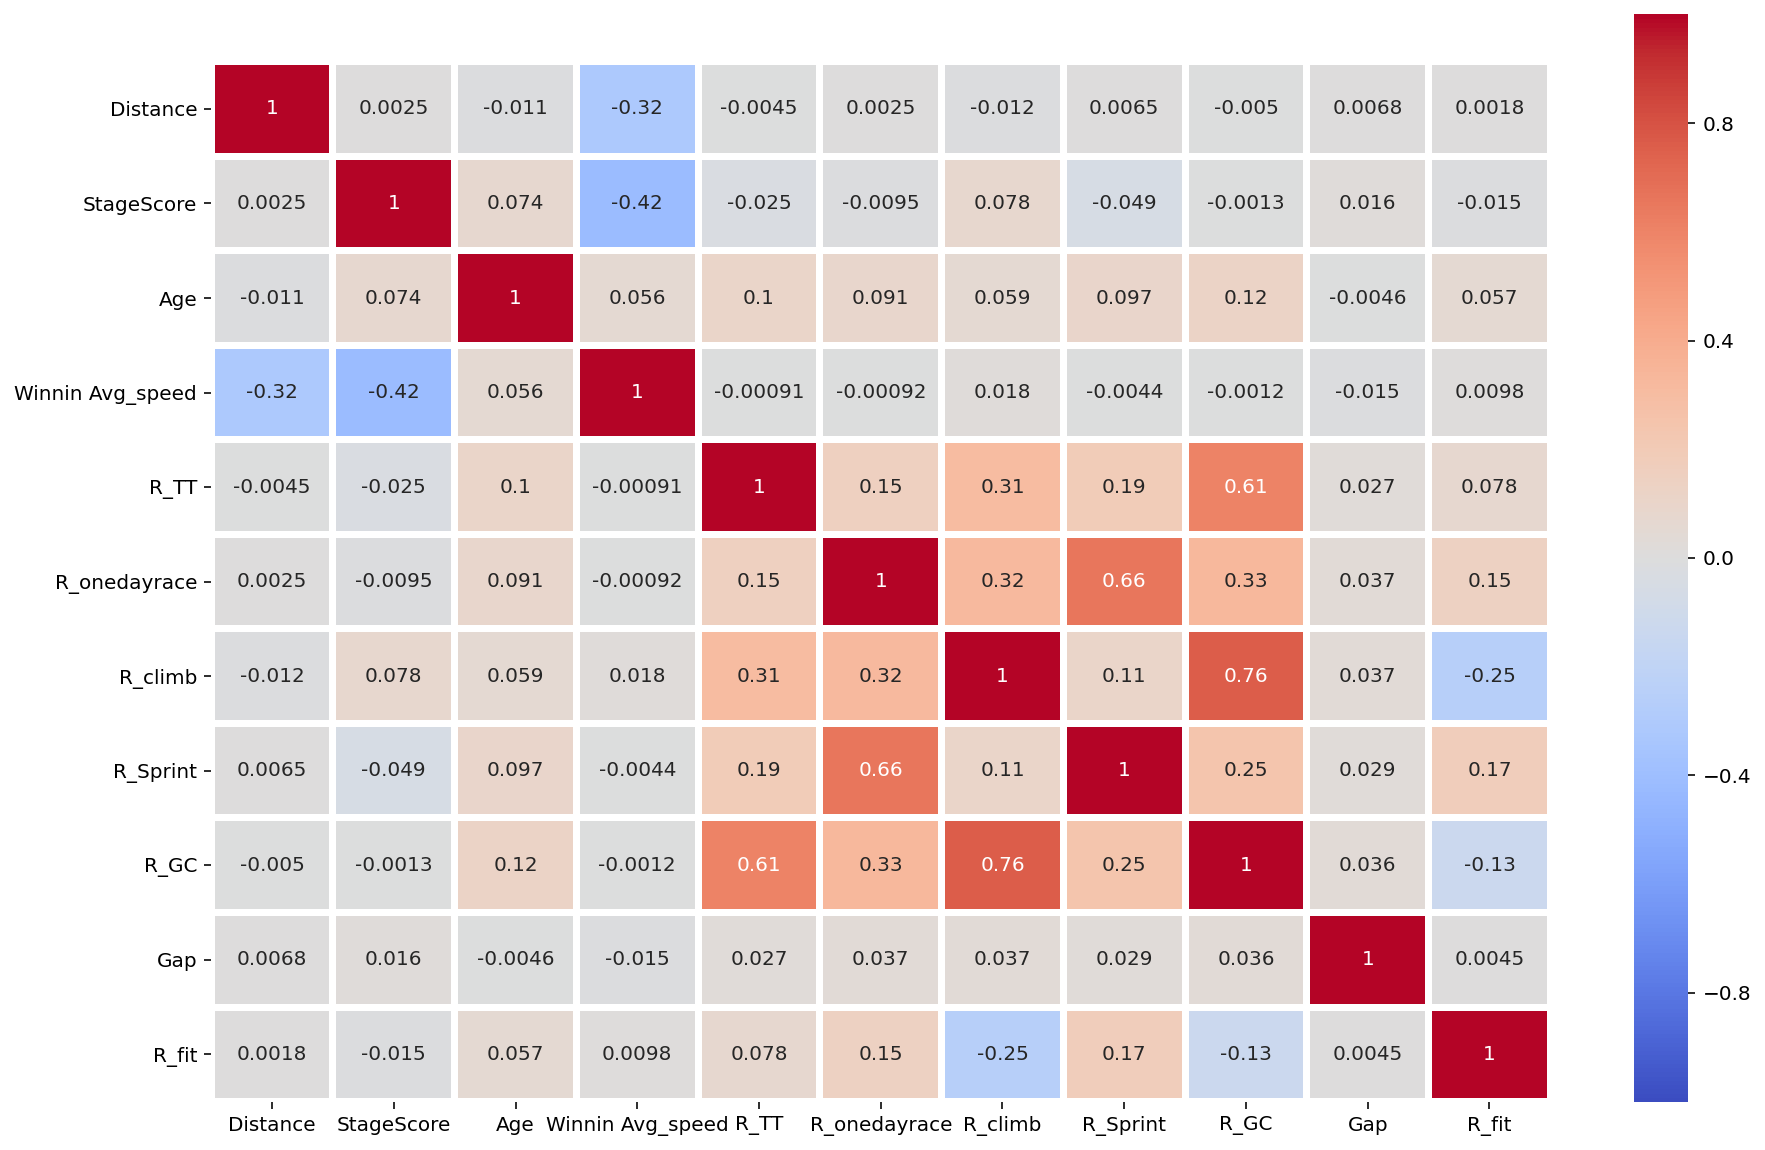

In [2399]:
plt.figure(figsize=(15,10))
sns.heatmap(featcorr,cmap='coolwarm', center=0,annot=True, linewidths=3, vmin=-1, vmax=1)
# Don't worry about this, work-around for matplotlib issue where top
plt.ylim(len(featcorr.columns),-0.5, -0.5)

plt.show()

This makes sense, we can see that the longer and harder the stage the lower the average speed is. 
How a good GC rider is also a good climber.
However I want to have good features.. and to me it seems that GC(Riders able to get over all victories) is highly correlated to other rider features, so avoid overfitting on that I'm dropping this feature.

In [2412]:
feat=feat.drop(columns=['R_GC'])

In [2413]:
featcorr=feat.corr()

In [1]:
#I'll save a copy of this so that I don't need to run everything again in the future
feat.to_csv('data/TDF_Feat.csv')


NameError: name 'feat' is not defined

In [2417]:
#First we create a matrix of zeroes that we will use like a mask to place over the upper triangle of our heatmap
mask = np.zeros_like(featcorr, dtype=np.bool)

# np.triu_indices_from returns the upper triangle, which we are setting to True
mask[np.triu_indices_from(mask)] = True

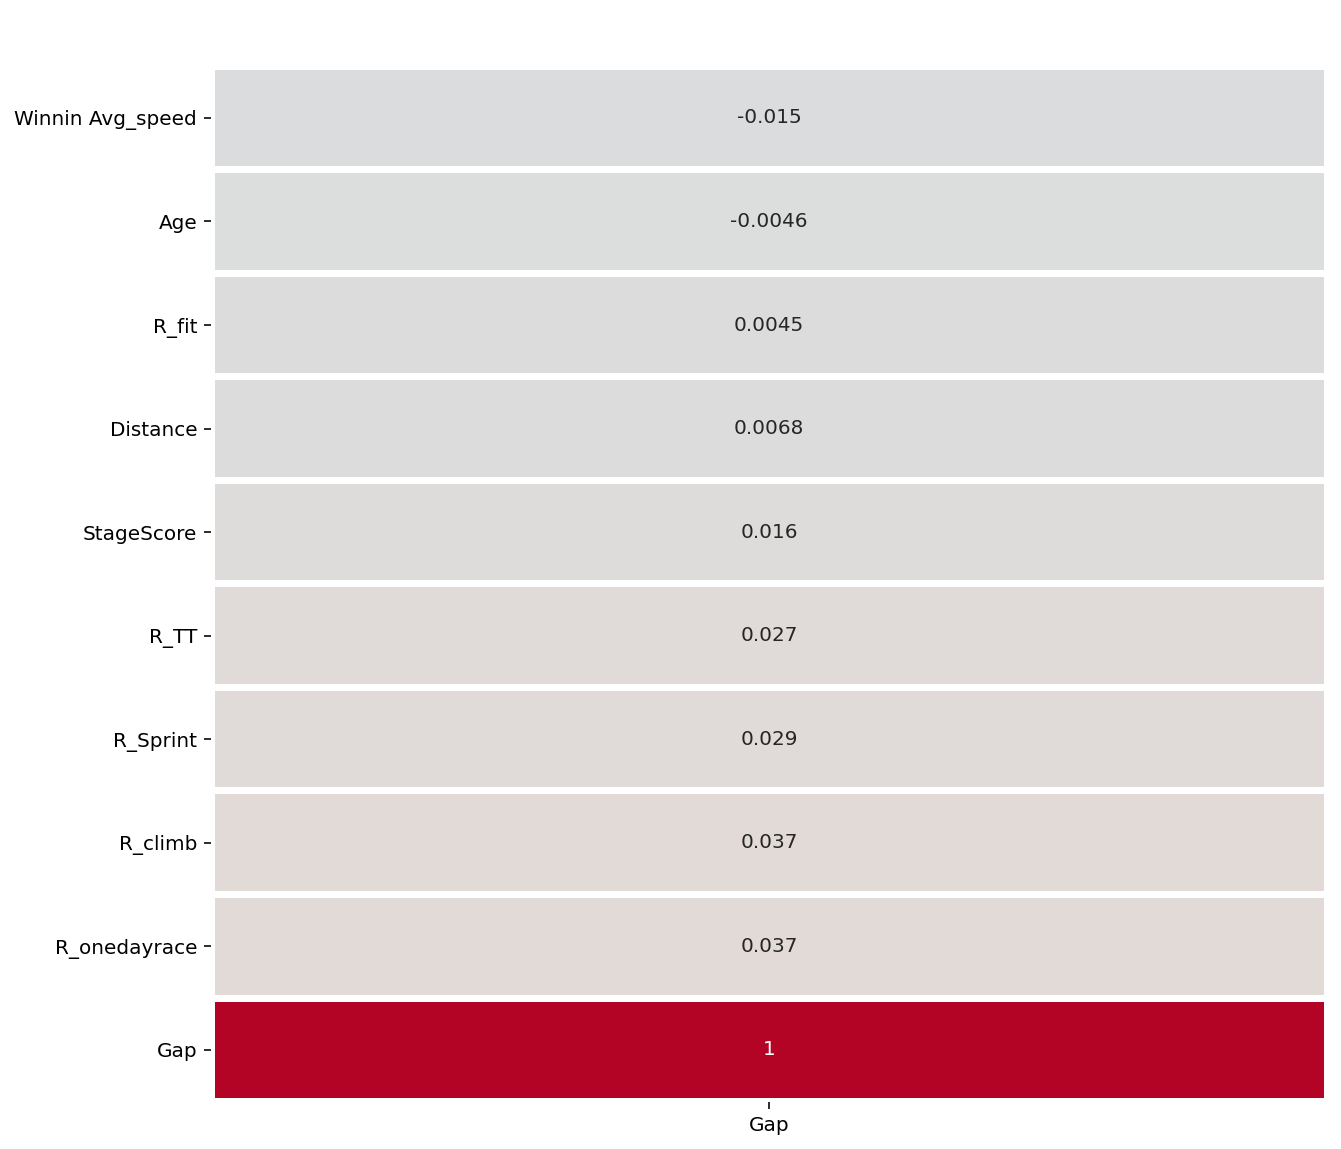

In [2418]:
plt.figure(figsize=(10,10))
sns.heatmap(featcorr[['Gap']].sort_values(by='Gap'), cbar = False ,cmap='coolwarm', center=0, annot=True, linewidths = 3)
plt.ylim(len(featcorr.columns),-0.5, -0.5)
plt.show()

#### Now it appears that the correlations are not so strong anymore. 

Time to deal with what I expected to be the worst part of this project, the imbalanced data

In [2419]:
#Let me check the distribution of outcomes
#I already know that this is very imbalanced
a=feat[feat['Gap']==1].shape
b=feat[feat['Gap']==0].shape

In [2]:
print(f'Qty of Posivite Outcome: {a[0]}')
print(f'Qty of Posivite Outcome: {b[0]}')
print(f'Balance ratio = {a[0]/b[0]}')

NameError: name 'a' is not defined

### So I now need to figure out how to deal with such imbalanced data

I first wnat to check what a Logist regression would look like

In [2428]:
feat.dtypes

Distance                      int32
StageScore                    int64
Rnk                          object
Age                           int32
Time                timedelta64[ns]
Winnin Avg_speed            float64
R_TT                          int32
R_onedayrace                  int32
R_climb                       int32
R_Sprint                      int32
Gap                           int64
R_fit                       float64
dtype: object

In [7]:
Feat

NameError: name 'Feat' is not defined

In [6]:
# Define our X and y
X = feat.drop(columns=['Gap','Rnk','Time'])
y = feat['Gap']

# adding the column of ones
X_withconstant = sm.add_constant(X)

NameError: name 'feat' is not defined

In [2433]:
from sklearn.model_selection import train_test_split
# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [2523]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# 1. Instantiate and fit model
my_logit = LogisticRegression()
my_logit.fit (X_train, y_train)

#predicttion on trainset
my_logit_pred=my_logit.predict(X_test)




# 3. Score model

print(classification_report(y_test, y_pred))
pd.DataFrame(my_logit_pred)


C:\Users\renan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62598
           1       0.00      0.00      0.00       171

    accuracy                           1.00     62769
   macro avg       0.50      0.50      0.50     62769
weighted avg       0.99      1.00      1.00     62769



C:\Users\renan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0
0      0
1      0
2      0
3      0
4      0
...   ..
62764  0
62765  0
62766  0
62767  0
62768  0

[62769 rows x 1 columns]

### With such imbalanced data I expected the score to be this high, can't really trust it. 

one way to deal with this is to get more class 1 on the trainning data set, to actually teach the model how to read the outcome 1. 
So I need to put a threshold that pulls more class 1. 


In [2528]:
# Make probabilistic predictions (scores)
y_proba = my_logit.predict_proba(X_test)[:,1]



# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.02)
y_threshold = np.where(y_proba > 0.02, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.0
Recall score: 0.0

Threshold of 0.2:
Precision score: 0.019891500904159132
Recall score: 0.06432748538011696


C:\Users\renan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


I still have a very low score here. I'm pretty sure I'll have to downsample my data

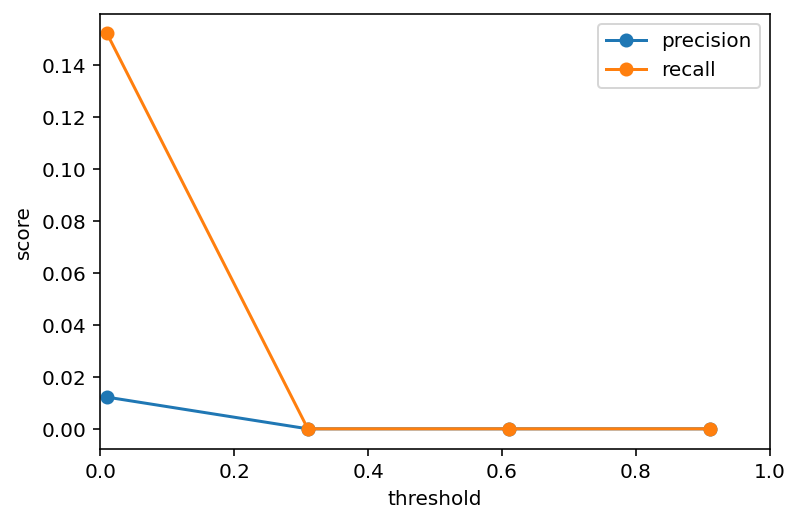

In [2529]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.01, 1, 0.3)

precisions = list()
recalls = list()

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

In [2531]:


# Regenerate scores
y_proba = my_logit.predict_proba(X_test)[:,1]

In [2532]:
#y_proba = credit_logit.predict_proba(X_test)
y_proba

array([0.00224032, 0.00482022, 0.00152447, ..., 0.00269613, 0.00060909,
       0.00077875])

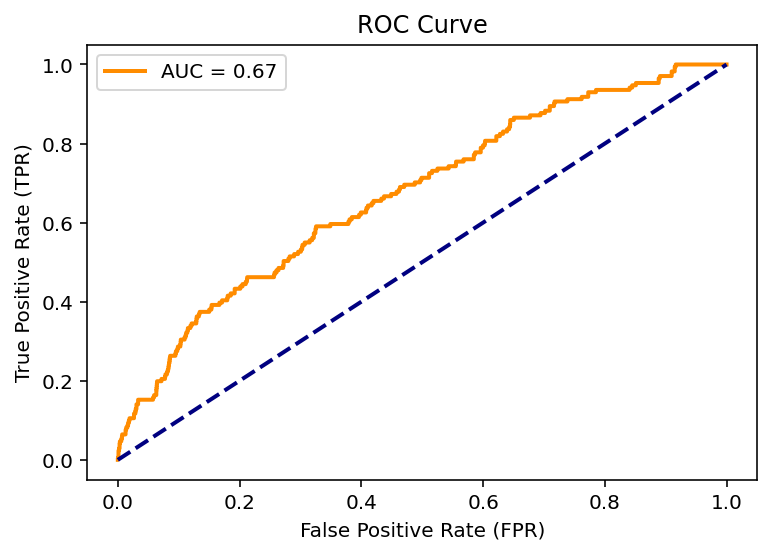

Area under curve (AUC):0.6718577784653547


NameError: name 'roc_auc_train' is not defined

In [2534]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print(f"Train AUC score: {roc_auc_train}")

### Ok, I guess I made it very clear that the data is too imbalanced to acctually get usefull information from it. 
#### So let me try a few techniques to deal with it.

#Lets take a look at the confusion matrix

Let me try another model and see how it runs

# Technique 1 - SMOTE

Smote will basically create synthetic observations of the results that are less common, in this case... winners with a gap.

It does so by identifying the  k-nearest-neighbors and randomly choosing one to create similar, but slightly different, observations.

## SMOTE shpuld always be aplyied after the train,test split. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:


sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)
print y_train.value_counts(), np.bincount(y_res)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [2430]:
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [2431]:
# Fitting the model 

# 1. Instantiate model
mylogreg_loans= sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg_loans_results = mylogreg_loans.fit()

# Look at summary
mylogreg_loans_results.summary()

Optimization terminated successfully.
         Current function value: 0.016947
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Gap   No. Observations:               209227
Model:                          Logit   Df Residuals:                   209217
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Mar 2020   Pseudo R-squ.:                 0.05931
Time:                        23:47:39   Log-Likelihood:                -3545.8
converged:                       True   LL-Null:                       -3769.4
Covariance Type:            nonrobust   LLR p-value:                 1.185e-90
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.3141      1.078     -6.785      0.000      -9.427      -5.201
Distance             0.0023      0.001      2.496      0.013       0.000       0.004
StageScore           0.0021      0.000      4.437      0.000       0.001       0.003
Age                 -0.0576      0.012     -4.870      0.000      -0.081      -0.034
Winnin Avg_speed    -0.0372      0.010     -3.753      0.000      -0.057      -0.018
R_TT                 0.0002   2.51e-05      6.664      0.000       0.000       0.000
R_onedayrace         0.0001   2.83e-05      4.778      0.000    7.96e-05       0.000
R_climb              0.0003   2.84e-05      9.265      0.000       0.000       0.000
R_Sprint             0.0001   2.65e-05      5.646      0.000    9.77e-05       0.000
R_fit                7.6443      2.540      3.009      0.003       2.665      12.623
====================================================================================
"""

### Try with Random Forests

In [2483]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2482]:
#fitting the DT
DT_model_one = tree.DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train)

#PlotBoundaries(DT_model_one, X_train, y_train) 

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train)}")

The classification accuracy is: 0.999009955072444


In [2485]:

my_random_forest = RandomForestClassifier(n_estimators=10)
my_random_forest.fit(X_train, y_train)
my_random_forest.score(X_train,y_train)

0.9988324297750891

### Seems that I have enough data to model with. Please check file "Moideling" for that part.